In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

##### Import train & test data as provided for EDA

In [2]:
data_train = pd.read_csv('./data/train.csv')
#data_test = pd.read_csv('./data/test.csv')

In [3]:
data_train.head()  #training set 

WELLNUM       DEPTH     DTC     DTS      BS    CALI     DEN    DENC  \
0        0  335.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1        0  335.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2        0  336.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3        0  336.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4        0  337.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

       GR     NEU     PEF    RDEP    RMED     ROP    PHIF      SW     VSH  
0  5.3274 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
1  5.8235 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
2  6.5228 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
3  7.2285 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
4  9.5020 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0

In [4]:
#Provided test data not to be used until the final model is generated

*PHIF, SW and VSH will be predicted for the test data (data_test) using a model trained with the "train" data*

*Missing values in logs are represented as -9999. This would be replaced by non-numerical NaN for some exploratory data analysis. Since it is the largest negative value, it will mask the actual minimum values making it difficult to explore if there are unrealistic negative values in the dataset*

In [5]:
def replace_9999 (df):
    '''function to replace -9999.0 with NaN'''
    data = df.replace(-9999.0, np.nan)
    return data

In [6]:
train_data = replace_9999 (data_train)   #replace -9999 with NaN
train_data.head()

WELLNUM       DEPTH  DTC  DTS  BS  CALI  DEN  DENC      GR  NEU  PEF  RDEP  \
0        0  335.160105  NaN  NaN NaN   NaN  NaN   NaN  5.3274  NaN  NaN   NaN   
1        0  335.660105  NaN  NaN NaN   NaN  NaN   NaN  5.8235  NaN  NaN   NaN   
2        0  336.160105  NaN  NaN NaN   NaN  NaN   NaN  6.5228  NaN  NaN   NaN   
3        0  336.660105  NaN  NaN NaN   NaN  NaN   NaN  7.2285  NaN  NaN   NaN   
4        0  337.160105  NaN  NaN NaN   NaN  NaN   NaN  9.5020  NaN  NaN   NaN   

   RMED  ROP  PHIF  SW  VSH  
0   NaN  NaN   NaN NaN  NaN  
1   NaN  NaN   NaN NaN  NaN  
2   NaN  NaN   NaN NaN  NaN  
3   NaN  NaN   NaN NaN  NaN  
4   NaN  NaN   NaN NaN  NaN

In [7]:
train_data.describe().T  #get basic statistics of data

count         mean          std         min          25%  \
WELLNUM  318967.0     4.081012     2.462805    0.000000     2.000000   
DEPTH    318967.0  6998.179996  3797.936862  335.160105  3757.874000   
DTC       69894.0    77.155278    15.387921    1.025100    66.363775   
DTS       43848.0   140.490795    36.085217   74.822400   119.019775   
BS       287913.0    16.856695     7.071820    8.500000     8.500000   
CALI      96157.0     8.697590     0.384869    6.000000     8.578100   
DEN       95620.0     2.452806     0.156333    1.626600     2.311100   
DENC      89116.0     0.050244     0.020949   -0.982700     0.043900   
GR       315848.0    55.288621    38.602323    0.148800    24.329750   
NEU       95439.0     0.173838     0.095899   -0.003400     0.106300   
PEF       88536.0     5.757870     2.533365   -0.023200     4.891800   
RDEP     288519.0     5.140624   168.911711    0.065000     0.743400   
RMED     288753.0   158.102867  3082.521918    0.064900     0.769700   
ROP      286588.0    28.550509    18.161868    0.000000    19.451200   
PHIF      47314.0     0.137371     0.085265    0.000000     0.060000   
SW        47314.0     0.701001     0.350021    0.013000     0.336000   
VSH       45100.0     0.307895     0.254315   -0.248000     0.118375   

                 50%           75%           max  
WELLNUM     4.000000      6.000000      8.000000  
DEPTH    6905.184000  10052.490000  15651.580000  
DTC        72.396000     85.584000    181.813900  
DTS       130.534100    144.340900    388.839700  
BS         17.500000     26.000000     36.000000  
CALI        8.625000      8.687500     20.330400  
DEN         2.506800      2.576100      3.089600  
DENC        0.053100      0.060600      0.334158  
GR         55.983000     79.240600   1124.440000  
NEU         0.156900      0.218700      1.463474  
PEF         6.143150      7.737325     13.840700  
RDEP        1.208590      2.183900  80266.800000  
RMED        1.255200      2.348500  97543.400000  
ROP        25.916100     32.220200    208.633000  
PHIF        0.133000      0.216000      0.403294  
SW          0.933496      1.000000      1.000000  
VSH         0.246509      0.390100      3.654300

*negative values can be found in DENC, NEU, PEF, VSH. This values would have been masked with -9999 if not replaced with NaN. while Negative value in VSH (Volume of shale log) & DENC (probably corrected density log) are not expected, it could be possible to have negative values in PEF (photoelectric log) and NEU (neutron log) logs. Check the quantity of the negative value in the data to access the impact it could cause*

In [8]:
train_data.lt(0).sum() # get the number of negative values in each column

WELLNUM       0
DEPTH         0
DTC           0
DTS           0
BS            0
CALI          0
DEN           0
DENC       1891
GR            0
NEU          11
PEF           9
RDEP          0
RMED          0
ROP           0
PHIF          0
SW            0
VSH          46
dtype: int64

*we shall create a box plot to see if it could detect some of these negatives as outliers*

#### Univariate analysis with boxplot for visual identification of potential outliers 

In [9]:
def boxplots(df):
    
    fig = plt.figure(figsize=[15,10], dpi=200)
    fig.subplots_adjust(hspace=1, wspace=0.25)
    sns.set_style("darkgrid")

    columns = ['DENC','NEU','PEF','VSH','DEN','SW','PHIF','DTC','DTS','BS','CALI','GR','RDEP','RMED','ROP','DEPTH']
    j = 1
    for i in columns:
        ax = fig.add_subplot(4,4,j)
        sns.boxplot(df[i], ax=ax, color = 'm')
        j = j+1
        if j>len(columns):
            break
    plt.show()

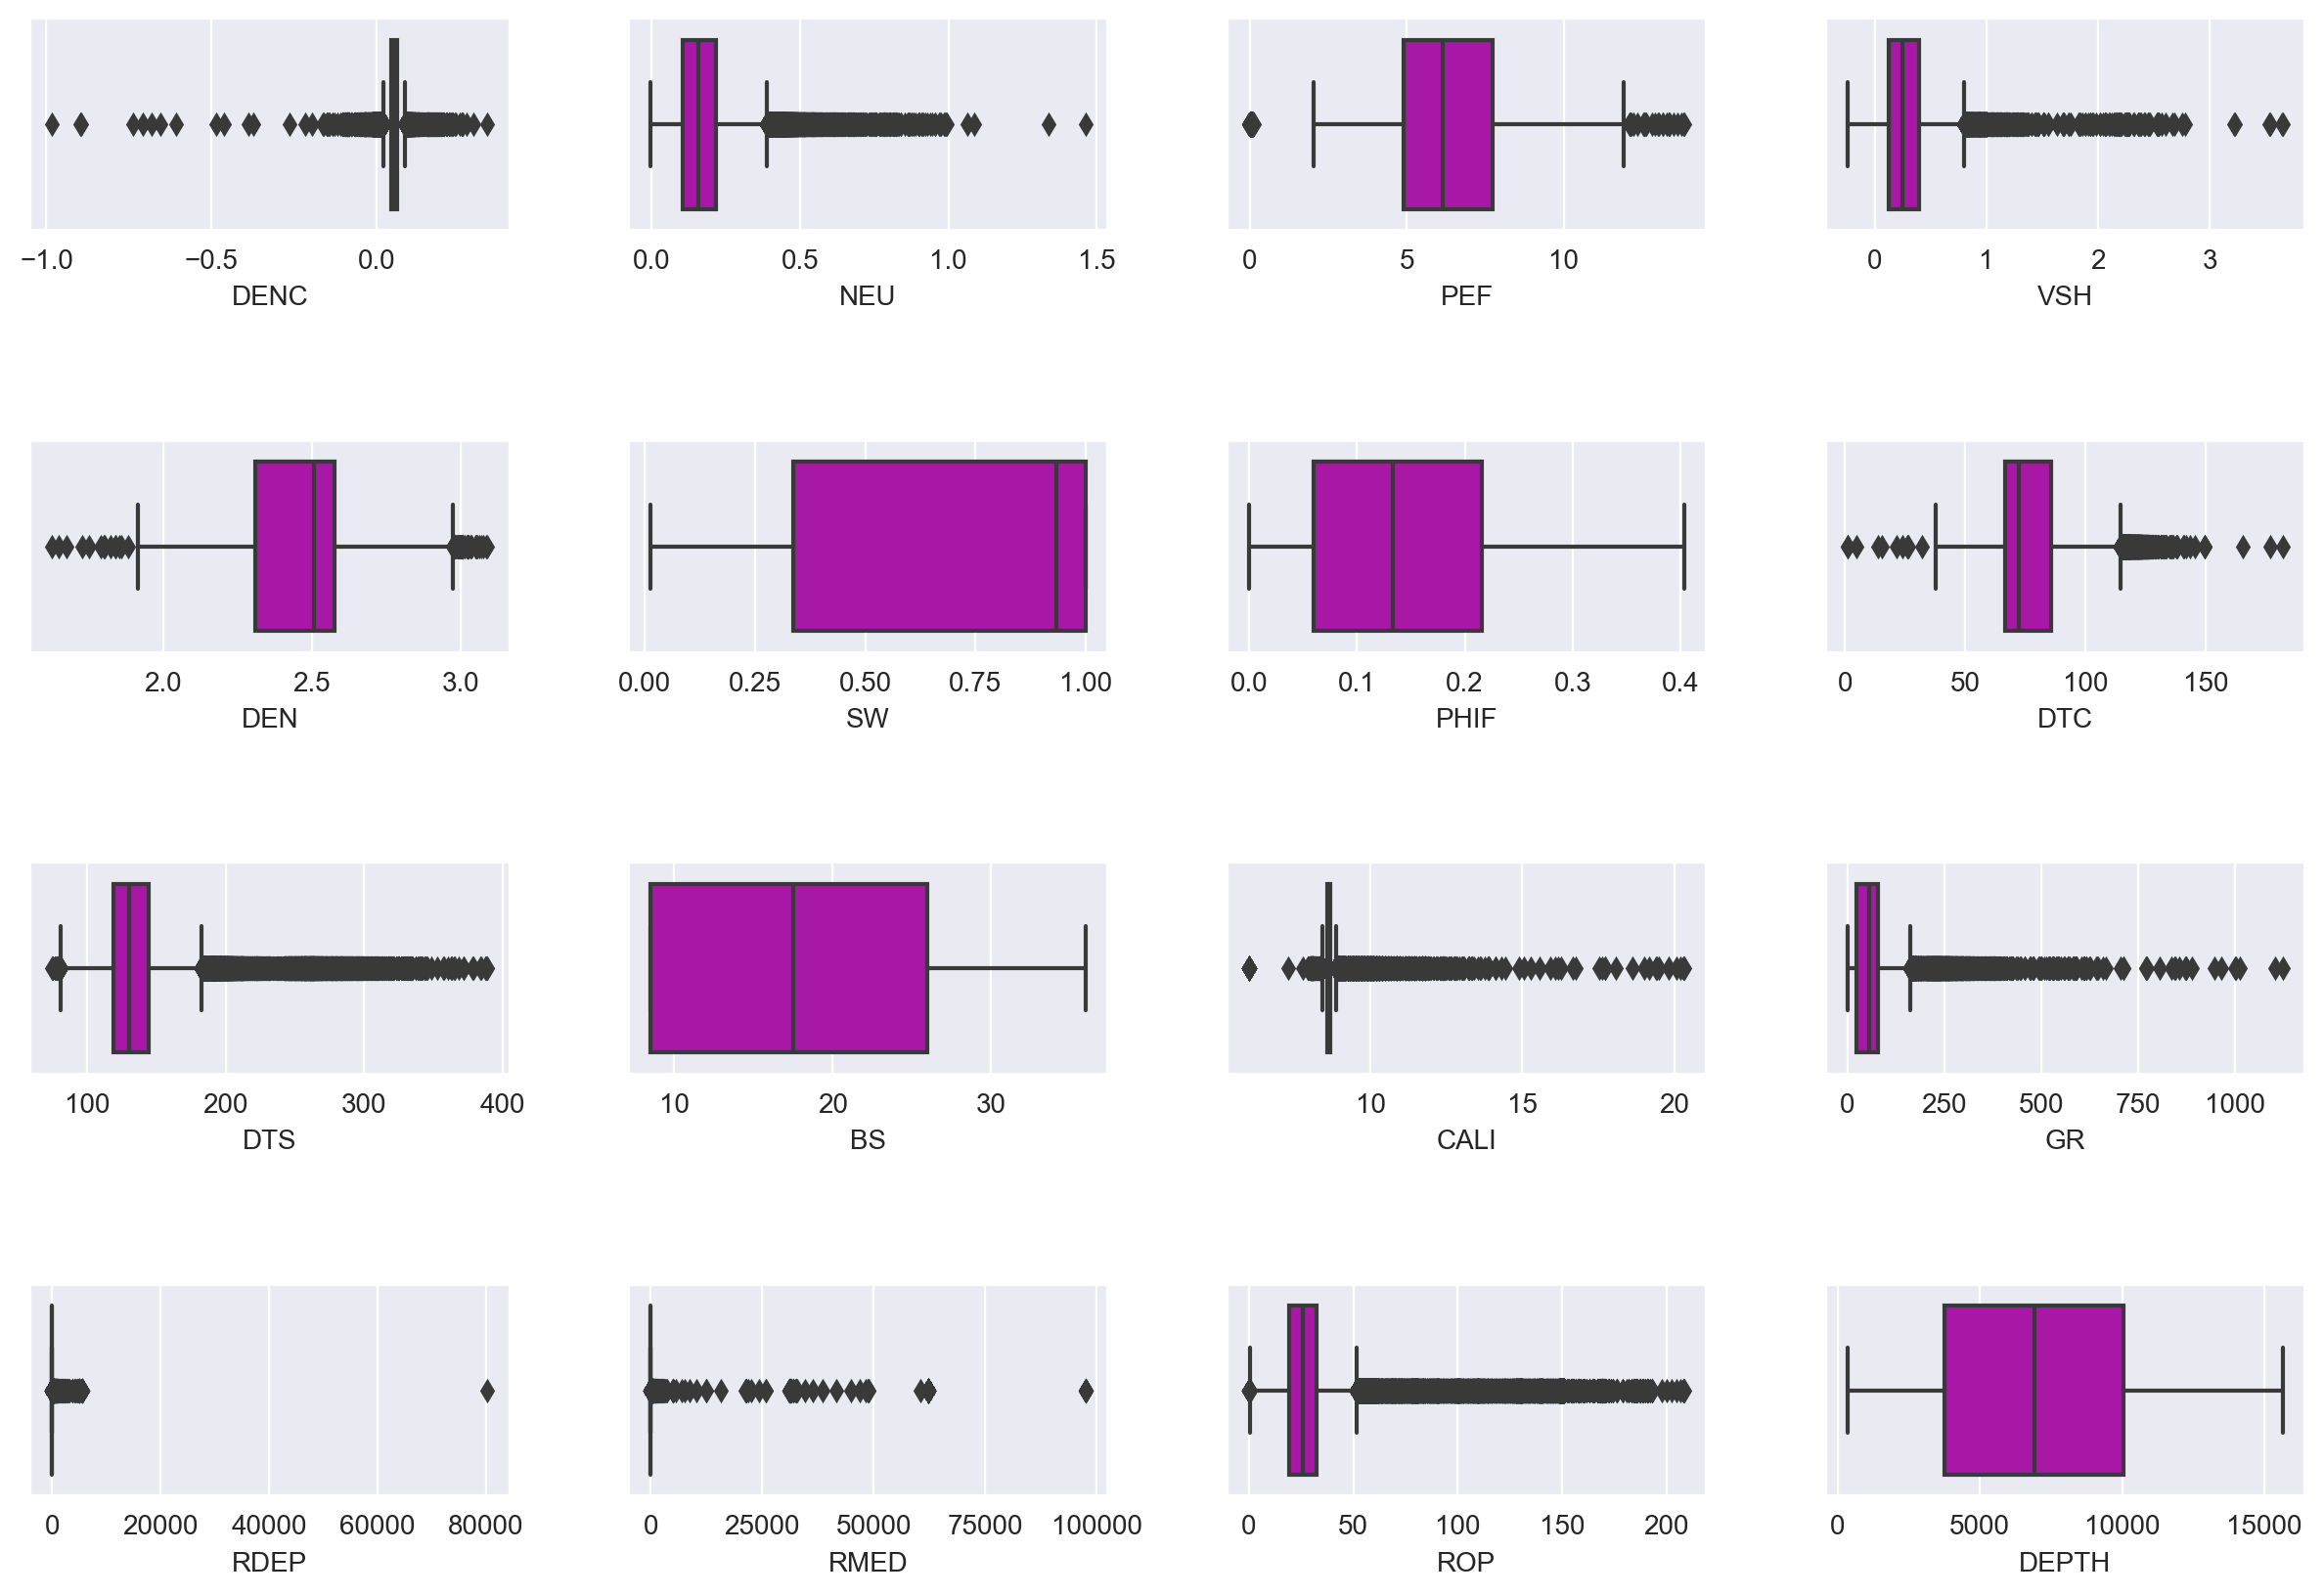

In [10]:
boxplots(train_data)

*We could see significant outliers in the plots, proper treatment of outlier entails determine what the possible ranges of the logs are based on domain knowledge. However, the approach that would be used first is to implement general outlier treatment using boxplot, i.e, determining the outliers above some quartile limits which will be shown in the outlier treatment section* 
1. **We would leverage the use of Tree based algorithms, which are robust to outliers, and data normaliation approach to ensure we retain as much as possible the data point**
2. **We shall replace the negative values in Density and Vsh logs with NaN and also ensure logs that suppose to be positive remains positive or filled with NaN**

In [11]:
# def fill_unreal_values(df,col=['SW','PHIF','VSH','DENC']):
    
#     '''Fill unrealistic negative logs with NaN
#     col = List of column names that would be filled
#     '''
#     for i in col:
#         df[df[i] < 0] = np.nan
#     return df

In [12]:
# train_data = fill_unreal_values(train_data)
# train_data.describe().T

*Now the negative values in VSH and DENC logs have been replaced with NaN*

**Check the percentage of missing data in each well and each curves for the given well to enable a good choice of well to include or not to include in the training set**

In [13]:
def missing_check(df):
    total_count = df.isnull().groupby(df['WELLNUM']).count() # total number of rows per well
    total_sum = df.isnull().groupby(df['WELLNUM']).sum() # sum of missing data per well
    percent = (total_sum / total_count)*100   # percentage of values that are null
    return percent # return the dataframe

In [14]:
percent_null = missing_check(train_data)
percent_null

WELLNUM  DEPTH         DTC         DTS          BS       CALI  \
WELLNUM                                                                  
0            0.0    0.0   76.450225  100.000000  100.000000  76.450225   
1            0.0    0.0   71.412357  100.000000    0.785775  70.501441   
2            0.0    0.0   70.651831   70.677640    0.788621  69.481804   
3            0.0    0.0   86.959714   88.339298    0.825915  89.232510   
4            0.0    0.0  100.000000  100.000000    0.672295  73.759975   
5            0.0    0.0   67.935177   69.019279    0.150880  67.359598   
6            0.0    0.0  100.000000  100.000000    0.119894  66.115883   
7            0.0    0.0   55.542868   57.239757    0.118759  55.058695   
8            0.0    0.0   66.657921  100.000000    0.271109  66.233766   

               DEN        DENC        GR        NEU         PEF       RDEP  \
WELLNUM                                                                      
0        76.191436  100.000000  5.501781  76.151106  100.000000  58.919809   
1        70.760455   70.481069  0.547132  70.841943   70.760455   1.882949   
2        69.739898   69.464598  0.562072  69.817327   69.739898   1.866881   
3        89.471108   89.211098  0.578141  89.556759   89.471108   2.370683   
4        74.006312   73.765107  0.338713  74.073029   74.006312   2.152883   
5        67.516066   67.340039  0.550433  67.594300   67.516066   1.737916   
6        66.227057   66.126782  0.438157  66.283734   66.227057   2.195143   
7        55.188873   55.044992  0.495592  55.250537   55.188873   1.420545   
8        66.657921   66.496130  0.708383  66.671039   66.657921  33.906161   

              RMED         ROP       PHIF         SW        VSH  
WELLNUM                                                          
0        58.919809  100.000000  76.860254  76.860254  93.681522  
1         1.882949    0.884724  91.641687  91.641687  89.715084  
2         1.866881    1.106937  93.458748  93.458748  90.920822  
3         2.370683    0.929920  93.560919  93.560919  92.251690  
4         2.093865    0.751841  78.389059  78.389059  77.729594  
5         1.737916    1.226600  95.716681  95.716681  95.068455  
6         1.735188    1.002747  69.627676  69.627676  69.313773  
7         1.420545    0.998036  95.393505  95.393505  95.057781  
8        33.906161    0.008745  68.227732  68.227732  68.070314

In [15]:
#Remove Well number and depth from column list since they don't have null values. Well number will be the index column 
col1= ['DTC','DTS','BS','CALI','DEN','DENC','GR','NEU','PEF','RDEP','RMED','ROP','PHIF','SW','VSH']

In [16]:
def plot_missing_data_percentage(df):
    fig = plt.figure(figsize=[15,15], dpi=200)
    fig.subplots_adjust(hspace=0.5, wspace=0.25)
    j = 1
    for i in col1:
        
        ax = fig.add_subplot(5,3,j)
        sns.barplot(x=df.index, y=i, ax=ax, data=df)
        plt.title('% of missing data in curve '+str(i)+' for each well',fontsize=10)
        plt.ylim(0, 100)
        j = j+1
        if j>len(col1):
            break
    plt.show()


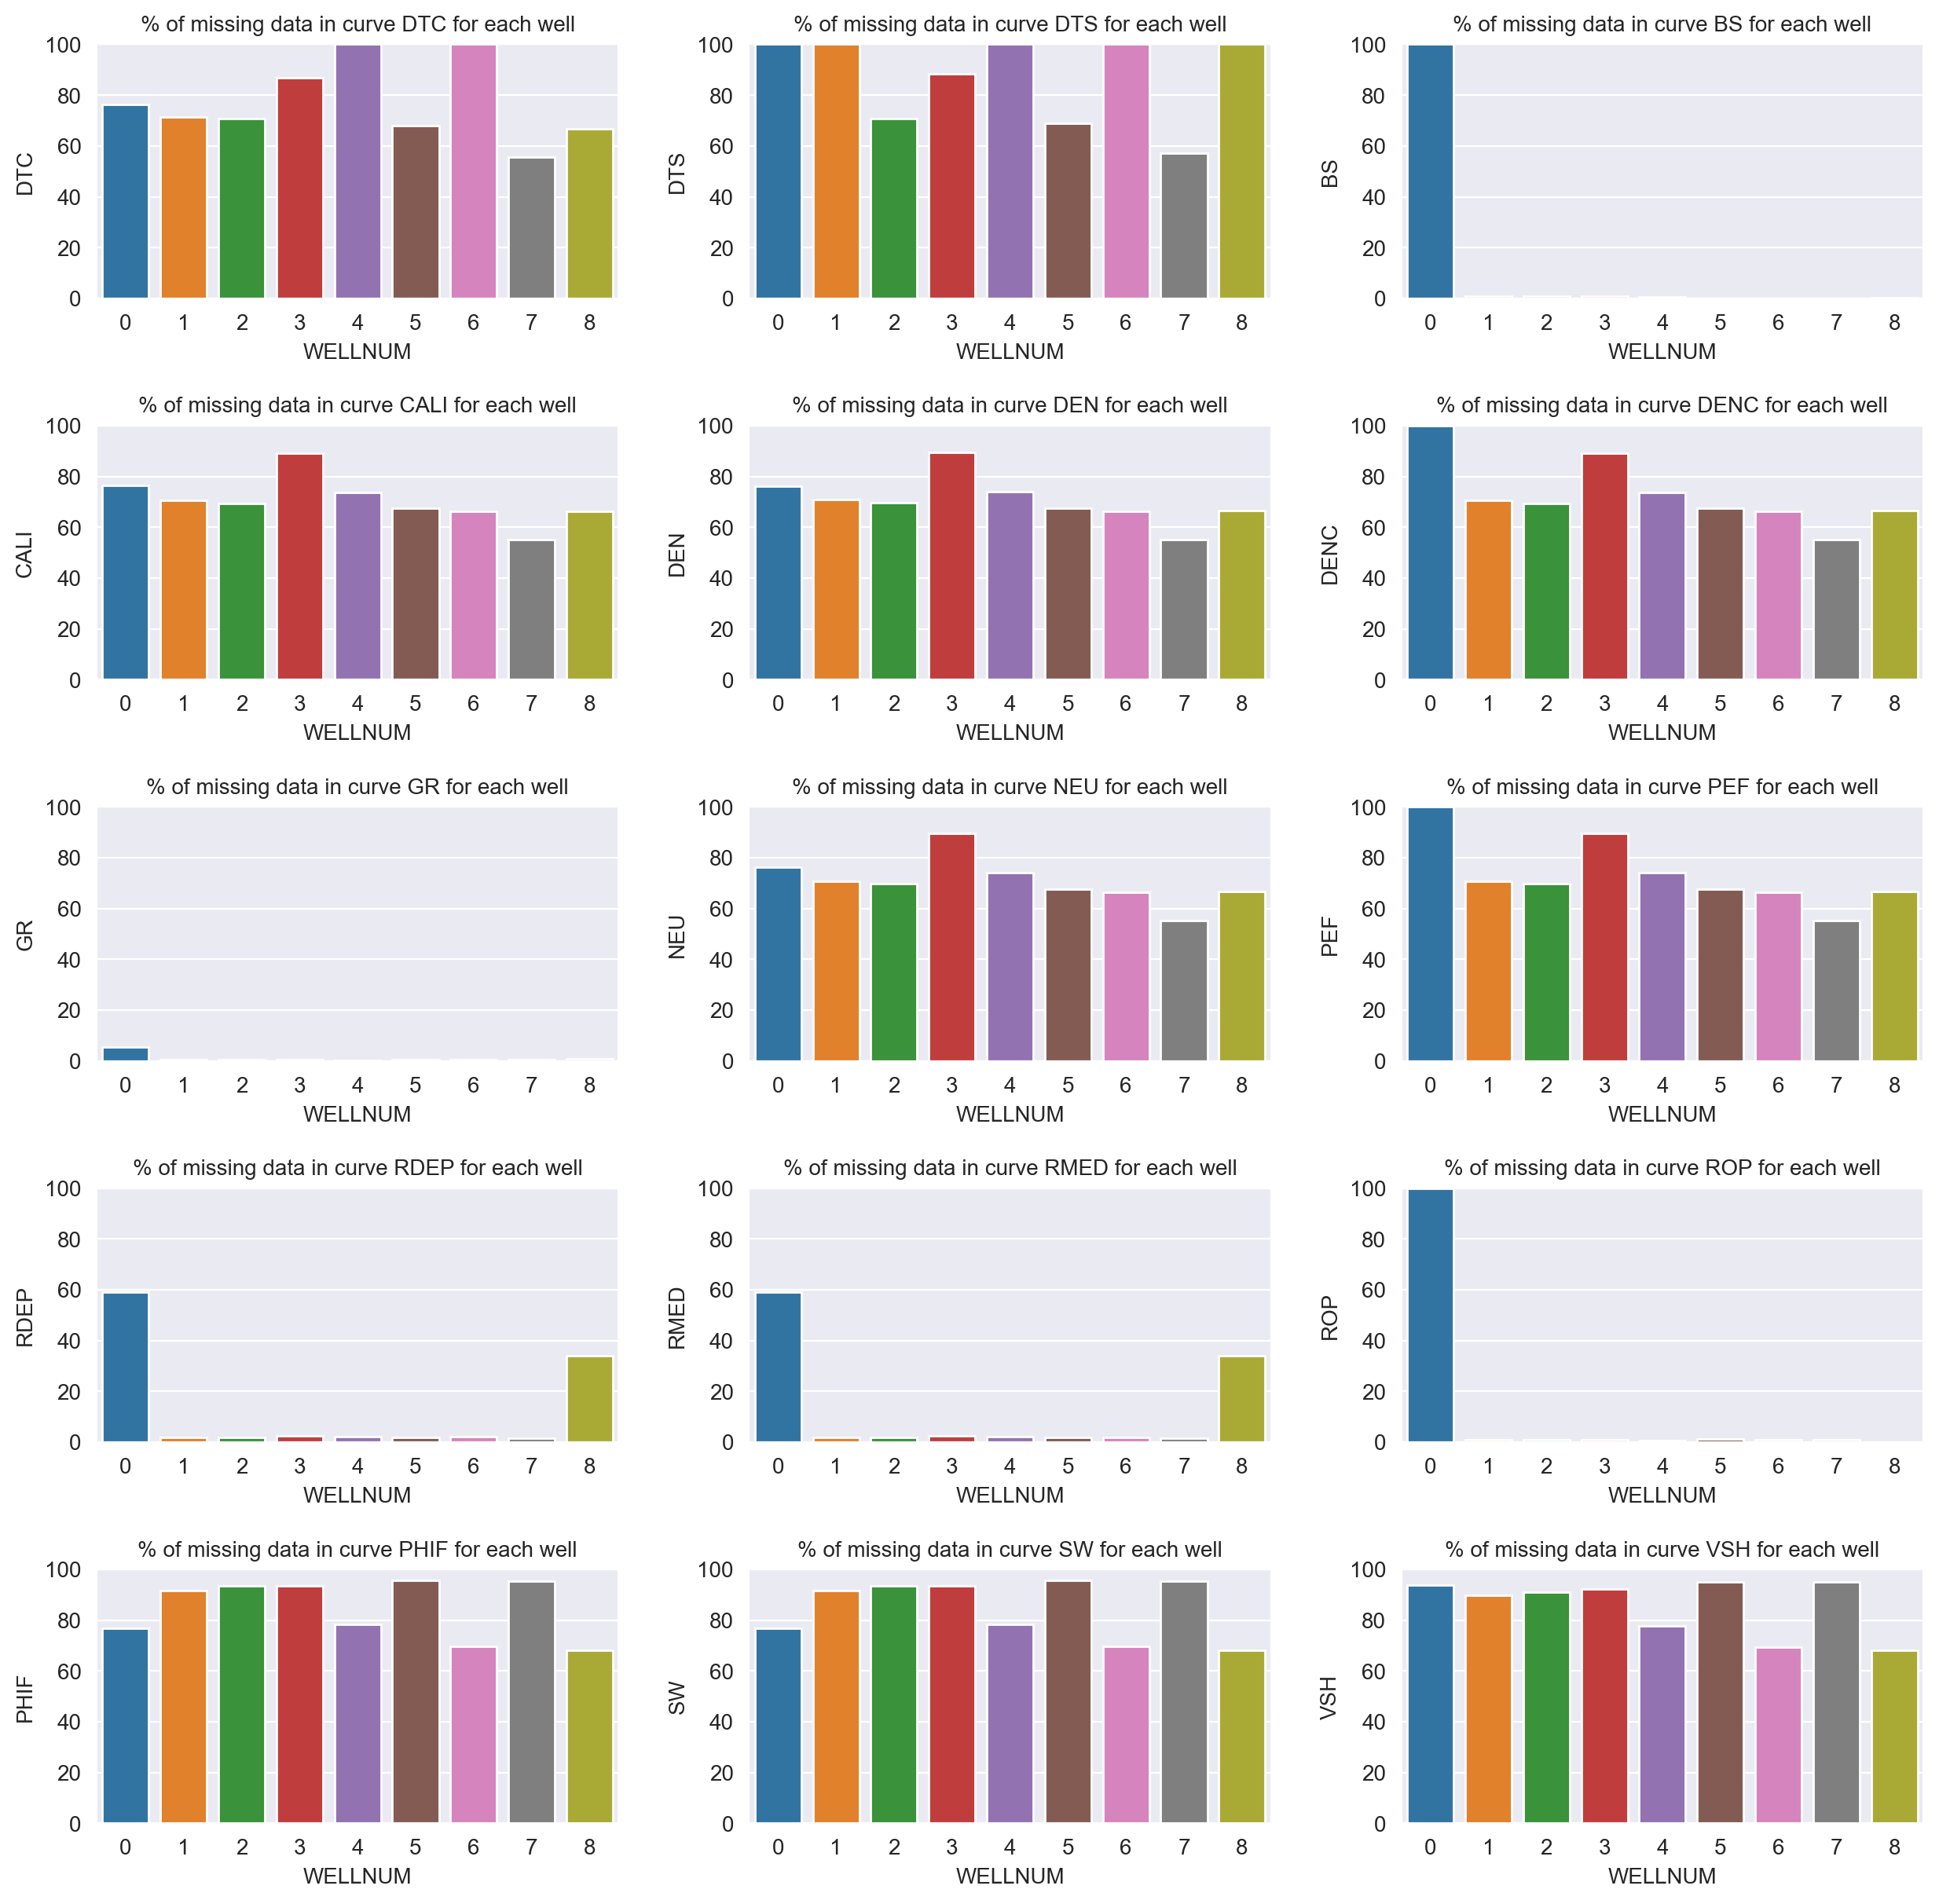

In [17]:
plot_missing_data_percentage(percent_null)

**The plots above shows huge amount of missing data that can force any model to be biased towards the missing data and predict -9999 for regions it shouldn't. We shall consider dropping this missing values. Making estimates for the missing value would also not be a good idea at this stage as it could alter the entire data structure. From the plot we can derive the following points**
1. **Well 0 has no log reading for logs: DTS, BS, DENC, PEF, and ROP**
2. **Well 1 has no log reading for logs: DTS**
3. **Well 4 has no log reading for logs: DTC and DTS**
4. **Well 6 has no log reading for logs: DTC and DTS**
5. **Well 8 has no log reading for log: DTS**

*The relevance of this logs and their impact on the target variables VSH, PHIF and SW would be assessed*

#### Plot showing logs with least amounts of wells. A flow-up plot for the above figures 

In [18]:
def wells_and_logs(df):
    fig = plt.figure(figsize=(50,50), dpi=100)
    fig.subplots_adjust(hspace=1, wspace=0.5)
    j = 1
    for i in col1:
        ax = fig.add_subplot(3,5,j)
        df.groupby(by=['WELLNUM'])[i].count().reset_index().sort_values([i],ascending=True).plot(x='WELLNUM',
                                                                            y=i,kind='bar', figsize=(15,5), ax=ax)
        plt.title('Wells with '+str(i)+ ' log',fontsize=10)
        ax.legend().set_visible(False)
        j = j+1
        if j>len(col1):
            break
    plt.show()

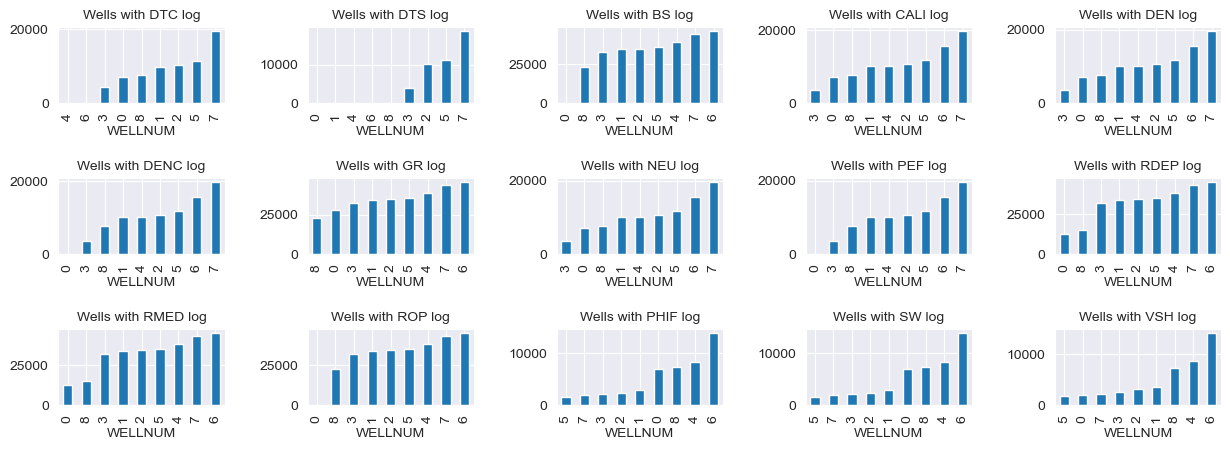

In [19]:
wells_and_logs(train_data)

*most wells dont have DTS logs.*
*Logs DTC, DTS, BS, DENC, PEF and ROP have missing values on some of the wells while others have informations*

## Outlier treatment

In [20]:
Q1 = train_data.quantile(0.25)  #first quartile
Q3 = train_data.quantile(0.73)  # third quartile 
IQR = Q3-Q1  # inter quartile

# outliers are considered to lie above Q3+1.5IQR and Q1-1.5IQR
cleared_outlier_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

cleared_outlier_data

WELLNUM         DEPTH       DTC  DTS   BS      CALI       DEN  \
0             0    335.160105       NaN  NaN  NaN       NaN       NaN   
1             0    335.660105       NaN  NaN  NaN       NaN       NaN   
2             0    336.160105       NaN  NaN  NaN       NaN       NaN   
3             0    336.660105       NaN  NaN  NaN       NaN       NaN   
4             0    337.160105       NaN  NaN  NaN       NaN       NaN   
...         ...           ...       ...  ...  ...       ...       ...   
318957        8  12140.000000  73.73626  NaN  8.5  8.592159  2.597695   
318958        8  12140.500000  71.02998  NaN  8.5  8.573069  2.601858   
318959        8  12141.000000  67.65567  NaN  8.5  8.573334  2.615034   
318960        8  12141.500000  66.45422  NaN  8.5  8.584791  2.622012   
318961        8  12142.000000  65.08916  NaN  8.5  8.552884  2.613461   

            DENC        GR       NEU      PEF      RDEP      RMED      ROP  \
0            NaN   5.32740       NaN      NaN       NaN       NaN      NaN   
1            NaN   5.82350       NaN      NaN       NaN       NaN      NaN   
2            NaN   6.52280       NaN      NaN       NaN       NaN      NaN   
3            NaN   7.22850       NaN      NaN       NaN       NaN      NaN   
4            NaN   9.50200       NaN      NaN       NaN       NaN      NaN   
...          ...       ...       ...      ...       ...       ...      ...   
318957  0.063748  41.88051  0.143191  5.71457  2.623128  2.484139  10.5413   
318958  0.062708  40.49112  0.147167  5.71569  2.496509  2.616563  10.7161   
318959  0.060642  38.55591  0.135412  5.63844  2.979286  2.699449  10.8214   
318960  0.046040  37.46786  0.121563  5.40088  2.975024  2.987023  10.8428   
318961  0.033266  35.59890  0.122382  5.22691  3.576087  3.440489  10.6952   

            PHIF   SW     VSH  
0            NaN  NaN     NaN  
1            NaN  NaN     NaN  
2            NaN  NaN     NaN  
3            NaN  NaN     NaN  
4            NaN  NaN     NaN  
...          ...  ...     ...  
318957  0.037530  1.0  0.3584  
318958  0.035000  1.0  0.3453  
318959  0.027108  1.0  0.3270  
318960  0.022892  1.0  0.3167  
318961  0.028012  1.0  0.2990  

[228618 rows x 17 columns]

## Box plot after outlier treatment

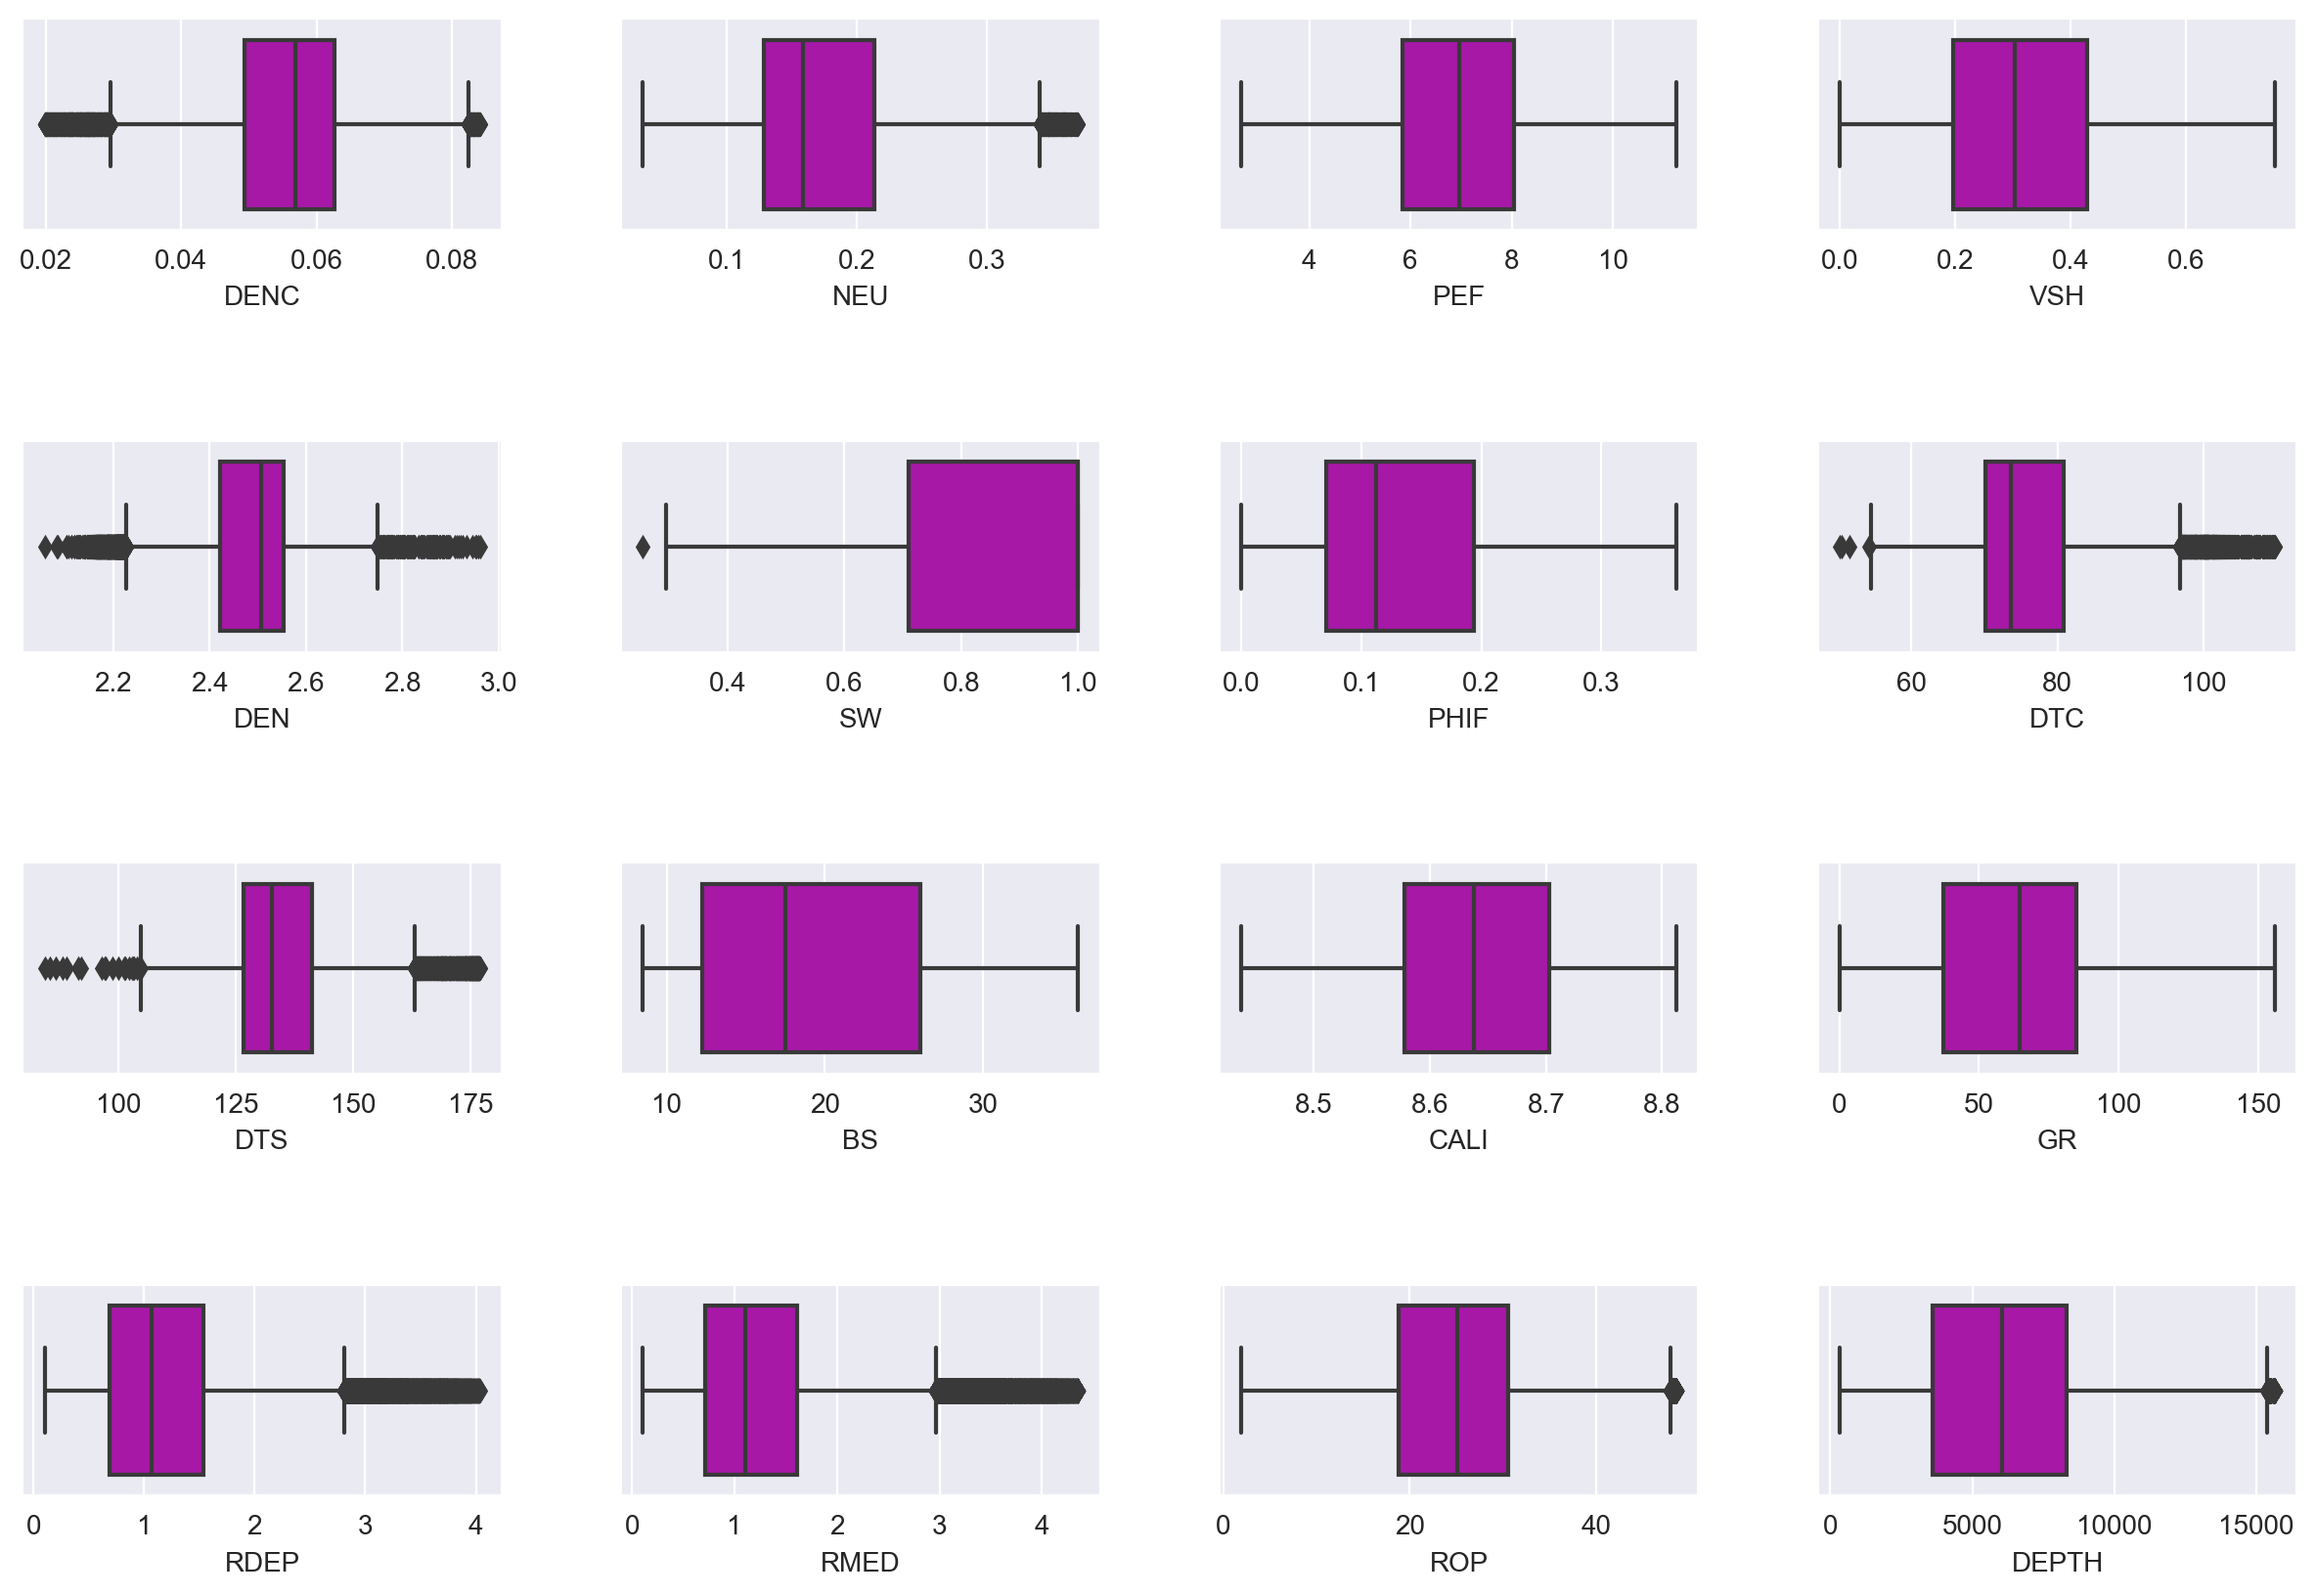

In [21]:
boxplots(cleared_outlier_data)

### Percentage of missing data after outlier treatement 

In [22]:
percent_null_2 =missing_check(cleared_outlier_data)

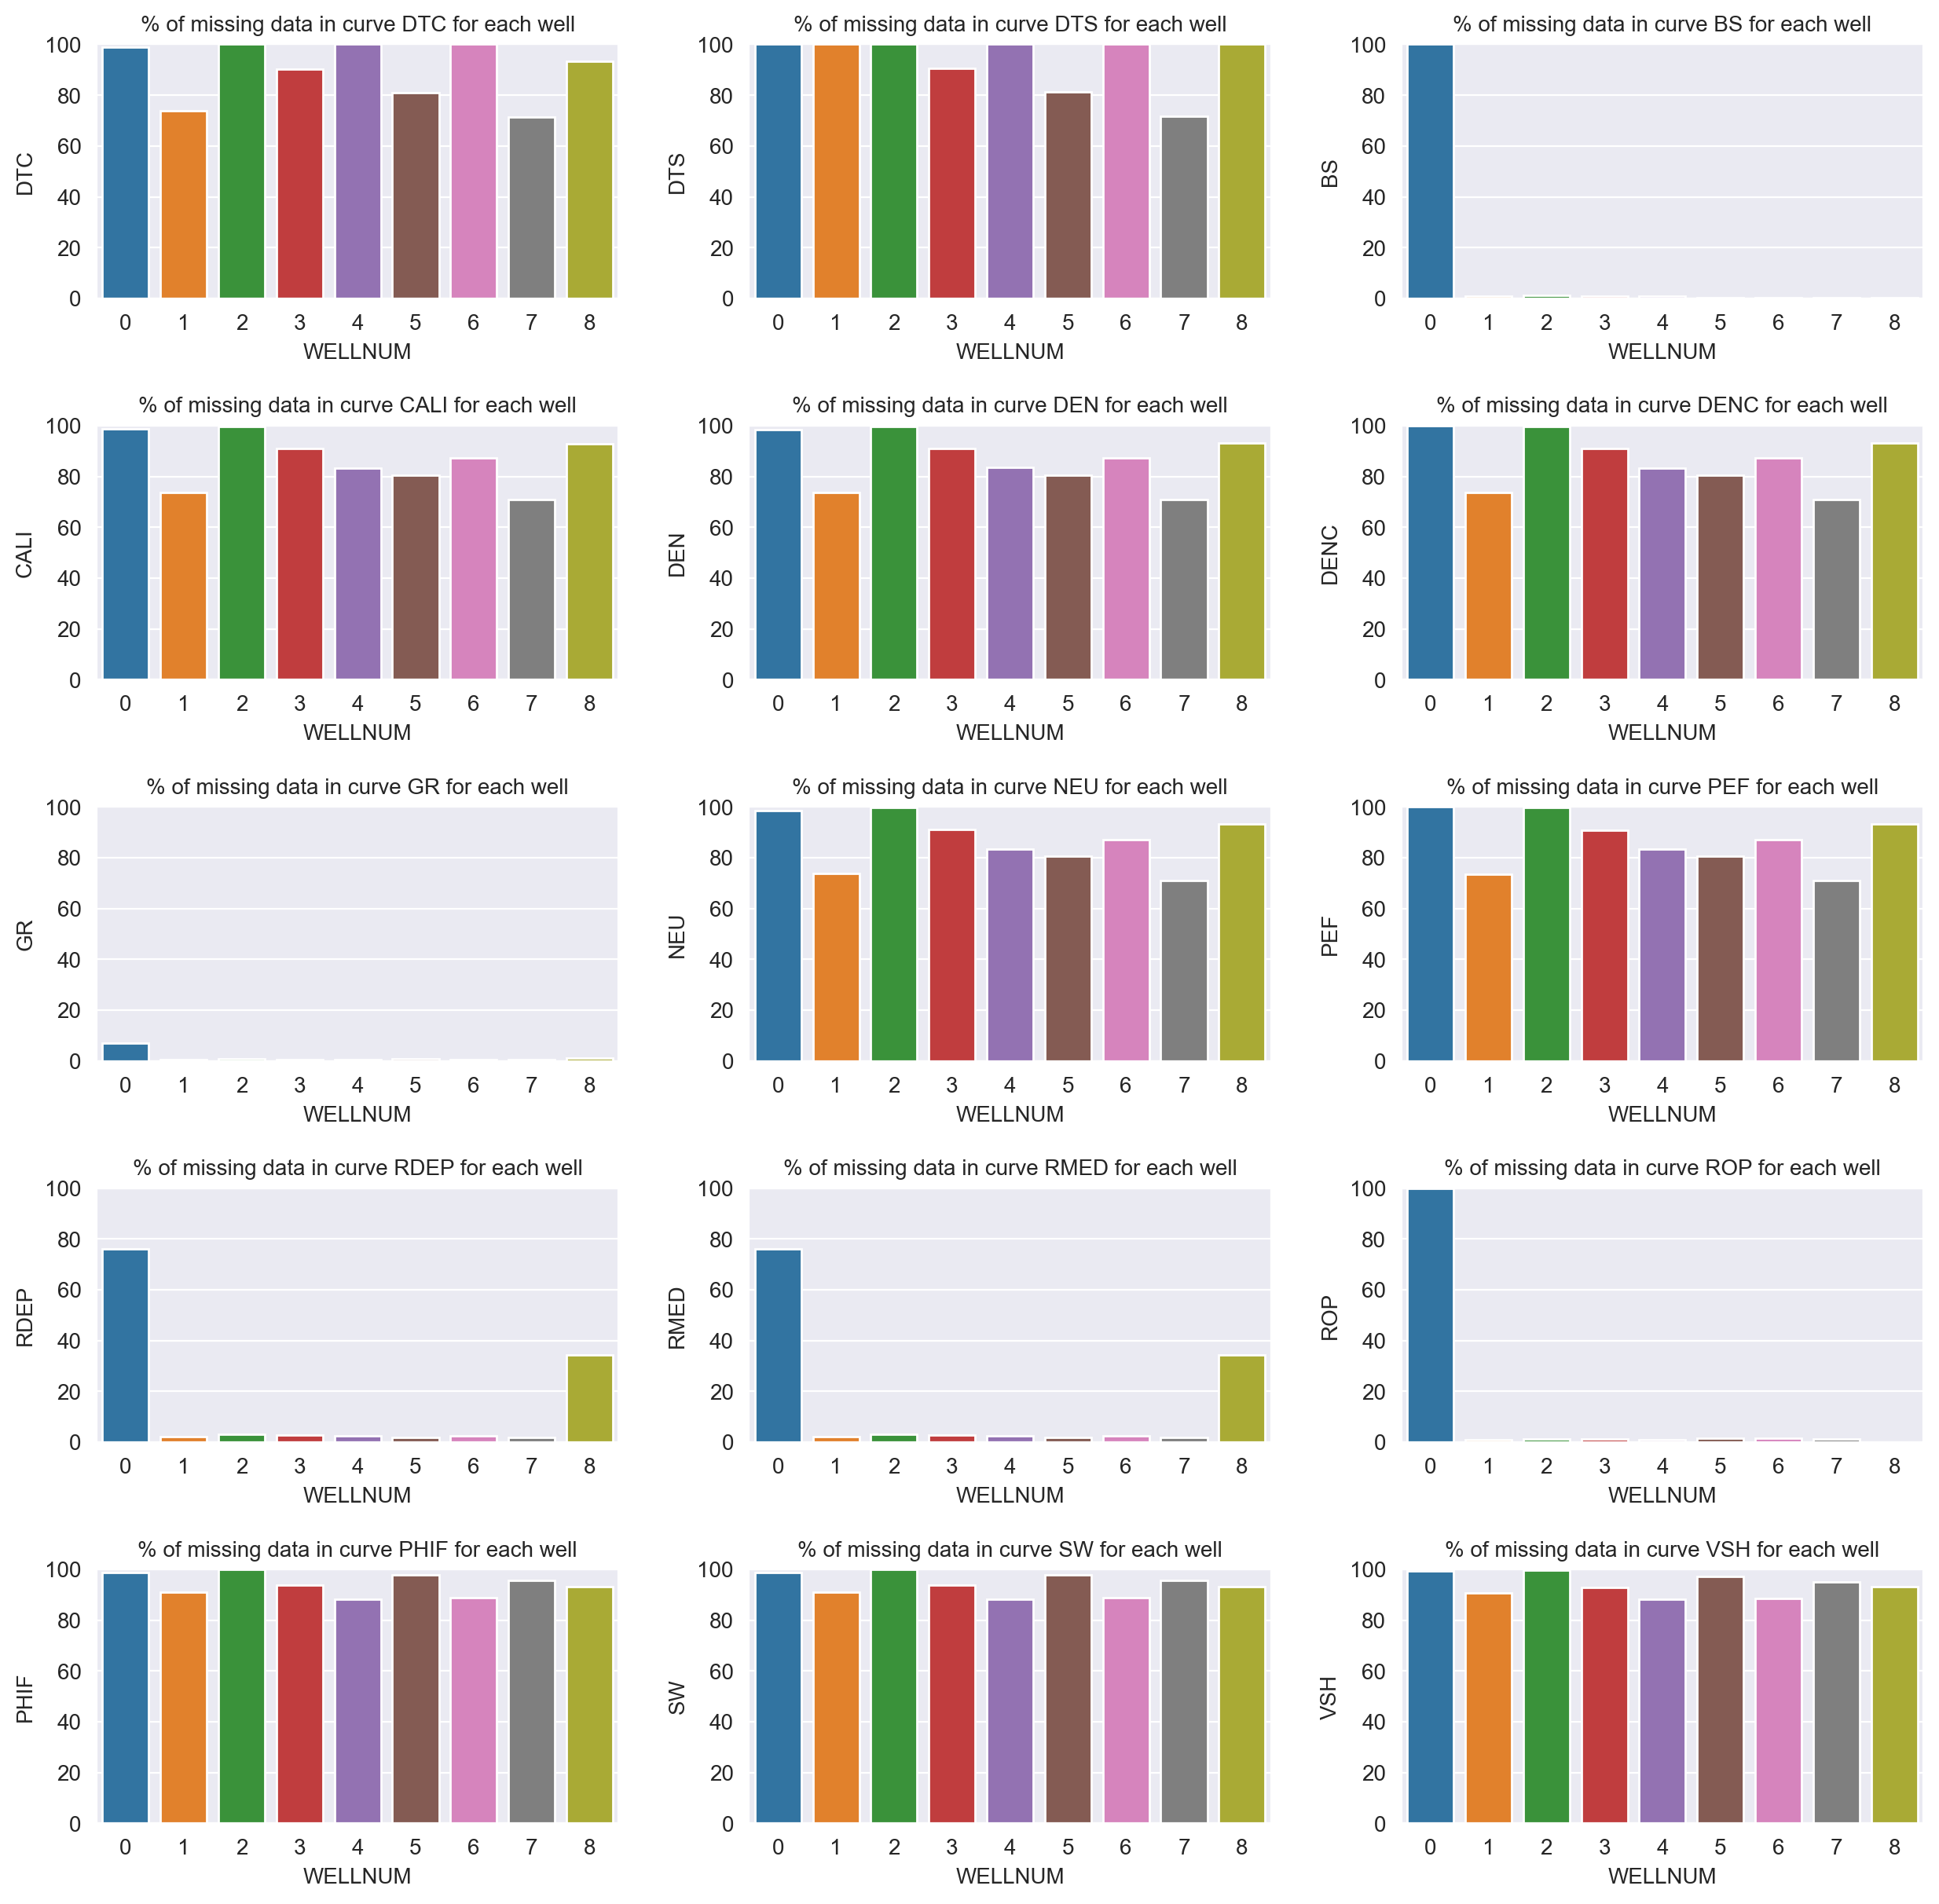

In [23]:
plot_missing_data_percentage(percent_null_2)

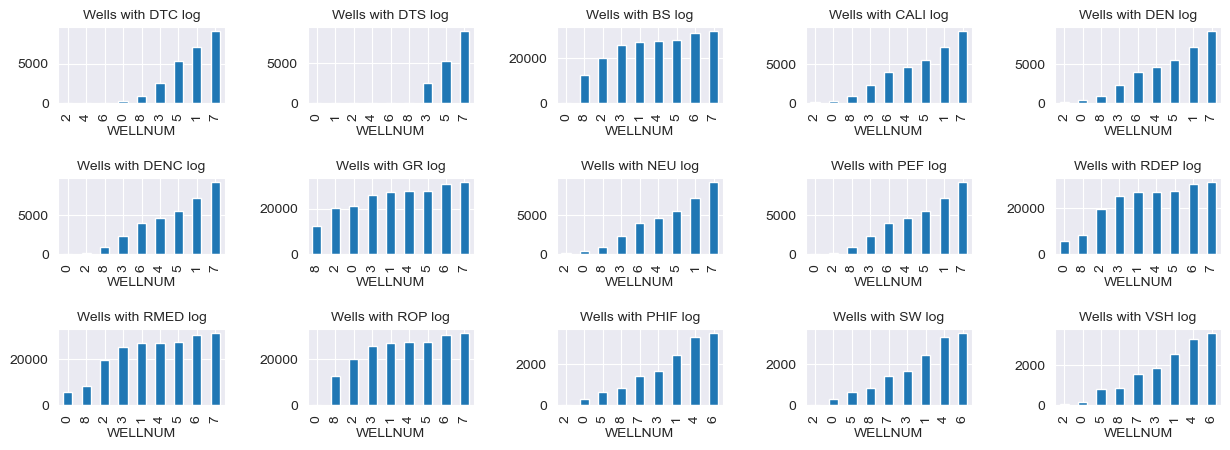

In [24]:
wells_and_logs(cleared_outlier_data)

Some wells carrying the outliers disappeared from the logs. These wells don't have quality data

In [25]:
cleared_outlier_data.describe().T ## checking the statistics of the cleaned data

count         mean          std         min          25%  \
WELLNUM  228618.0     3.979687     2.442544    0.000000     2.000000   
DEPTH    228618.0  6164.262876  3344.269636  335.160105  3597.441000   
DTC       25326.0    76.501019     8.940163   50.177900    70.191675   
DTS       16790.0   135.799076    13.901371   84.231600   126.638600   
BS       204335.0    18.172879     6.313491    8.500000    12.250000   
CALI      34328.0     8.638234     0.077494    8.437500     8.578100   
DEN       34313.0     2.470458     0.119946    2.058001     2.422400   
DENC      34007.0     0.055669     0.010788    0.019780     0.049400   
GR       225542.0    61.628619    31.134973    0.148800    37.119300   
NEU       34213.0     0.172635     0.058130    0.035600     0.128300   
PEF       33960.0     6.873818     1.296838    2.663090     5.838925   
RDEP     202171.0     1.232789     0.727285    0.100000     0.691200   
RMED     202171.0     1.301490     0.809622    0.105424     0.713000   
ROP      203206.0    24.999254     9.214663    1.934800    18.848900   
PHIF      14096.0     0.128613     0.071047    0.000000     0.071018   
SW        14096.0     0.850080     0.216100    0.255400     0.709975   
VSH       14717.0     0.326829     0.183741    0.000000     0.197143   

                50%          75%           max  
WELLNUM     4.00000     6.000000      8.000000  
DEPTH    6047.90000  8307.743000  15651.580000  
DTC        73.64920    80.813575    109.814000  
DTS       132.76410   141.261875    177.021500  
BS         17.50000    26.000000     36.000000  
CALI        8.63830     8.703100      8.812500  
DEN         2.50770     2.552900      2.960500  
DENC        0.05690     0.062600      0.084100  
GR         64.54255    84.738800    155.938000  
NEU         0.15850     0.213200      0.369759  
PEF         6.95300     8.046100     11.249700  
RDEP        1.06410     1.537700      4.035400  
RMED        1.10020     1.612500      4.352900  
ROP        25.08010    30.524975     48.650000  
PHIF        0.11230     0.193800      0.362650  
SW          1.00000     1.000000      1.000000  
VSH         0.30300     0.429200      0.754900

### Bivariate analysis and  general EDA

<AxesSubplot:>

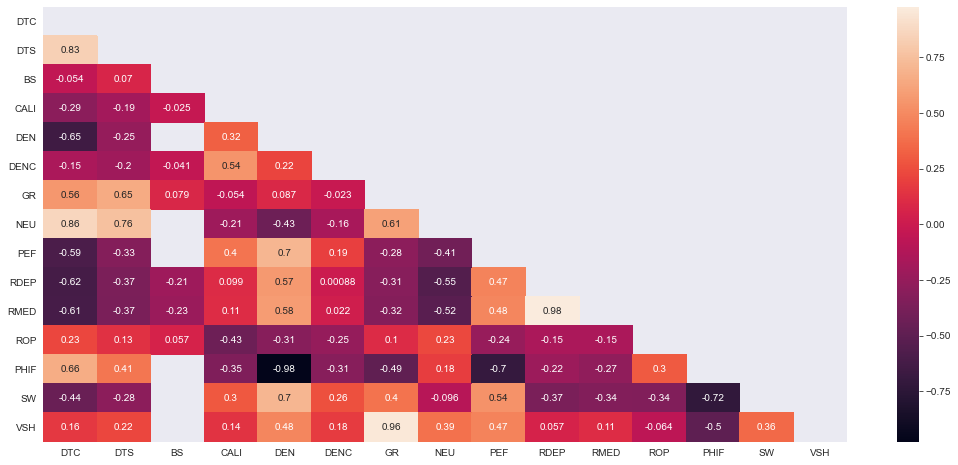

In [26]:

plt.figure(figsize =(18,8));
info = cleared_outlier_data[col1]
mask = np.triu(np.ones_like(info.corr(), dtype=bool))
sns.heatmap((info).corr(), annot=True, mask = mask) 

*most features are highly correlatable which might impact the performance of the model, it will be necessary to access the features that are more impactful in this case*

**Strategy in filling missing values**

1. **VSH can be predicted with GR (0.96)**
2. **NEU can be predicted with GR (0.61)**
3. **DTC can be predicted with NEU (0.86)**
4. **DTS can be predicted with DTC (0.83)**
5. **DEN can be predicted with DTC (0.65)**
6. **PHIF can be predicted with DEN (-0.98)**
7. **RDEP can be predicted with DTC (-0.62)**
8. **RMED can be predicted with RDEP (0.98)**
9. **Other logs can be predicted with the combination of these logs**

**This is very important in filling the missing values**

***At this point, we shall proceed with analysis that will involve the use of data with equal dimensions (no missing point). We will therefore fill the missing value again with -9999.0***

In [27]:
# def fill_with_9999(df):
#     ''' Replace NaN with -9999.0
#     df = DataFrame table
#     '''
#     data = df.replace(np.nan,-9999.0)
#     return data

In [28]:
# train_set = fill_with_9999(cleared_outlier_data)
# train_set.info()  ## shows non-null data and can be analysed. 

In [29]:
# train_set.head(3)

### Feature importance assessment using CART (classification and regression trees) algorithm 

*To check for most influential features, it will be okay to drop all NaN values and ensure we are dealing with the actual cleaned data*

In [30]:
feature_importance_set = cleared_outlier_data.dropna(axis=0)
feature_importance_set.shape

(3234, 17)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
def important_feature_check(df):
    scaler = MinMaxScaler()
    
    Xtrain = scaler.fit_transform(df.iloc[:,1:14])
    Y1 = df.iloc[:,14:15] # PHIF
    Y2 = df.iloc[:,15:16] # SW
    Y3 = df.iloc[:,16:17] # VSH
    
    model1 = DecisionTreeRegressor()
    model2 = DecisionTreeRegressor()
    model3 = DecisionTreeRegressor()
    # fit the model with data
    model1.fit(Xtrain, Y1)
    model2.fit(Xtrain, Y2)
    model3.fit(Xtrain, Y3)
    # get importance features
    importance1 = model1.feature_importances_
    importance2 = model2.feature_importances_
    importance3 = model3.feature_importances_
    
    collection=[importance1,importance2,importance3]
    
    n= {'Feature_importance_for_PHIF':list(importance1),
            'Feature_importance_for_SW':list(importance2),
            'Feature_importance_for_VSH':list(importance3),
            'Features':['DEPTH','DTC','DTS','BS','CALI','DEN','DENC','GR','NEU',
                                              'PEF','RDEP','RMED','ROP']
           }
    table = pd.DataFrame(n)
    table_sorted= table.sort_values(['Feature_importance_for_PHIF',
                                     'Feature_importance_for_SW',
                                     'Feature_importance_for_VSH'])
    
    fig, ax = plt.subplots(2, 2, sharey=False, figsize=(15, 7), dpi=100)
    fig.subplots_adjust(hspace=0.5, wspace=0.25)
    
    ax[0,0].barh('Features','Feature_importance_for_PHIF',data= table_sorted)
    ax[0,0].set_title('Features impacting PHIF')
    
    ax[0,1].barh('Features','Feature_importance_for_SW',data= table_sorted)
    ax[0,1].set_title('Features impacting SW')
    
    ax[1,0].barh('Features','Feature_importance_for_VSH',data= table_sorted)
    ax[1,0].set_title('Features impacting VSH')
    
    plt.show

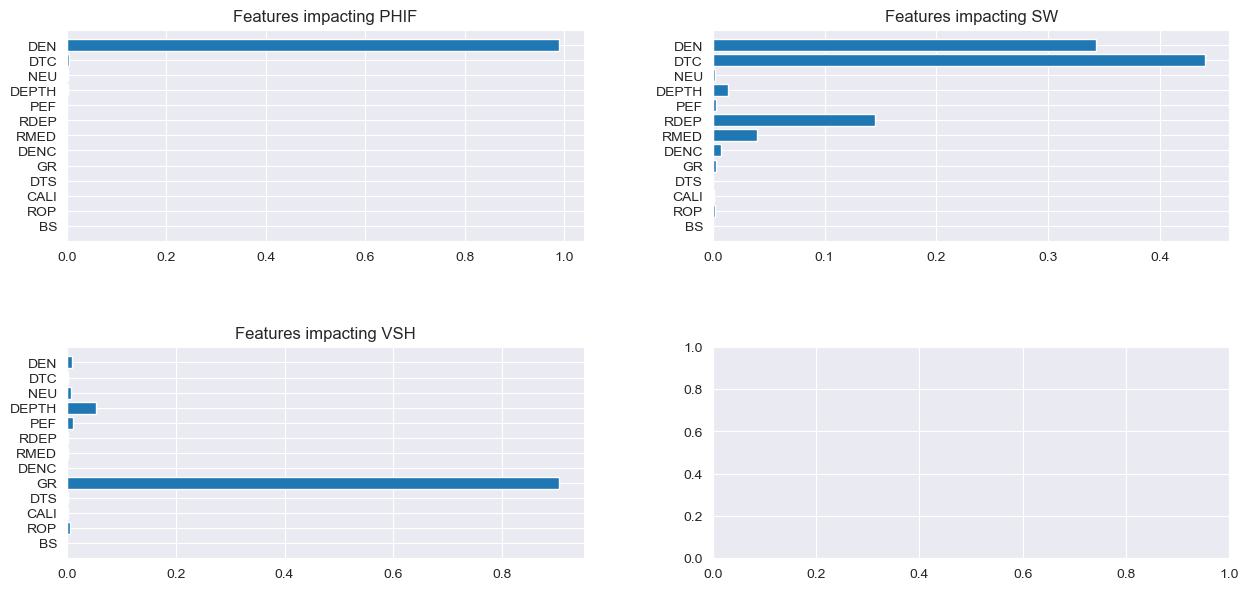

In [34]:
important_feature_check(feature_importance_set)

***The most important logs refelcted what is expected from domain knowledge***
1. ***DEN -  heavy hitter on PHIF***
2. ***DEPTH and GR - heavy hitter on VSH***
3. ***DEN,DTC,RDEP - heavy hitter on SW***

#### Analying feature using Principal Component Analysis (PCA)

*We shall use PCA to determine the eigenvectors needed to explain up to 80% of the variance in the data. This will further support the number features that is enough to yield good prediction if features must be dropped*

In [35]:
from sklearn.decomposition import PCA

def PCA_analysis (df, n_component=13):
    
    
    '''A function that will return the eigenvalues and visuals of the extent the variance was explained
    args: n_component is the number of principal components, 
        df: DataFrame
    '''    
    scaler = MinMaxScaler()
    
    Xtrain = scaler.fit_transform(df.iloc[:,1:14])
    pca = PCA(n_component)
    pca.fit(Xtrain)
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(15, 7), dpi=100)

    ax[0].bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
    ax[0].set_ylabel('Variation explained')
    ax[0].set_xlabel('eigen Value')

    ax[1].step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
    ax[1].set_ylabel('Cum of variation explained')
    ax[1].set_xlabel('eigen Value')
    plt.show()

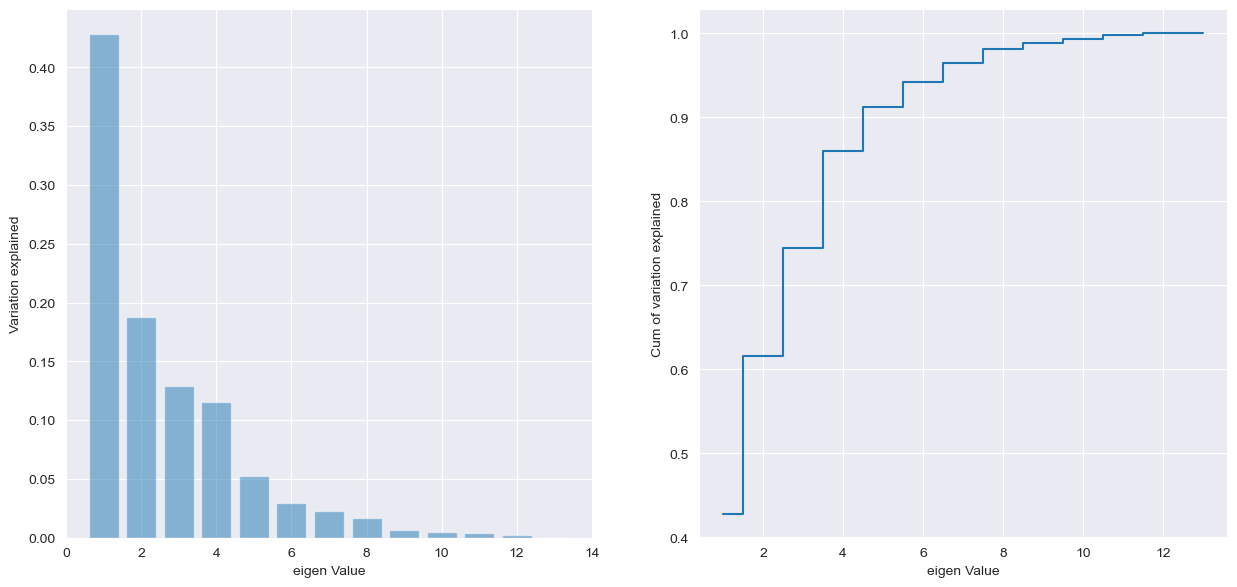

In [36]:
PCA_analysis (feature_importance_set, n_component=13)

***Again, PCA approach suggests that about 5 components is enough to explain more than 90% of the variance. This is in agreement with the 5 most important features already identified. This will help in dimensionality reduction and improvement in runtime***

#### Visualizing the features after deleting all missing values in 3D

In [37]:
scaler = MinMaxScaler()
Xa = scaler.fit_transform(feature_importance_set.iloc[:,1:14])
pca_3d = PCA(n_components=3)
pca_3d.fit(Xa)

PCA(n_components=3)

In [38]:
pca_features = pd.DataFrame((pca_3d.transform(Xa)), columns= ['X1','X2','X3'])
pca_features.head()

X1        X2        X3
0 -0.554809 -0.423077  0.284990
1 -0.523503 -0.371090  0.110919
2 -0.491067 -0.330311 -0.010197
3 -0.469983 -0.323258 -0.052742
4 -0.470278 -0.336007 -0.007439

Text(0.5, 0.92, '3D plot of entire data')

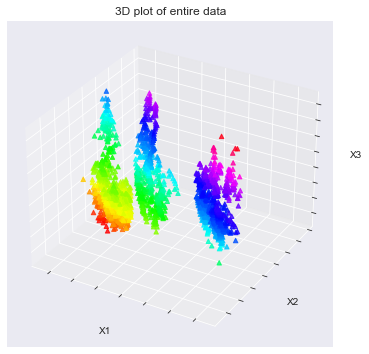

In [39]:
from mpl_toolkits.mplot3d import Axes3D


## 3D plots of all data points

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(pca_features.iloc[:, 0], pca_features.iloc[:, 1], pca_features.iloc[:, 2],
                    alpha = 0.8,
                     c = (pca_features.iloc[:, 0]+ pca_features.iloc[:, 1]+ pca_features.iloc[:, 2]),
                    cmap = my_cmap,
                    marker ='^')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D plot of entire data')

## Checking the distribution of the training data when all roles with missing values deleted

In [40]:
def distribution(df):
    
    fig = plt.figure(figsize=[15,10], dpi=200)
    fig.subplots_adjust(hspace=1, wspace=0.25)
    sns.set_style("darkgrid")

    columns = ['DENC','NEU','PEF','VSH','DEN','SW','PHIF','DTC','DTS','BS','CALI','GR','RDEP','RMED','ROP','DEPTH']
    j = 1
    for i in columns:
        ax = fig.add_subplot(4,4,j)
        sns.distplot(df[i], ax=ax, color = 'm')
        j = j+1
        if j>len(columns):
            break
    plt.show()

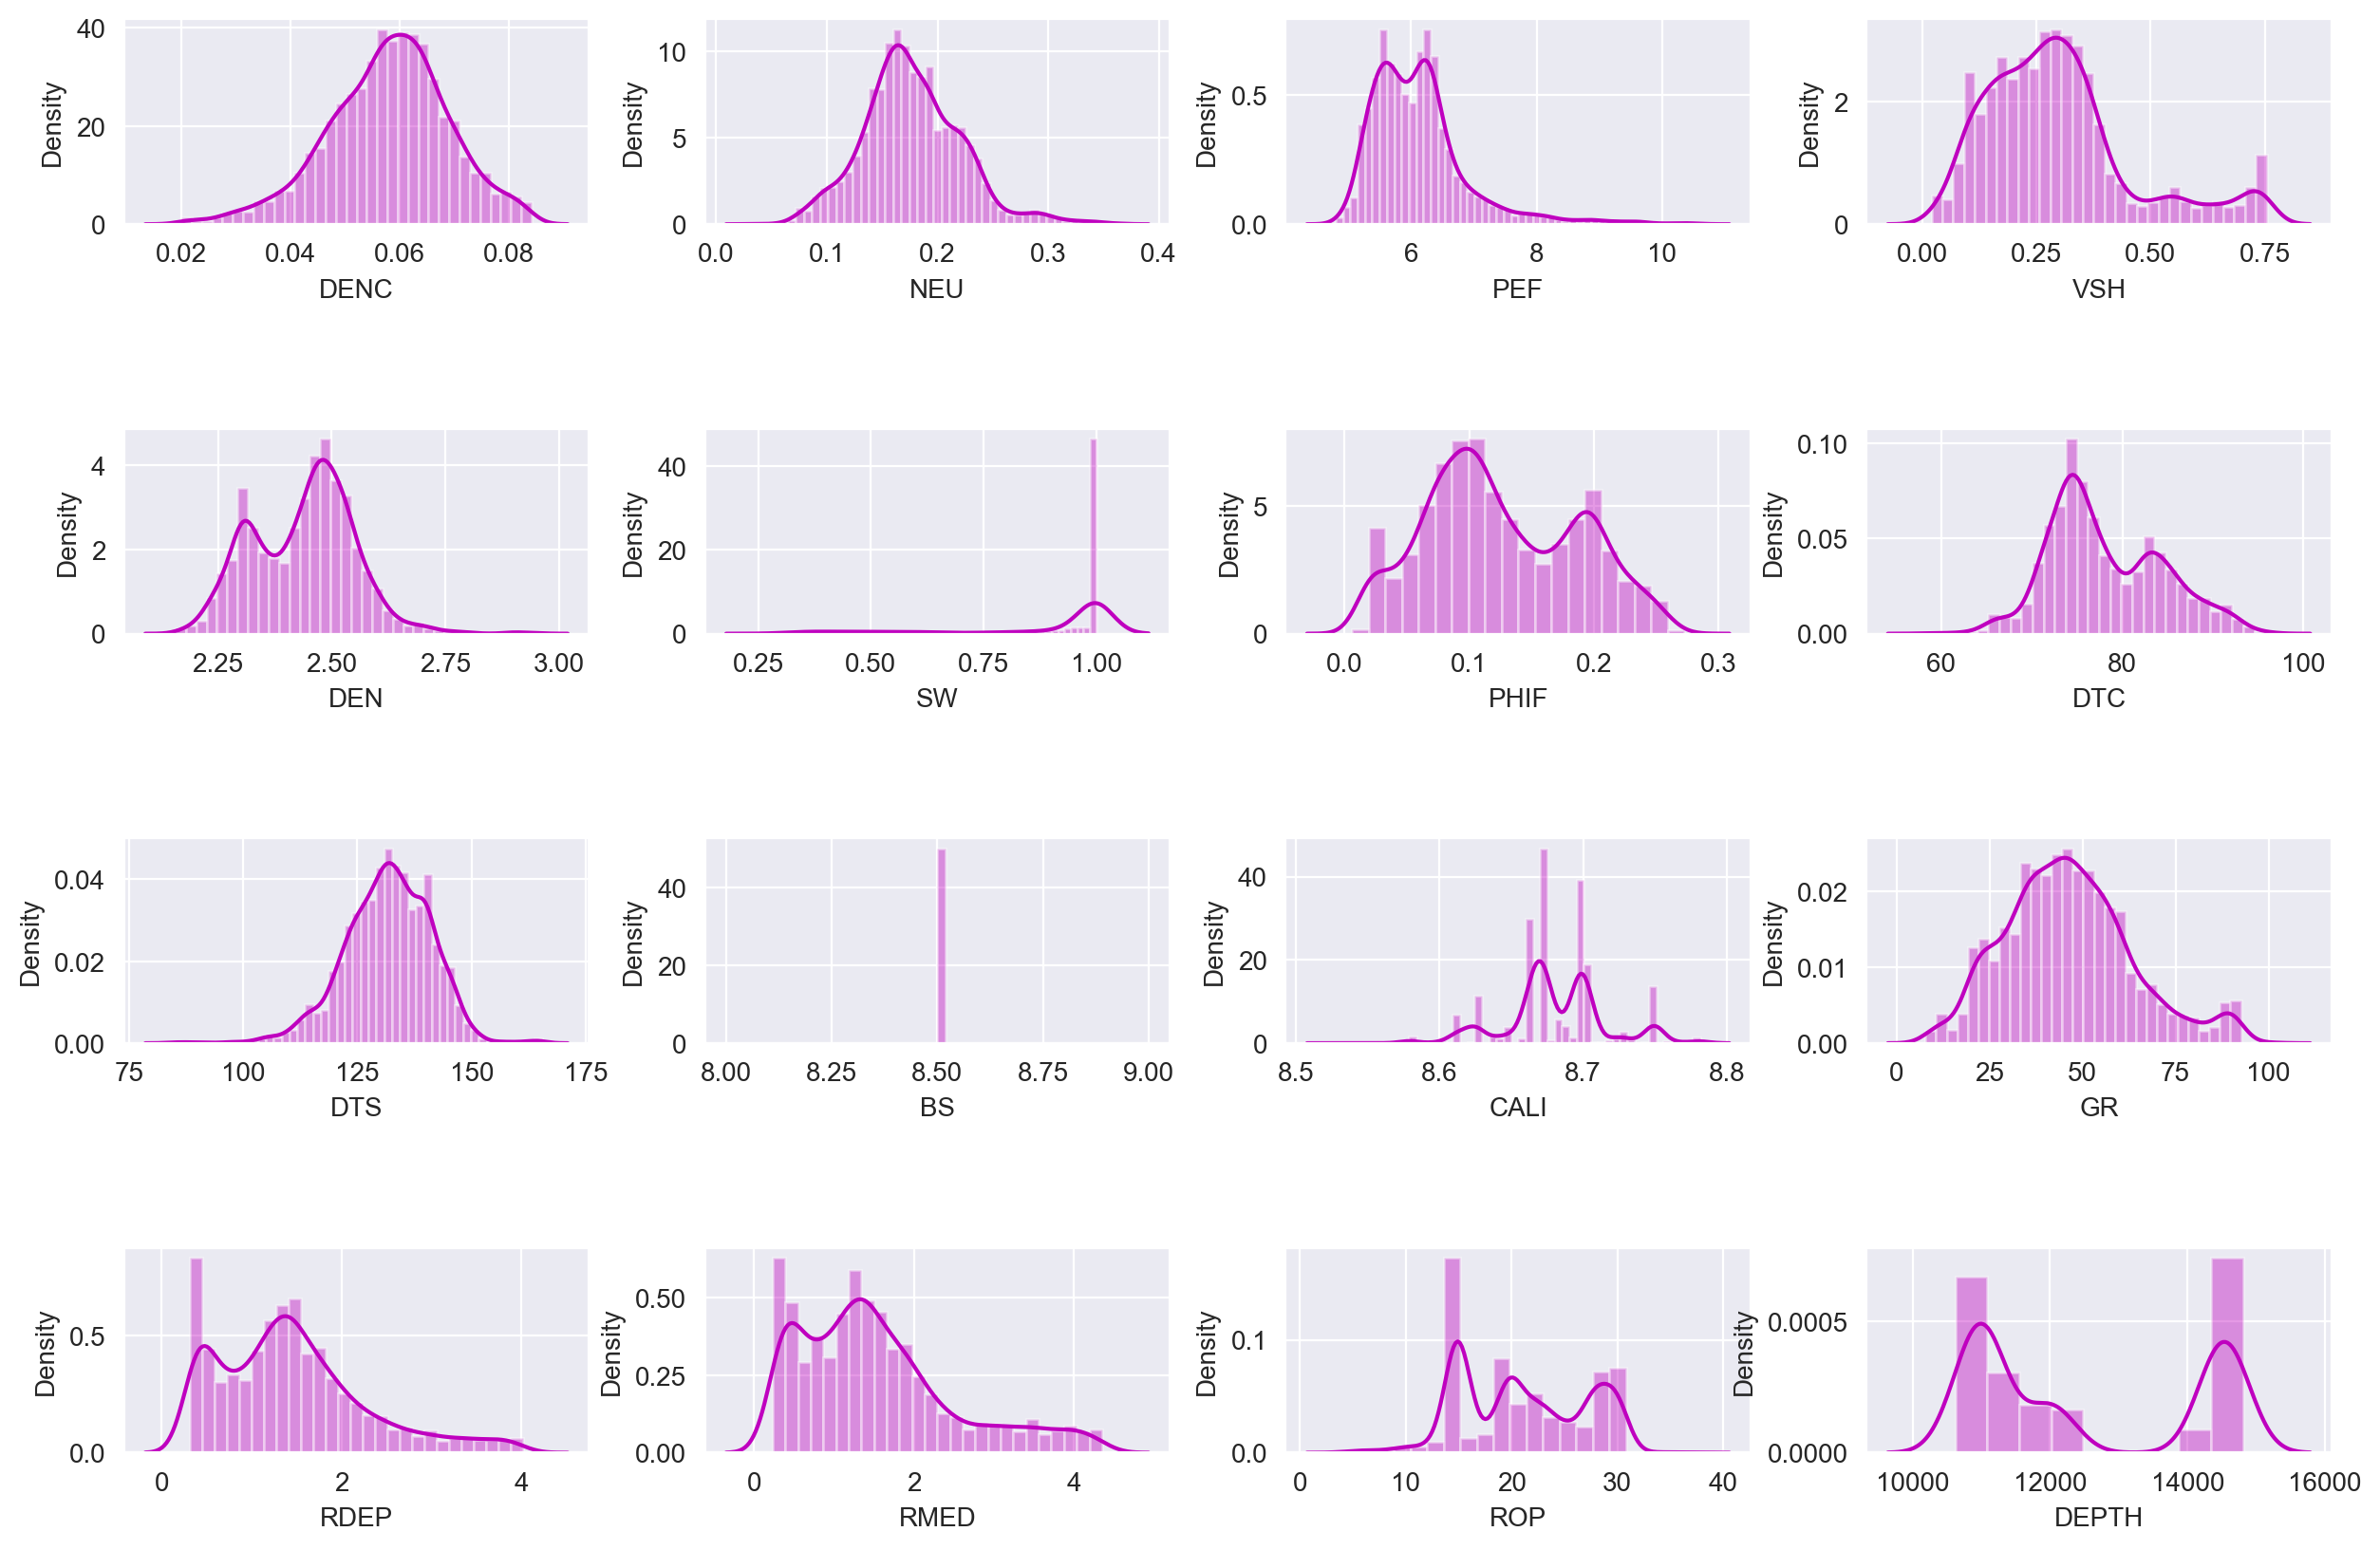

In [41]:
distribution(feature_importance_set)

In [42]:
feature_importance_set.shape

(3234, 17)

***Wells left in our training data***

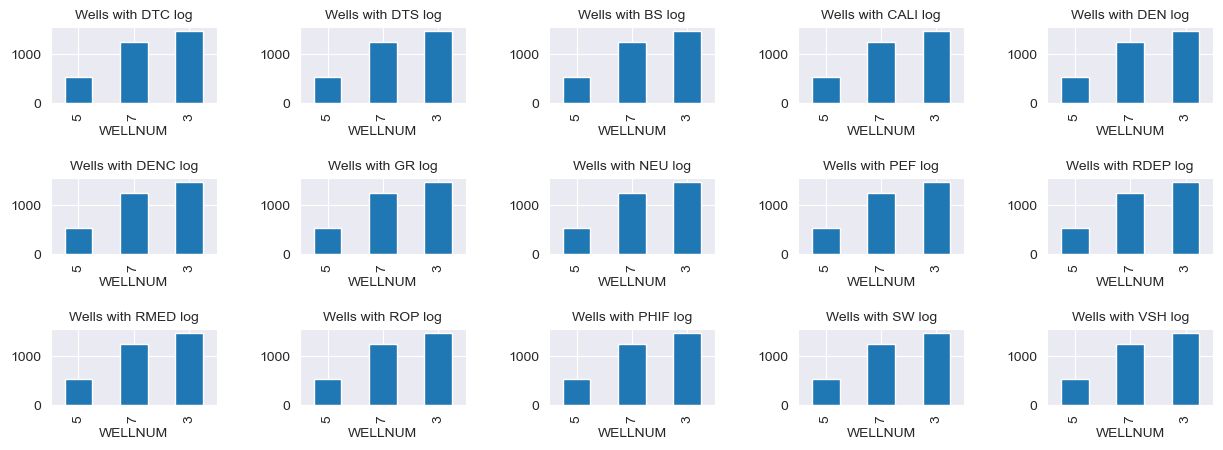

In [43]:
wells_and_logs(feature_importance_set)

In [44]:
feature_importance_set.groupby(by=['WELLNUM']).count()

DEPTH   DTC   DTS    BS  CALI   DEN  DENC    GR   NEU   PEF  RDEP  \
WELLNUM                                                                      
3         1465  1465  1465  1465  1465  1465  1465  1465  1465  1465  1465   
5          524   524   524   524   524   524   524   524   524   524   524   
7         1245  1245  1245  1245  1245  1245  1245  1245  1245  1245  1245   

         RMED   ROP  PHIF    SW   VSH  
WELLNUM                                
3        1465  1465  1465  1465  1465  
5         524   524   524   524   524  
7        1245  1245  1245  1245  1245

***We shall use well 3 and 7 for training and well 5 for testing***

**Unfortuntely we shall proceed by assuming that 3234 data point would describe the entire uncertainty space. However, from the distribution plot, a reasonable amount of range is covered**

### Try regression with complete columns of logs (Combination of important and non important features) except for well number

**training dataset (subset of considered training data except data for well 5 which will be use for the initial testing)**

In [45]:
TRAINX = (feature_importance_set[(feature_importance_set['WELLNUM'] !=5)]).iloc[:,1:14]
TRAINY = (feature_importance_set[(feature_importance_set['WELLNUM'] !=5)]).iloc[:,14:19]
ytrain_subset = TRAINY.values

TRAINX.shape, TRAINY.shape

((2710, 13), (2710, 3))

In [46]:
TRAINX.head(3)

DEPTH      DTC       DTS   BS    CALI     DEN    DENC       GR  \
129388  10620.74  86.3459  146.5515  8.5  8.6553  2.4776  0.0335  75.9403   
129389  10621.06  86.1366  145.5934  8.5  8.6976  2.5042  0.0509  75.6877   
129390  10621.39  86.0353  144.0944  8.5  8.6976  2.5229  0.0699  73.7419   

           NEU     PEF    RDEP    RMED      ROP  
129388  0.2445  6.8871  1.1378  1.0959  37.0932  
129389  0.2373  6.9144  1.1241  1.0691  36.5976  
129390  0.2337  6.9237  1.1165  1.0624  35.7824

In [47]:
TRAINY.head(3)

PHIF   SW     VSH
129388  0.1099  1.0  0.5675
129389  0.0939  1.0  0.5655
129390  0.0826  1.0  0.5499

**testing dataset (subset of considered training data - WELL 5)**

In [48]:
TESTX = (feature_importance_set[feature_importance_set['WELLNUM']==5]).iloc[:,1:14]
TESTY = (feature_importance_set[feature_importance_set['WELLNUM']==5]).iloc[:,14:19]
ytest_sub = TESTY.values
TESTX.shape, TESTY.shape

((524, 13), (524, 3))

In [49]:
TESTY.head(3)

PHIF   SW    VSH
204566  0.088  1.0  0.742
204567  0.090  1.0  0.740
204604  0.094  1.0  0.754

**for cross validation dataset**

*Part of the training dataset would be held-up for evaluation of the model score using K-fold CV*

### Scale all subset data using the standard scaler approach

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# xtrain_subset = scaler.fit_transform(TRAINX)
# xtest_subset = scaler.transform(TESTX)

# # xtrain_subset=TRAINX.apply(zscore)
# # xtest_subset=TESTX.apply(zscore)
# xtrain_subset.shape , xtest_subset.shape

# from scipy.stats import zscore
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
xtrain_subset = scaler.fit_transform(TRAINX)
xtest_subset = scaler.transform(TESTX)

# xtrain_subset=TRAINX.apply(zscore)
# xtest_subset=TESTX.apply(zscore)
xtrain_subset.shape , xtest_subset.shape

((2710, 13), (524, 13))

### test lgbm, xgboost, catboost & randomforest regressor for the choice of model to use

In [51]:
### Evaluation with lightgbm ensemble for regression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [52]:
models = {"lgbm": LGBMRegressor(),
             "xgboost": XGBRegressor(),
             "catboost": CatBoostRegressor(),
             "randome forest": RandomForestRegressor()}

# Create a Function to fit and score the models
def fit_and_predict(models, X_train, X_test, y_train, y_test):
    """
    This function allows for fitting and and testing the machine learning algorithm.
    algorithms: a dictionary of different scikit-learn tree based machine learning models
    X_train: training data 
    X_test: test data 
    y_train: target training data
    y_test: target test data
    """
    # Set Random seed
    np.random.seed(1)
    
    # Create a disctionary to keep model scores
    #model_scores = {}
    collect_predict = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        Algo = MultiOutputRegressor(estimator=model)
        Algo.fit(X_train, y_train)
        
        collect_predict[name]={}
        collect_predict[name]['PHIF']= ((Algo.predict(X_test))[:,0]).tolist()
        collect_predict[name]['SW']= ((Algo.predict(X_test))[:,1]).tolist()
        collect_predict[name]['VSH']= ((Algo.predict(X_test))[:,2]).tolist()
        

        
    return collect_predict


In [53]:
model_scores= fit_and_predict(models=models, 
                             X_train= xtrain_subset, 
                             X_test=xtest_subset,
                            y_train= ytrain_subset,
                            y_test=ytest_sub)

Learning rate set to 0.047928
0:	learn: 0.0538527	total: 148ms	remaining: 2m 28s
1:	learn: 0.0515384	total: 151ms	remaining: 1m 15s
2:	learn: 0.0494905	total: 154ms	remaining: 51.3s
3:	learn: 0.0473981	total: 157ms	remaining: 39.2s
4:	learn: 0.0453623	total: 160ms	remaining: 31.9s
5:	learn: 0.0434112	total: 163ms	remaining: 27s
6:	learn: 0.0416041	total: 166ms	remaining: 23.5s
7:	learn: 0.0398185	total: 169ms	remaining: 20.9s
8:	learn: 0.0381397	total: 172ms	remaining: 18.9s
9:	learn: 0.0365221	total: 175ms	remaining: 17.3s
10:	learn: 0.0350759	total: 178ms	remaining: 16s
11:	learn: 0.0335640	total: 181ms	remaining: 14.9s
12:	learn: 0.0321810	total: 185ms	remaining: 14.1s
13:	learn: 0.0308176	total: 188ms	remaining: 13.3s
14:	learn: 0.0295040	total: 191ms	remaining: 12.6s
15:	learn: 0.0283151	total: 194ms	remaining: 12s
16:	learn: 0.0272200	total: 197ms	remaining: 11.4s
17:	learn: 0.0261350	total: 200ms	remaining: 10.9s
18:	learn: 0.0250798	total: 203ms	remaining: 10.5s
19:	learn: 0.02

213:	learn: 0.0021094	total: 784ms	remaining: 2.88s
214:	learn: 0.0021082	total: 786ms	remaining: 2.87s
215:	learn: 0.0021040	total: 789ms	remaining: 2.86s
216:	learn: 0.0021003	total: 792ms	remaining: 2.86s
217:	learn: 0.0020973	total: 795ms	remaining: 2.85s
218:	learn: 0.0020961	total: 798ms	remaining: 2.85s
219:	learn: 0.0020890	total: 801ms	remaining: 2.84s
220:	learn: 0.0020805	total: 804ms	remaining: 2.83s
221:	learn: 0.0020762	total: 807ms	remaining: 2.83s
222:	learn: 0.0020660	total: 811ms	remaining: 2.83s
223:	learn: 0.0020586	total: 815ms	remaining: 2.82s
224:	learn: 0.0020541	total: 818ms	remaining: 2.82s
225:	learn: 0.0020526	total: 821ms	remaining: 2.81s
226:	learn: 0.0020473	total: 824ms	remaining: 2.8s
227:	learn: 0.0020462	total: 827ms	remaining: 2.8s
228:	learn: 0.0020435	total: 830ms	remaining: 2.79s
229:	learn: 0.0020360	total: 835ms	remaining: 2.79s
230:	learn: 0.0020322	total: 837ms	remaining: 2.79s
231:	learn: 0.0020249	total: 840ms	remaining: 2.78s
232:	learn: 0.

391:	learn: 0.0014566	total: 1.3s	remaining: 2.01s
392:	learn: 0.0014550	total: 1.3s	remaining: 2.01s
393:	learn: 0.0014521	total: 1.3s	remaining: 2s
394:	learn: 0.0014499	total: 1.3s	remaining: 2s
395:	learn: 0.0014474	total: 1.31s	remaining: 2s
396:	learn: 0.0014425	total: 1.31s	remaining: 1.99s
397:	learn: 0.0014413	total: 1.31s	remaining: 1.99s
398:	learn: 0.0014367	total: 1.32s	remaining: 1.99s
399:	learn: 0.0014344	total: 1.32s	remaining: 1.98s
400:	learn: 0.0014313	total: 1.32s	remaining: 1.98s
401:	learn: 0.0014287	total: 1.33s	remaining: 1.98s
402:	learn: 0.0014263	total: 1.33s	remaining: 1.97s
403:	learn: 0.0014242	total: 1.33s	remaining: 1.97s
404:	learn: 0.0014215	total: 1.34s	remaining: 1.96s
405:	learn: 0.0014197	total: 1.34s	remaining: 1.96s
406:	learn: 0.0014177	total: 1.34s	remaining: 1.96s
407:	learn: 0.0014150	total: 1.34s	remaining: 1.95s
408:	learn: 0.0014127	total: 1.35s	remaining: 1.95s
409:	learn: 0.0014119	total: 1.35s	remaining: 1.94s
410:	learn: 0.0014093	tot

580:	learn: 0.0011079	total: 1.82s	remaining: 1.31s
581:	learn: 0.0011052	total: 1.83s	remaining: 1.31s
582:	learn: 0.0011039	total: 1.83s	remaining: 1.31s
583:	learn: 0.0011015	total: 1.83s	remaining: 1.3s
584:	learn: 0.0010999	total: 1.83s	remaining: 1.3s
585:	learn: 0.0010976	total: 1.84s	remaining: 1.3s
586:	learn: 0.0010957	total: 1.84s	remaining: 1.29s
587:	learn: 0.0010945	total: 1.84s	remaining: 1.29s
588:	learn: 0.0010922	total: 1.85s	remaining: 1.29s
589:	learn: 0.0010913	total: 1.85s	remaining: 1.28s
590:	learn: 0.0010905	total: 1.85s	remaining: 1.28s
591:	learn: 0.0010887	total: 1.86s	remaining: 1.28s
592:	learn: 0.0010882	total: 1.86s	remaining: 1.27s
593:	learn: 0.0010875	total: 1.86s	remaining: 1.27s
594:	learn: 0.0010870	total: 1.86s	remaining: 1.27s
595:	learn: 0.0010857	total: 1.87s	remaining: 1.26s
596:	learn: 0.0010849	total: 1.87s	remaining: 1.26s
597:	learn: 0.0010833	total: 1.87s	remaining: 1.26s
598:	learn: 0.0010825	total: 1.88s	remaining: 1.25s
599:	learn: 0.0

759:	learn: 0.0009086	total: 2.34s	remaining: 739ms
760:	learn: 0.0009080	total: 2.34s	remaining: 736ms
761:	learn: 0.0009071	total: 2.35s	remaining: 733ms
762:	learn: 0.0009069	total: 2.35s	remaining: 730ms
763:	learn: 0.0009061	total: 2.35s	remaining: 727ms
764:	learn: 0.0009058	total: 2.35s	remaining: 724ms
765:	learn: 0.0009047	total: 2.36s	remaining: 720ms
766:	learn: 0.0009040	total: 2.36s	remaining: 717ms
767:	learn: 0.0009024	total: 2.36s	remaining: 714ms
768:	learn: 0.0009015	total: 2.37s	remaining: 711ms
769:	learn: 0.0008997	total: 2.37s	remaining: 708ms
770:	learn: 0.0008989	total: 2.37s	remaining: 705ms
771:	learn: 0.0008982	total: 2.38s	remaining: 702ms
772:	learn: 0.0008971	total: 2.38s	remaining: 699ms
773:	learn: 0.0008961	total: 2.38s	remaining: 696ms
774:	learn: 0.0008952	total: 2.38s	remaining: 692ms
775:	learn: 0.0008940	total: 2.39s	remaining: 689ms
776:	learn: 0.0008935	total: 2.39s	remaining: 686ms
777:	learn: 0.0008933	total: 2.39s	remaining: 683ms
778:	learn: 

939:	learn: 0.0007688	total: 2.85s	remaining: 182ms
940:	learn: 0.0007679	total: 2.85s	remaining: 179ms
941:	learn: 0.0007674	total: 2.86s	remaining: 176ms
942:	learn: 0.0007666	total: 2.86s	remaining: 173ms
943:	learn: 0.0007660	total: 2.86s	remaining: 170ms
944:	learn: 0.0007651	total: 2.87s	remaining: 167ms
945:	learn: 0.0007647	total: 2.87s	remaining: 164ms
946:	learn: 0.0007643	total: 2.87s	remaining: 161ms
947:	learn: 0.0007638	total: 2.88s	remaining: 158ms
948:	learn: 0.0007636	total: 2.88s	remaining: 155ms
949:	learn: 0.0007631	total: 2.88s	remaining: 152ms
950:	learn: 0.0007628	total: 2.88s	remaining: 149ms
951:	learn: 0.0007624	total: 2.89s	remaining: 146ms
952:	learn: 0.0007618	total: 2.89s	remaining: 143ms
953:	learn: 0.0007614	total: 2.89s	remaining: 140ms
954:	learn: 0.0007612	total: 2.9s	remaining: 137ms
955:	learn: 0.0007607	total: 2.9s	remaining: 133ms
956:	learn: 0.0007602	total: 2.9s	remaining: 130ms
957:	learn: 0.0007594	total: 2.9s	remaining: 127ms
958:	learn: 0.00

121:	learn: 0.0197543	total: 341ms	remaining: 2.45s
122:	learn: 0.0197113	total: 343ms	remaining: 2.45s
123:	learn: 0.0196034	total: 346ms	remaining: 2.44s
124:	learn: 0.0194627	total: 349ms	remaining: 2.44s
125:	learn: 0.0194246	total: 351ms	remaining: 2.44s
126:	learn: 0.0193344	total: 354ms	remaining: 2.43s
127:	learn: 0.0192747	total: 357ms	remaining: 2.43s
128:	learn: 0.0191829	total: 360ms	remaining: 2.43s
129:	learn: 0.0191490	total: 363ms	remaining: 2.43s
130:	learn: 0.0191068	total: 366ms	remaining: 2.43s
131:	learn: 0.0190348	total: 369ms	remaining: 2.43s
132:	learn: 0.0189870	total: 372ms	remaining: 2.42s
133:	learn: 0.0189457	total: 375ms	remaining: 2.42s
134:	learn: 0.0188838	total: 378ms	remaining: 2.42s
135:	learn: 0.0188494	total: 380ms	remaining: 2.42s
136:	learn: 0.0187855	total: 383ms	remaining: 2.41s
137:	learn: 0.0187459	total: 386ms	remaining: 2.41s
138:	learn: 0.0186884	total: 388ms	remaining: 2.4s
139:	learn: 0.0186381	total: 391ms	remaining: 2.4s
140:	learn: 0.

301:	learn: 0.0119172	total: 862ms	remaining: 1.99s
302:	learn: 0.0118927	total: 865ms	remaining: 1.99s
303:	learn: 0.0118715	total: 868ms	remaining: 1.99s
304:	learn: 0.0118336	total: 871ms	remaining: 1.99s
305:	learn: 0.0118102	total: 874ms	remaining: 1.98s
306:	learn: 0.0117780	total: 877ms	remaining: 1.98s
307:	learn: 0.0117442	total: 880ms	remaining: 1.98s
308:	learn: 0.0117202	total: 883ms	remaining: 1.98s
309:	learn: 0.0116913	total: 887ms	remaining: 1.97s
310:	learn: 0.0116697	total: 890ms	remaining: 1.97s
311:	learn: 0.0116562	total: 892ms	remaining: 1.97s
312:	learn: 0.0116141	total: 895ms	remaining: 1.96s
313:	learn: 0.0115957	total: 898ms	remaining: 1.96s
314:	learn: 0.0115768	total: 901ms	remaining: 1.96s
315:	learn: 0.0115299	total: 904ms	remaining: 1.96s
316:	learn: 0.0115158	total: 906ms	remaining: 1.95s
317:	learn: 0.0114932	total: 909ms	remaining: 1.95s
318:	learn: 0.0114640	total: 912ms	remaining: 1.95s
319:	learn: 0.0114514	total: 914ms	remaining: 1.94s
320:	learn: 

479:	learn: 0.0083903	total: 1.37s	remaining: 1.48s
480:	learn: 0.0083692	total: 1.37s	remaining: 1.48s
481:	learn: 0.0083492	total: 1.37s	remaining: 1.47s
482:	learn: 0.0083302	total: 1.37s	remaining: 1.47s
483:	learn: 0.0082996	total: 1.38s	remaining: 1.47s
484:	learn: 0.0082907	total: 1.38s	remaining: 1.47s
485:	learn: 0.0082772	total: 1.38s	remaining: 1.46s
486:	learn: 0.0082683	total: 1.39s	remaining: 1.46s
487:	learn: 0.0082647	total: 1.39s	remaining: 1.46s
488:	learn: 0.0082534	total: 1.39s	remaining: 1.46s
489:	learn: 0.0082295	total: 1.4s	remaining: 1.45s
490:	learn: 0.0082175	total: 1.4s	remaining: 1.45s
491:	learn: 0.0082036	total: 1.4s	remaining: 1.45s
492:	learn: 0.0081908	total: 1.4s	remaining: 1.44s
493:	learn: 0.0081787	total: 1.41s	remaining: 1.44s
494:	learn: 0.0081709	total: 1.41s	remaining: 1.44s
495:	learn: 0.0081581	total: 1.41s	remaining: 1.44s
496:	learn: 0.0081200	total: 1.42s	remaining: 1.43s
497:	learn: 0.0081078	total: 1.42s	remaining: 1.43s
498:	learn: 0.00

662:	learn: 0.0062941	total: 1.89s	remaining: 961ms
663:	learn: 0.0062861	total: 1.89s	remaining: 958ms
664:	learn: 0.0062777	total: 1.9s	remaining: 955ms
665:	learn: 0.0062703	total: 1.9s	remaining: 953ms
666:	learn: 0.0062666	total: 1.9s	remaining: 950ms
667:	learn: 0.0062638	total: 1.9s	remaining: 947ms
668:	learn: 0.0062595	total: 1.91s	remaining: 944ms
669:	learn: 0.0062521	total: 1.91s	remaining: 941ms
670:	learn: 0.0062460	total: 1.91s	remaining: 938ms
671:	learn: 0.0062402	total: 1.92s	remaining: 935ms
672:	learn: 0.0062342	total: 1.92s	remaining: 933ms
673:	learn: 0.0062285	total: 1.92s	remaining: 930ms
674:	learn: 0.0062239	total: 1.93s	remaining: 927ms
675:	learn: 0.0062171	total: 1.93s	remaining: 924ms
676:	learn: 0.0062112	total: 1.93s	remaining: 921ms
677:	learn: 0.0062008	total: 1.93s	remaining: 918ms
678:	learn: 0.0061910	total: 1.94s	remaining: 915ms
679:	learn: 0.0061750	total: 1.94s	remaining: 913ms
680:	learn: 0.0061589	total: 1.94s	remaining: 910ms
681:	learn: 0.00

847:	learn: 0.0049755	total: 2.42s	remaining: 433ms
848:	learn: 0.0049716	total: 2.42s	remaining: 431ms
849:	learn: 0.0049631	total: 2.42s	remaining: 428ms
850:	learn: 0.0049588	total: 2.43s	remaining: 425ms
851:	learn: 0.0049511	total: 2.43s	remaining: 422ms
852:	learn: 0.0049499	total: 2.43s	remaining: 419ms
853:	learn: 0.0049442	total: 2.44s	remaining: 417ms
854:	learn: 0.0049363	total: 2.44s	remaining: 414ms
855:	learn: 0.0049324	total: 2.44s	remaining: 411ms
856:	learn: 0.0049284	total: 2.44s	remaining: 408ms
857:	learn: 0.0049187	total: 2.45s	remaining: 405ms
858:	learn: 0.0049130	total: 2.45s	remaining: 402ms
859:	learn: 0.0049090	total: 2.45s	remaining: 400ms
860:	learn: 0.0049023	total: 2.46s	remaining: 397ms
861:	learn: 0.0048984	total: 2.46s	remaining: 394ms
862:	learn: 0.0048962	total: 2.46s	remaining: 391ms
863:	learn: 0.0048928	total: 2.46s	remaining: 388ms
864:	learn: 0.0048882	total: 2.47s	remaining: 385ms
865:	learn: 0.0048826	total: 2.47s	remaining: 382ms
866:	learn: 

66:	learn: 0.0194577	total: 185ms	remaining: 2.57s
67:	learn: 0.0191584	total: 188ms	remaining: 2.57s
68:	learn: 0.0188257	total: 190ms	remaining: 2.57s
69:	learn: 0.0185260	total: 193ms	remaining: 2.57s
70:	learn: 0.0182352	total: 196ms	remaining: 2.56s
71:	learn: 0.0179655	total: 199ms	remaining: 2.56s
72:	learn: 0.0176277	total: 201ms	remaining: 2.56s
73:	learn: 0.0173709	total: 204ms	remaining: 2.55s
74:	learn: 0.0171270	total: 207ms	remaining: 2.55s
75:	learn: 0.0169307	total: 209ms	remaining: 2.55s
76:	learn: 0.0167189	total: 212ms	remaining: 2.55s
77:	learn: 0.0165033	total: 215ms	remaining: 2.54s
78:	learn: 0.0163161	total: 218ms	remaining: 2.54s
79:	learn: 0.0160954	total: 221ms	remaining: 2.54s
80:	learn: 0.0158893	total: 224ms	remaining: 2.54s
81:	learn: 0.0157050	total: 227ms	remaining: 2.54s
82:	learn: 0.0155615	total: 229ms	remaining: 2.53s
83:	learn: 0.0153578	total: 232ms	remaining: 2.53s
84:	learn: 0.0151290	total: 235ms	remaining: 2.53s
85:	learn: 0.0150094	total: 238

242:	learn: 0.0062254	total: 693ms	remaining: 2.16s
243:	learn: 0.0062097	total: 696ms	remaining: 2.15s
244:	learn: 0.0061879	total: 699ms	remaining: 2.15s
245:	learn: 0.0061731	total: 702ms	remaining: 2.15s
246:	learn: 0.0061480	total: 705ms	remaining: 2.15s
247:	learn: 0.0061235	total: 708ms	remaining: 2.15s
248:	learn: 0.0061019	total: 712ms	remaining: 2.15s
249:	learn: 0.0060795	total: 715ms	remaining: 2.14s
250:	learn: 0.0060576	total: 718ms	remaining: 2.14s
251:	learn: 0.0060347	total: 721ms	remaining: 2.14s
252:	learn: 0.0060250	total: 724ms	remaining: 2.14s
253:	learn: 0.0060040	total: 727ms	remaining: 2.13s
254:	learn: 0.0059788	total: 730ms	remaining: 2.13s
255:	learn: 0.0059558	total: 733ms	remaining: 2.13s
256:	learn: 0.0059339	total: 736ms	remaining: 2.13s
257:	learn: 0.0059124	total: 739ms	remaining: 2.12s
258:	learn: 0.0058979	total: 742ms	remaining: 2.12s
259:	learn: 0.0058796	total: 745ms	remaining: 2.12s
260:	learn: 0.0058628	total: 747ms	remaining: 2.12s
261:	learn: 

422:	learn: 0.0041499	total: 1.21s	remaining: 1.65s
423:	learn: 0.0041450	total: 1.21s	remaining: 1.65s
424:	learn: 0.0041334	total: 1.21s	remaining: 1.64s
425:	learn: 0.0041268	total: 1.22s	remaining: 1.64s
426:	learn: 0.0041188	total: 1.22s	remaining: 1.64s
427:	learn: 0.0041117	total: 1.22s	remaining: 1.64s
428:	learn: 0.0041043	total: 1.23s	remaining: 1.63s
429:	learn: 0.0040984	total: 1.23s	remaining: 1.63s
430:	learn: 0.0040922	total: 1.23s	remaining: 1.63s
431:	learn: 0.0040843	total: 1.24s	remaining: 1.63s
432:	learn: 0.0040794	total: 1.24s	remaining: 1.62s
433:	learn: 0.0040740	total: 1.24s	remaining: 1.62s
434:	learn: 0.0040691	total: 1.24s	remaining: 1.62s
435:	learn: 0.0040627	total: 1.25s	remaining: 1.61s
436:	learn: 0.0040549	total: 1.25s	remaining: 1.61s
437:	learn: 0.0040450	total: 1.25s	remaining: 1.61s
438:	learn: 0.0040345	total: 1.25s	remaining: 1.6s
439:	learn: 0.0040288	total: 1.26s	remaining: 1.6s
440:	learn: 0.0040181	total: 1.26s	remaining: 1.6s
441:	learn: 0.0

604:	learn: 0.0032250	total: 1.73s	remaining: 1.13s
605:	learn: 0.0032195	total: 1.73s	remaining: 1.13s
606:	learn: 0.0032140	total: 1.74s	remaining: 1.12s
607:	learn: 0.0032121	total: 1.74s	remaining: 1.12s
608:	learn: 0.0032072	total: 1.74s	remaining: 1.12s
609:	learn: 0.0032036	total: 1.75s	remaining: 1.12s
610:	learn: 0.0032000	total: 1.75s	remaining: 1.11s
611:	learn: 0.0031967	total: 1.75s	remaining: 1.11s
612:	learn: 0.0031927	total: 1.75s	remaining: 1.11s
613:	learn: 0.0031869	total: 1.76s	remaining: 1.1s
614:	learn: 0.0031832	total: 1.76s	remaining: 1.1s
615:	learn: 0.0031797	total: 1.76s	remaining: 1.1s
616:	learn: 0.0031764	total: 1.76s	remaining: 1.1s
617:	learn: 0.0031746	total: 1.77s	remaining: 1.09s
618:	learn: 0.0031710	total: 1.77s	remaining: 1.09s
619:	learn: 0.0031662	total: 1.77s	remaining: 1.09s
620:	learn: 0.0031634	total: 1.78s	remaining: 1.08s
621:	learn: 0.0031601	total: 1.78s	remaining: 1.08s
622:	learn: 0.0031563	total: 1.78s	remaining: 1.08s
623:	learn: 0.00

783:	learn: 0.0026591	total: 2.24s	remaining: 618ms
784:	learn: 0.0026571	total: 2.25s	remaining: 615ms
785:	learn: 0.0026557	total: 2.25s	remaining: 612ms
786:	learn: 0.0026537	total: 2.25s	remaining: 610ms
787:	learn: 0.0026514	total: 2.25s	remaining: 607ms
788:	learn: 0.0026490	total: 2.26s	remaining: 604ms
789:	learn: 0.0026476	total: 2.26s	remaining: 601ms
790:	learn: 0.0026448	total: 2.26s	remaining: 598ms
791:	learn: 0.0026420	total: 2.27s	remaining: 596ms
792:	learn: 0.0026401	total: 2.27s	remaining: 593ms
793:	learn: 0.0026391	total: 2.27s	remaining: 590ms
794:	learn: 0.0026378	total: 2.28s	remaining: 587ms
795:	learn: 0.0026363	total: 2.28s	remaining: 584ms
796:	learn: 0.0026347	total: 2.28s	remaining: 581ms
797:	learn: 0.0026320	total: 2.28s	remaining: 578ms
798:	learn: 0.0026292	total: 2.29s	remaining: 575ms
799:	learn: 0.0026246	total: 2.29s	remaining: 573ms
800:	learn: 0.0026230	total: 2.29s	remaining: 570ms
801:	learn: 0.0026201	total: 2.29s	remaining: 567ms
802:	learn: 

962:	learn: 0.0022769	total: 2.76s	remaining: 106ms
963:	learn: 0.0022760	total: 2.77s	remaining: 103ms
964:	learn: 0.0022732	total: 2.77s	remaining: 100ms
965:	learn: 0.0022718	total: 2.77s	remaining: 97.6ms
966:	learn: 0.0022697	total: 2.77s	remaining: 94.7ms
967:	learn: 0.0022672	total: 2.78s	remaining: 91.8ms
968:	learn: 0.0022658	total: 2.78s	remaining: 89ms
969:	learn: 0.0022642	total: 2.78s	remaining: 86.1ms
970:	learn: 0.0022621	total: 2.79s	remaining: 83.2ms
971:	learn: 0.0022612	total: 2.79s	remaining: 80.4ms
972:	learn: 0.0022593	total: 2.79s	remaining: 77.5ms
973:	learn: 0.0022577	total: 2.79s	remaining: 74.6ms
974:	learn: 0.0022565	total: 2.8s	remaining: 71.8ms
975:	learn: 0.0022546	total: 2.8s	remaining: 68.9ms
976:	learn: 0.0022522	total: 2.8s	remaining: 66ms
977:	learn: 0.0022505	total: 2.81s	remaining: 63.1ms
978:	learn: 0.0022489	total: 2.81s	remaining: 60.3ms
979:	learn: 0.0022468	total: 2.81s	remaining: 57.4ms
980:	learn: 0.0022458	total: 2.81s	remaining: 54.5ms
981

In [54]:
def prediction_to_dataframe(collect_predict):
    collection_dict = collect_predict
    pandas_dict = {}
    for outerKey, innerDict in collection_dict.items():
        for innerKey, values in innerDict.items():
            pandas_dict[(outerKey,innerKey)] = values
    multiIndex_dataFrame = pd.DataFrame(pandas_dict)
    return  multiIndex_dataFrame  

In [55]:
result_df = prediction_to_dataframe(model_scores)
result_df.head()

lgbm                       xgboost                      catboost  \
       PHIF        SW       VSH      PHIF        SW       VSH      PHIF   
0  0.085443  1.004591  0.541712  0.086968  0.999280  0.489456  0.086311   
1  0.088227  1.004146  0.541945  0.089784  0.999956  0.485977  0.089630   
2  0.089559  0.999625  0.544040  0.092467  0.997290  0.515350  0.092549   
3  0.088040  0.996991  0.545328  0.090085  0.999065  0.519150  0.090082   
4  0.082568  0.999950  0.546724  0.085261  1.000661  0.520006  0.083685   

                      randome forest                      
         SW       VSH           PHIF        SW       VSH  
0  1.002261  0.732111       0.085746  1.000000  0.491889  
1  1.002881  0.725290       0.090022  1.000000  0.506442  
2  1.000204  0.734474       0.091277  1.000000  0.526332  
3  0.998569  0.735431       0.090339  1.000000  0.527750  
4  0.999185  0.735112       0.081455  0.999249  0.527883

In [56]:
lgbm_phif = result_df['lgbm','PHIF'] 
lgbm_SW = result_df['lgbm','SW']
lgbm_VSH = result_df['lgbm','VSH']

xgboost_phif = result_df['xgboost','PHIF']
xgboost_SW = result_df['xgboost','SW']
xgboost_VSH = result_df['xgboost','VSH']

catboost_phif = result_df['catboost','PHIF']
catboost_SW = result_df['catboost','SW']
catboost_VSH = result_df['catboost','VSH']

randome_forest_phif = result_df['randome forest','PHIF']
randome_forest_SW = result_df['randome forest','SW']
randome_forest_VSH = result_df['randome forest','VSH']

In [57]:
def scores_RMSE_R2(y_predict, y_real):
    RMSE = (np.sqrt(mean_squared_error(y_real, y_predict)))
    R2 = (r2_score(y_real, y_predict))
    print('RMSE= ',RMSE)
    print('R2= ',R2)

### Printing all result to select a model to carry forward to the next phase

In [58]:
print("result for lgbm model--PHIF")
lg1 = scores_RMSE_R2(lgbm_phif, TESTY['PHIF'])
print()

print("result for lgbm model--SW")
lg2 = scores_RMSE_R2(lgbm_SW, TESTY['SW'])
print()

print("result for lgbm model--VSH")
lg3 = scores_RMSE_R2(lgbm_VSH, TESTY['VSH'])
print()
print()

print("result for xgboost model--PHIF")
xg1 = scores_RMSE_R2(xgboost_phif, TESTY['PHIF'])
print()

print("result for xgboost model--SW")
xg2 = scores_RMSE_R2(xgboost_SW, TESTY['SW'])
print()

print("result for xgboost model--VSH")
xg3 = scores_RMSE_R2(xgboost_VSH, TESTY['VSH'])
print()
print()

print("result for catboost model--PHIF")
cb1 = scores_RMSE_R2(catboost_phif, TESTY['PHIF'])
print()

print("result for catboost model--SW")
cb2 = scores_RMSE_R2(catboost_SW, TESTY['SW'])
print()

print("result for catboost model--VSH")
cb3 = scores_RMSE_R2(catboost_VSH, TESTY['VSH'])
print()
print()

print("result for Random forest model--PHIF")
rf1 = scores_RMSE_R2(randome_forest_phif, TESTY['PHIF'])
print()

print("result for Random forest model--SW")
rf2 = scores_RMSE_R2(randome_forest_SW, TESTY['SW'])
print()

print("result for Random forest model--VSH")
rf3 = scores_RMSE_R2(randome_forest_VSH, TESTY['VSH'])

result for lgbm model--PHIF
RMSE=  0.00806847483309329
R2=  0.9877097143128933

result for lgbm model--SW
RMSE=  0.18492859993636945
R2=  0.5059158866634437

result for lgbm model--VSH
RMSE=  0.08817272614619225
R2=  0.7280242558810014


result for xgboost model--PHIF
RMSE=  0.009896429840919456
R2=  0.981510031084129

result for xgboost model--SW
RMSE=  0.2263959430712904
R2=  0.2594915700570859

result for xgboost model--VSH
RMSE=  0.09758767082207571
R2=  0.6668410063547343


result for catboost model--PHIF
RMSE=  0.012233697437968089
R2=  0.9717450494523273

result for catboost model--SW
RMSE=  0.1168254847748424
R2=  0.8028177081254247

result for catboost model--VSH
RMSE=  0.06093685369430922
R2=  0.8700962494366814


result for Random forest model--PHIF
RMSE=  0.008885794771186688
R2=  0.9850936388998305

result for Random forest model--SW
RMSE=  0.20178957350895413
R2=  0.4117117538669548

result for Random forest model--VSH
RMSE=  0.09388965184560508
R2=  0.691612267520574


## Catboost Algorithm works very fine on the extracted test data and shall be optimised and used going forward

#### Grid search cross validation

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
# Catboot_model = MultiOutputRegressor(CatBoostRegressor(iterations=None,learning_rate=None,
#                                                        depth=None,l2_leaf_reg=None,random_state=None,))


# hyperparameters = dict(
#                      estimator__learning_rate=[0.01, 0.05, 0.1],
#                       estimator__depth=[2, 4, 6, 10],
#                       #estimator__l2_leaf_reg=[1,3,5,7,9,None] 
#                         )

# Grid_search = GridSearchCV(Catboot_model, hyperparameters, scoring='r2',cv=5, verbose=1,
#                                        error_score='raise', return_train_score=True)

# hyperparameters_tuning = Grid_search.fit(xtrain_subset, ytrain_subset)
# print('Best Parameters for Catboost regressor = {}'.format(hyperparameters_tuning.best_params_))

# tuned_model = hyperparameters_tuning.best_estimator_

In [61]:
# hyperparameters_tuning.best_score_  # Answer = 0.7539

In [62]:
#hyperparameters_tuning.best_params_   #{'estimator__depth': 2, 'estimator__learning_rate': 0.1}

### After optimization, Catboot algorithm hyperparameters were chosen and used for prediction on test data (well 5) 

In [63]:
Best_Catboot_model = MultiOutputRegressor(CatBoostRegressor(learning_rate=0.1,
                                                       depth=2))
Best_Catboot_model.fit(xtrain_subset, ytrain_subset)
ypred = Best_Catboot_model.predict(xtest_subset)

0:	learn: 0.0517801	total: 1.18ms	remaining: 1.17s
1:	learn: 0.0474675	total: 2.23ms	remaining: 1.11s
2:	learn: 0.0437541	total: 3.22ms	remaining: 1.07s
3:	learn: 0.0401352	total: 4.2ms	remaining: 1.05s
4:	learn: 0.0369696	total: 5.18ms	remaining: 1.03s
5:	learn: 0.0347167	total: 6.11ms	remaining: 1.01s
6:	learn: 0.0319155	total: 7.13ms	remaining: 1.01s
7:	learn: 0.0294120	total: 8.11ms	remaining: 1.01s
8:	learn: 0.0271468	total: 9.01ms	remaining: 992ms
9:	learn: 0.0251962	total: 9.9ms	remaining: 980ms
10:	learn: 0.0234115	total: 10.8ms	remaining: 972ms
11:	learn: 0.0218623	total: 11.7ms	remaining: 963ms
12:	learn: 0.0203752	total: 12.6ms	remaining: 959ms
13:	learn: 0.0189794	total: 13.6ms	remaining: 956ms
14:	learn: 0.0178202	total: 14.5ms	remaining: 950ms
15:	learn: 0.0167873	total: 15.4ms	remaining: 947ms
16:	learn: 0.0156392	total: 16.3ms	remaining: 944ms
17:	learn: 0.0146774	total: 17.3ms	remaining: 943ms
18:	learn: 0.0139320	total: 18.1ms	remaining: 936ms
19:	learn: 0.0131128	tot

191:	learn: 0.0030674	total: 166ms	remaining: 700ms
192:	learn: 0.0030491	total: 167ms	remaining: 700ms
193:	learn: 0.0030457	total: 168ms	remaining: 699ms
194:	learn: 0.0030363	total: 170ms	remaining: 700ms
195:	learn: 0.0030331	total: 170ms	remaining: 699ms
196:	learn: 0.0030228	total: 171ms	remaining: 699ms
197:	learn: 0.0030134	total: 172ms	remaining: 698ms
198:	learn: 0.0029997	total: 173ms	remaining: 698ms
199:	learn: 0.0029940	total: 174ms	remaining: 697ms
200:	learn: 0.0029884	total: 175ms	remaining: 697ms
201:	learn: 0.0029805	total: 176ms	remaining: 696ms
202:	learn: 0.0029691	total: 177ms	remaining: 696ms
203:	learn: 0.0029618	total: 178ms	remaining: 695ms
204:	learn: 0.0029578	total: 179ms	remaining: 694ms
205:	learn: 0.0029563	total: 180ms	remaining: 693ms
206:	learn: 0.0029522	total: 181ms	remaining: 692ms
207:	learn: 0.0029476	total: 182ms	remaining: 691ms
208:	learn: 0.0029416	total: 182ms	remaining: 690ms
209:	learn: 0.0029366	total: 183ms	remaining: 689ms
210:	learn: 

371:	learn: 0.0024961	total: 323ms	remaining: 545ms
372:	learn: 0.0024948	total: 324ms	remaining: 544ms
373:	learn: 0.0024930	total: 324ms	remaining: 543ms
374:	learn: 0.0024923	total: 325ms	remaining: 542ms
375:	learn: 0.0024893	total: 326ms	remaining: 541ms
376:	learn: 0.0024878	total: 327ms	remaining: 541ms
377:	learn: 0.0024864	total: 328ms	remaining: 540ms
378:	learn: 0.0024846	total: 329ms	remaining: 539ms
379:	learn: 0.0024813	total: 330ms	remaining: 538ms
380:	learn: 0.0024806	total: 330ms	remaining: 537ms
381:	learn: 0.0024790	total: 331ms	remaining: 536ms
382:	learn: 0.0024781	total: 332ms	remaining: 535ms
383:	learn: 0.0024769	total: 333ms	remaining: 534ms
384:	learn: 0.0024758	total: 334ms	remaining: 533ms
385:	learn: 0.0024751	total: 334ms	remaining: 532ms
386:	learn: 0.0024725	total: 335ms	remaining: 531ms
387:	learn: 0.0024714	total: 336ms	remaining: 530ms
388:	learn: 0.0024709	total: 337ms	remaining: 529ms
389:	learn: 0.0024665	total: 338ms	remaining: 528ms
390:	learn: 

557:	learn: 0.0022011	total: 482ms	remaining: 382ms
558:	learn: 0.0022002	total: 483ms	remaining: 381ms
559:	learn: 0.0021983	total: 484ms	remaining: 381ms
560:	learn: 0.0021974	total: 485ms	remaining: 380ms
561:	learn: 0.0021968	total: 486ms	remaining: 379ms
562:	learn: 0.0021954	total: 487ms	remaining: 378ms
563:	learn: 0.0021946	total: 488ms	remaining: 377ms
564:	learn: 0.0021938	total: 489ms	remaining: 376ms
565:	learn: 0.0021921	total: 490ms	remaining: 375ms
566:	learn: 0.0021914	total: 490ms	remaining: 375ms
567:	learn: 0.0021900	total: 491ms	remaining: 374ms
568:	learn: 0.0021893	total: 492ms	remaining: 373ms
569:	learn: 0.0021874	total: 493ms	remaining: 372ms
570:	learn: 0.0021850	total: 494ms	remaining: 371ms
571:	learn: 0.0021841	total: 495ms	remaining: 370ms
572:	learn: 0.0021809	total: 496ms	remaining: 370ms
573:	learn: 0.0021801	total: 497ms	remaining: 369ms
574:	learn: 0.0021787	total: 498ms	remaining: 368ms
575:	learn: 0.0021780	total: 498ms	remaining: 367ms
576:	learn: 

734:	learn: 0.0020049	total: 638ms	remaining: 230ms
735:	learn: 0.0020047	total: 639ms	remaining: 229ms
736:	learn: 0.0020024	total: 640ms	remaining: 228ms
737:	learn: 0.0020021	total: 641ms	remaining: 228ms
738:	learn: 0.0019997	total: 642ms	remaining: 227ms
739:	learn: 0.0019990	total: 643ms	remaining: 226ms
740:	learn: 0.0019988	total: 644ms	remaining: 225ms
741:	learn: 0.0019969	total: 645ms	remaining: 224ms
742:	learn: 0.0019962	total: 645ms	remaining: 223ms
743:	learn: 0.0019953	total: 646ms	remaining: 222ms
744:	learn: 0.0019939	total: 647ms	remaining: 222ms
745:	learn: 0.0019931	total: 648ms	remaining: 221ms
746:	learn: 0.0019919	total: 649ms	remaining: 220ms
747:	learn: 0.0019915	total: 650ms	remaining: 219ms
748:	learn: 0.0019905	total: 651ms	remaining: 218ms
749:	learn: 0.0019891	total: 652ms	remaining: 217ms
750:	learn: 0.0019882	total: 653ms	remaining: 216ms
751:	learn: 0.0019876	total: 653ms	remaining: 215ms
752:	learn: 0.0019871	total: 654ms	remaining: 215ms
753:	learn: 

912:	learn: 0.0018632	total: 795ms	remaining: 75.7ms
913:	learn: 0.0018622	total: 796ms	remaining: 74.9ms
914:	learn: 0.0018615	total: 797ms	remaining: 74ms
915:	learn: 0.0018611	total: 798ms	remaining: 73.1ms
916:	learn: 0.0018604	total: 798ms	remaining: 72.3ms
917:	learn: 0.0018591	total: 799ms	remaining: 71.4ms
918:	learn: 0.0018588	total: 800ms	remaining: 70.5ms
919:	learn: 0.0018581	total: 801ms	remaining: 69.7ms
920:	learn: 0.0018574	total: 802ms	remaining: 68.8ms
921:	learn: 0.0018567	total: 803ms	remaining: 67.9ms
922:	learn: 0.0018562	total: 804ms	remaining: 67.1ms
923:	learn: 0.0018547	total: 805ms	remaining: 66.2ms
924:	learn: 0.0018543	total: 806ms	remaining: 65.3ms
925:	learn: 0.0018537	total: 807ms	remaining: 64.5ms
926:	learn: 0.0018526	total: 807ms	remaining: 63.6ms
927:	learn: 0.0018517	total: 808ms	remaining: 62.7ms
928:	learn: 0.0018512	total: 809ms	remaining: 61.8ms
929:	learn: 0.0018507	total: 810ms	remaining: 61ms
930:	learn: 0.0018490	total: 811ms	remaining: 60.1

176:	learn: 0.0283907	total: 160ms	remaining: 745ms
177:	learn: 0.0283517	total: 161ms	remaining: 744ms
178:	learn: 0.0282991	total: 162ms	remaining: 744ms
179:	learn: 0.0282682	total: 163ms	remaining: 743ms
180:	learn: 0.0282398	total: 164ms	remaining: 742ms
181:	learn: 0.0282045	total: 165ms	remaining: 741ms
182:	learn: 0.0281346	total: 166ms	remaining: 740ms
183:	learn: 0.0280913	total: 167ms	remaining: 739ms
184:	learn: 0.0280347	total: 168ms	remaining: 738ms
185:	learn: 0.0279936	total: 169ms	remaining: 738ms
186:	learn: 0.0279385	total: 170ms	remaining: 737ms
187:	learn: 0.0279004	total: 170ms	remaining: 736ms
188:	learn: 0.0278622	total: 171ms	remaining: 736ms
189:	learn: 0.0278061	total: 172ms	remaining: 735ms
190:	learn: 0.0277642	total: 173ms	remaining: 734ms
191:	learn: 0.0277119	total: 174ms	remaining: 734ms
192:	learn: 0.0276670	total: 175ms	remaining: 733ms
193:	learn: 0.0276126	total: 176ms	remaining: 732ms
194:	learn: 0.0275775	total: 177ms	remaining: 731ms
195:	learn: 

366:	learn: 0.0228414	total: 328ms	remaining: 566ms
367:	learn: 0.0228097	total: 329ms	remaining: 566ms
368:	learn: 0.0227962	total: 330ms	remaining: 565ms
369:	learn: 0.0227714	total: 331ms	remaining: 564ms
370:	learn: 0.0227649	total: 335ms	remaining: 568ms
371:	learn: 0.0227549	total: 337ms	remaining: 568ms
372:	learn: 0.0227337	total: 338ms	remaining: 569ms
373:	learn: 0.0227122	total: 340ms	remaining: 569ms
374:	learn: 0.0226878	total: 342ms	remaining: 570ms
375:	learn: 0.0226597	total: 344ms	remaining: 570ms
376:	learn: 0.0226299	total: 345ms	remaining: 571ms
377:	learn: 0.0225984	total: 346ms	remaining: 570ms
378:	learn: 0.0225740	total: 347ms	remaining: 569ms
379:	learn: 0.0225445	total: 348ms	remaining: 568ms
380:	learn: 0.0225383	total: 349ms	remaining: 567ms
381:	learn: 0.0225158	total: 350ms	remaining: 566ms
382:	learn: 0.0225025	total: 351ms	remaining: 565ms
383:	learn: 0.0224754	total: 351ms	remaining: 564ms
384:	learn: 0.0224485	total: 352ms	remaining: 563ms
385:	learn: 

528:	learn: 0.0199900	total: 484ms	remaining: 431ms
529:	learn: 0.0199718	total: 485ms	remaining: 430ms
530:	learn: 0.0199596	total: 486ms	remaining: 429ms
531:	learn: 0.0199483	total: 487ms	remaining: 428ms
532:	learn: 0.0199400	total: 488ms	remaining: 427ms
533:	learn: 0.0199246	total: 489ms	remaining: 426ms
534:	learn: 0.0199190	total: 489ms	remaining: 425ms
535:	learn: 0.0198956	total: 490ms	remaining: 425ms
536:	learn: 0.0198881	total: 491ms	remaining: 424ms
537:	learn: 0.0198672	total: 492ms	remaining: 423ms
538:	learn: 0.0198615	total: 493ms	remaining: 422ms
539:	learn: 0.0198408	total: 494ms	remaining: 421ms
540:	learn: 0.0198209	total: 495ms	remaining: 420ms
541:	learn: 0.0198085	total: 496ms	remaining: 419ms
542:	learn: 0.0197925	total: 497ms	remaining: 418ms
543:	learn: 0.0197807	total: 497ms	remaining: 417ms
544:	learn: 0.0197655	total: 498ms	remaining: 416ms
545:	learn: 0.0197612	total: 499ms	remaining: 415ms
546:	learn: 0.0197438	total: 500ms	remaining: 414ms
547:	learn: 

703:	learn: 0.0176028	total: 641ms	remaining: 269ms
704:	learn: 0.0175970	total: 642ms	remaining: 269ms
705:	learn: 0.0175939	total: 643ms	remaining: 268ms
706:	learn: 0.0175855	total: 644ms	remaining: 267ms
707:	learn: 0.0175805	total: 645ms	remaining: 266ms
708:	learn: 0.0175702	total: 646ms	remaining: 265ms
709:	learn: 0.0175674	total: 647ms	remaining: 264ms
710:	learn: 0.0175646	total: 648ms	remaining: 263ms
711:	learn: 0.0175484	total: 649ms	remaining: 262ms
712:	learn: 0.0175381	total: 649ms	remaining: 261ms
713:	learn: 0.0175275	total: 650ms	remaining: 260ms
714:	learn: 0.0175145	total: 651ms	remaining: 260ms
715:	learn: 0.0175067	total: 652ms	remaining: 259ms
716:	learn: 0.0174936	total: 653ms	remaining: 258ms
717:	learn: 0.0174848	total: 654ms	remaining: 257ms
718:	learn: 0.0174726	total: 655ms	remaining: 256ms
719:	learn: 0.0174621	total: 656ms	remaining: 255ms
720:	learn: 0.0174536	total: 657ms	remaining: 254ms
721:	learn: 0.0174478	total: 658ms	remaining: 253ms
722:	learn: 

883:	learn: 0.0159486	total: 803ms	remaining: 105ms
884:	learn: 0.0159405	total: 804ms	remaining: 104ms
885:	learn: 0.0159350	total: 805ms	remaining: 104ms
886:	learn: 0.0159244	total: 806ms	remaining: 103ms
887:	learn: 0.0159166	total: 807ms	remaining: 102ms
888:	learn: 0.0159113	total: 808ms	remaining: 101ms
889:	learn: 0.0159040	total: 809ms	remaining: 100ms
890:	learn: 0.0158971	total: 810ms	remaining: 99.1ms
891:	learn: 0.0158899	total: 811ms	remaining: 98.1ms
892:	learn: 0.0158764	total: 811ms	remaining: 97.2ms
893:	learn: 0.0158680	total: 812ms	remaining: 96.3ms
894:	learn: 0.0158554	total: 813ms	remaining: 95.4ms
895:	learn: 0.0158508	total: 814ms	remaining: 94.5ms
896:	learn: 0.0158461	total: 815ms	remaining: 93.6ms
897:	learn: 0.0158417	total: 816ms	remaining: 92.7ms
898:	learn: 0.0158272	total: 817ms	remaining: 91.8ms
899:	learn: 0.0158200	total: 818ms	remaining: 90.9ms
900:	learn: 0.0158095	total: 819ms	remaining: 90ms
901:	learn: 0.0158028	total: 820ms	remaining: 89.1ms
90

191:	learn: 0.0145627	total: 165ms	remaining: 695ms
192:	learn: 0.0145281	total: 166ms	remaining: 694ms
193:	learn: 0.0144858	total: 167ms	remaining: 694ms
194:	learn: 0.0144608	total: 168ms	remaining: 694ms
195:	learn: 0.0144425	total: 169ms	remaining: 694ms
196:	learn: 0.0144201	total: 170ms	remaining: 694ms
197:	learn: 0.0144016	total: 171ms	remaining: 694ms
198:	learn: 0.0143836	total: 172ms	remaining: 693ms
199:	learn: 0.0143439	total: 173ms	remaining: 692ms
200:	learn: 0.0143287	total: 174ms	remaining: 692ms
201:	learn: 0.0143004	total: 175ms	remaining: 691ms
202:	learn: 0.0142733	total: 176ms	remaining: 690ms
203:	learn: 0.0142586	total: 177ms	remaining: 689ms
204:	learn: 0.0142286	total: 177ms	remaining: 688ms
205:	learn: 0.0142122	total: 178ms	remaining: 687ms
206:	learn: 0.0141472	total: 179ms	remaining: 687ms
207:	learn: 0.0141307	total: 180ms	remaining: 686ms
208:	learn: 0.0140974	total: 181ms	remaining: 685ms
209:	learn: 0.0140848	total: 182ms	remaining: 684ms
210:	learn: 

361:	learn: 0.0112473	total: 319ms	remaining: 562ms
362:	learn: 0.0112152	total: 320ms	remaining: 562ms
363:	learn: 0.0111981	total: 321ms	remaining: 561ms
364:	learn: 0.0111712	total: 322ms	remaining: 560ms
365:	learn: 0.0111482	total: 323ms	remaining: 560ms
366:	learn: 0.0111364	total: 324ms	remaining: 559ms
367:	learn: 0.0111195	total: 325ms	remaining: 558ms
368:	learn: 0.0111122	total: 326ms	remaining: 557ms
369:	learn: 0.0111058	total: 327ms	remaining: 557ms
370:	learn: 0.0110970	total: 328ms	remaining: 556ms
371:	learn: 0.0110918	total: 329ms	remaining: 556ms
372:	learn: 0.0110840	total: 330ms	remaining: 555ms
373:	learn: 0.0110707	total: 331ms	remaining: 554ms
374:	learn: 0.0110410	total: 332ms	remaining: 553ms
375:	learn: 0.0110308	total: 333ms	remaining: 553ms
376:	learn: 0.0110189	total: 334ms	remaining: 552ms
377:	learn: 0.0109923	total: 335ms	remaining: 551ms
378:	learn: 0.0109692	total: 336ms	remaining: 551ms
379:	learn: 0.0109618	total: 337ms	remaining: 550ms
380:	learn: 

533:	learn: 0.0092912	total: 475ms	remaining: 415ms
534:	learn: 0.0092809	total: 476ms	remaining: 414ms
535:	learn: 0.0092698	total: 477ms	remaining: 413ms
536:	learn: 0.0092632	total: 478ms	remaining: 412ms
537:	learn: 0.0092604	total: 479ms	remaining: 411ms
538:	learn: 0.0092508	total: 480ms	remaining: 410ms
539:	learn: 0.0092428	total: 481ms	remaining: 410ms
540:	learn: 0.0092379	total: 482ms	remaining: 409ms
541:	learn: 0.0092342	total: 483ms	remaining: 408ms
542:	learn: 0.0092300	total: 483ms	remaining: 407ms
543:	learn: 0.0092266	total: 484ms	remaining: 406ms
544:	learn: 0.0092173	total: 485ms	remaining: 405ms
545:	learn: 0.0092028	total: 486ms	remaining: 404ms
546:	learn: 0.0091970	total: 487ms	remaining: 404ms
547:	learn: 0.0091888	total: 488ms	remaining: 403ms
548:	learn: 0.0091818	total: 489ms	remaining: 402ms
549:	learn: 0.0091716	total: 490ms	remaining: 401ms
550:	learn: 0.0091527	total: 491ms	remaining: 400ms
551:	learn: 0.0091478	total: 492ms	remaining: 399ms
552:	learn: 

709:	learn: 0.0080709	total: 631ms	remaining: 258ms
710:	learn: 0.0080665	total: 632ms	remaining: 257ms
711:	learn: 0.0080612	total: 633ms	remaining: 256ms
712:	learn: 0.0080591	total: 634ms	remaining: 255ms
713:	learn: 0.0080535	total: 635ms	remaining: 254ms
714:	learn: 0.0080444	total: 636ms	remaining: 253ms
715:	learn: 0.0080380	total: 637ms	remaining: 253ms
716:	learn: 0.0080294	total: 638ms	remaining: 252ms
717:	learn: 0.0080236	total: 639ms	remaining: 251ms
718:	learn: 0.0080188	total: 640ms	remaining: 250ms
719:	learn: 0.0080144	total: 641ms	remaining: 249ms
720:	learn: 0.0080056	total: 641ms	remaining: 248ms
721:	learn: 0.0080029	total: 642ms	remaining: 247ms
722:	learn: 0.0080006	total: 643ms	remaining: 246ms
723:	learn: 0.0079915	total: 644ms	remaining: 246ms
724:	learn: 0.0079875	total: 645ms	remaining: 245ms
725:	learn: 0.0079808	total: 646ms	remaining: 244ms
726:	learn: 0.0079737	total: 647ms	remaining: 243ms
727:	learn: 0.0079686	total: 648ms	remaining: 242ms
728:	learn: 

899:	learn: 0.0071867	total: 801ms	remaining: 88.9ms
900:	learn: 0.0071832	total: 802ms	remaining: 88.1ms
901:	learn: 0.0071791	total: 802ms	remaining: 87.2ms
902:	learn: 0.0071751	total: 803ms	remaining: 86.3ms
903:	learn: 0.0071711	total: 805ms	remaining: 85.5ms
904:	learn: 0.0071665	total: 806ms	remaining: 84.6ms
905:	learn: 0.0071600	total: 807ms	remaining: 83.7ms
906:	learn: 0.0071557	total: 808ms	remaining: 82.8ms
907:	learn: 0.0071471	total: 808ms	remaining: 81.9ms
908:	learn: 0.0071418	total: 809ms	remaining: 81ms
909:	learn: 0.0071385	total: 810ms	remaining: 80.1ms
910:	learn: 0.0071374	total: 811ms	remaining: 79.2ms
911:	learn: 0.0071335	total: 812ms	remaining: 78.4ms
912:	learn: 0.0071279	total: 813ms	remaining: 77.5ms
913:	learn: 0.0071210	total: 814ms	remaining: 76.6ms
914:	learn: 0.0071182	total: 815ms	remaining: 75.7ms
915:	learn: 0.0071150	total: 816ms	remaining: 74.8ms
916:	learn: 0.0071126	total: 817ms	remaining: 73.9ms
917:	learn: 0.0071085	total: 818ms	remaining: 73

In [64]:
ypredict = pd.DataFrame(ypred,columns=['PHIF','SW','VSH'])
ypredict.head()

PHIF        SW       VSH
0  0.082429  1.001521  0.741350
1  0.084811  1.000567  0.732606
2  0.091530  1.001678  0.739850
3  0.087190  0.997890  0.740838
4  0.081821  0.992174  0.740243

In [65]:
scores_RMSE_R2(ypredict.PHIF, TESTY.PHIF)

RMSE=  0.009427906441293933
R2=  0.9832193179404835


In [66]:
scores_RMSE_R2(ypredict.SW, TESTY.SW)

RMSE=  0.10838378683722685
R2=  0.8302845546328265


In [67]:
scores_RMSE_R2(ypredict.VSH, TESTY.VSH)

RMSE=  0.05983967399615356
R2=  0.8747320200585037


#### combined RMSE for the case with all features used except well No. 

In [68]:
from sklearn.metrics import mean_squared_error
score_sklearn = np.sqrt(mean_squared_error(TESTY, ypredict))
score_sklearn

0.07168616150278276

### plot prediction vs actual test data  for case were all log was used 

In [69]:
def plot_predic_vs_actual(ypred, yactual):
    
    fig = plt.figure(figsize=[15,10], dpi=200)
    fig.subplots_adjust(hspace=0.25, wspace=0.25)

    label = ['PHIF','SW','VSH']
    j = 1
    for i in label:
        ax = fig.add_subplot(2,2,j)
        sns.lineplot(x=range(ypred.shape[0]), y=ypred[i], ax=ax, legend='auto')
        sns.lineplot(x=range(yactual.shape[0]), y=yactual[i], ax=ax,legend='auto')
        plt.title('Actual vs predicted logs for '+str(i), fontsize=15)
        plt.legend(labels=["predicted","actual"])
        j = j+1
        if j>len(label):
            break
    plt.show()


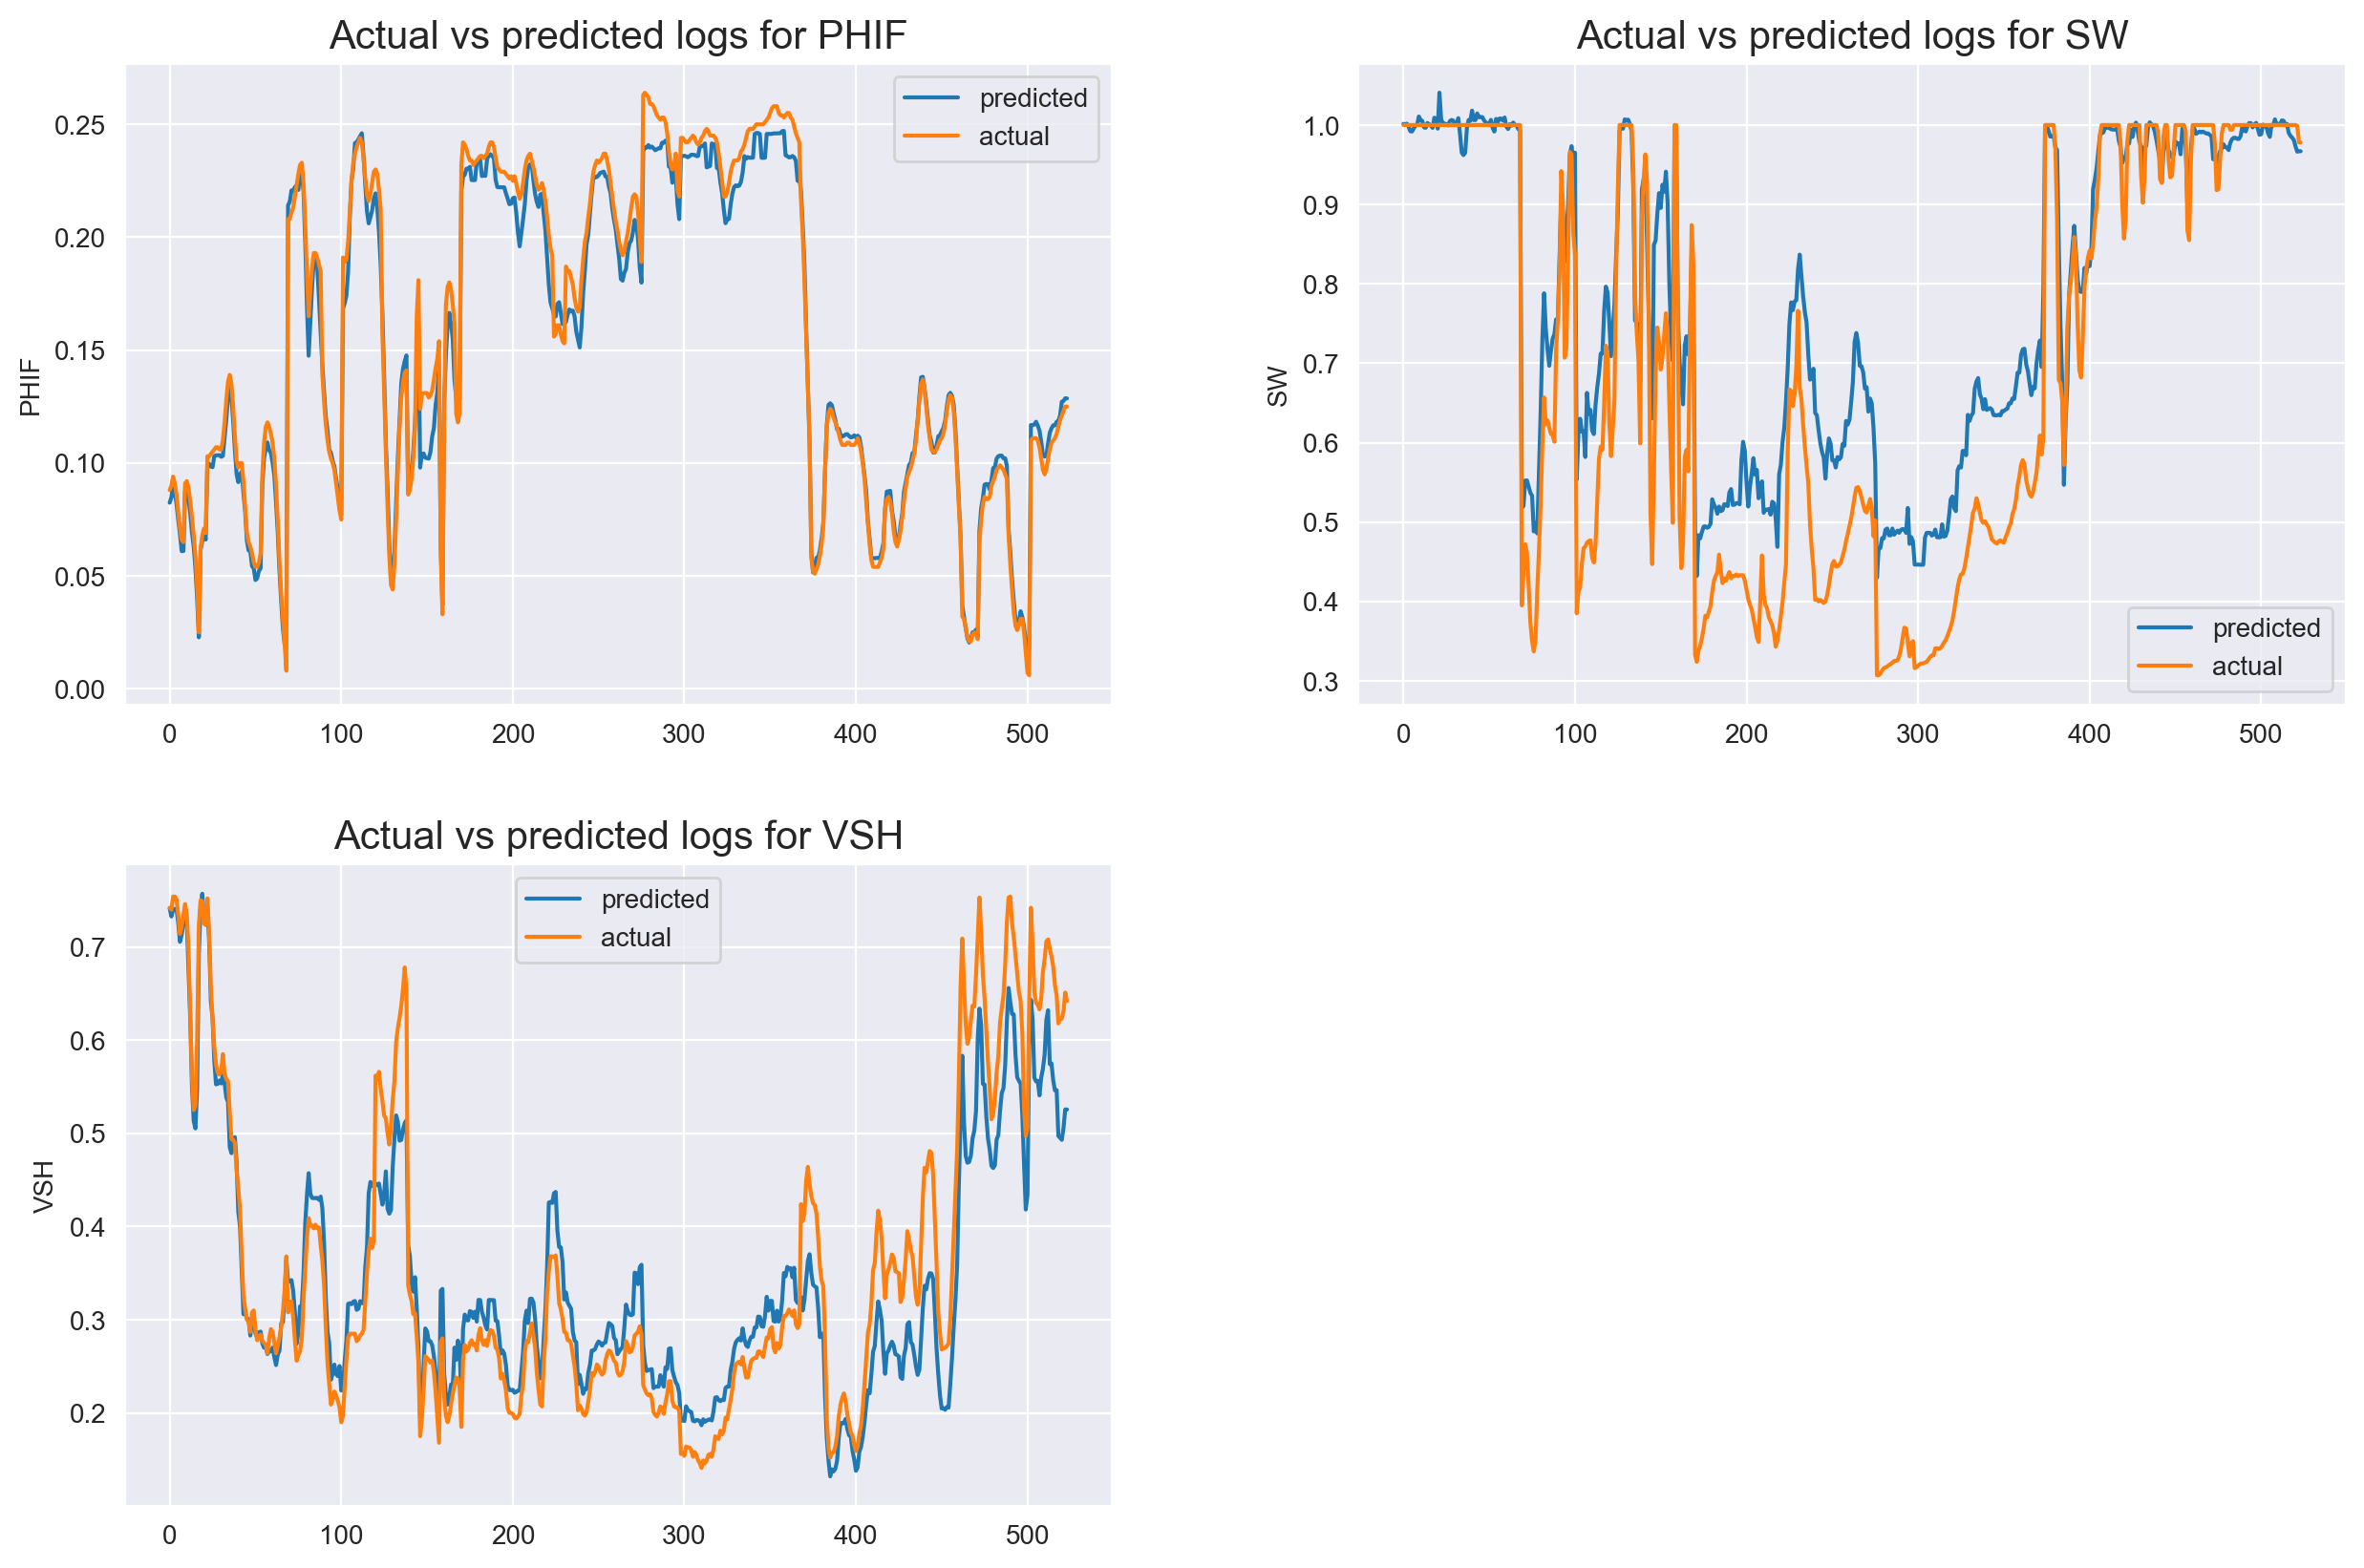

In [70]:
plot_predic_vs_actual(ypredict, TESTY)

## Prediction vs actual considering only important features as earlier highlighted  

In [71]:
train_ximp = TRAINX[['DEN','DTC','RDEP','GR','RMED']]   #training set with most important features 
test_ximp = TESTX[['DEN','DTC','RDEP','GR','RMED']]     #test set (well 5)
train_ximp.head(2)

DEN      DTC    RDEP       GR    RMED
129388  2.4776  86.3459  1.1378  75.9403  1.0959
129389  2.5042  86.1366  1.1241  75.6877  1.0691

In [72]:
scaler1 = StandardScaler()      #minimax scaler 
xscaled_imp_train = scaler1.fit_transform(train_ximp)
xscaled_imp_test = scaler1.transform(test_ximp)

In [73]:
catboot_imp = MultiOutputRegressor(CatBoostRegressor(learning_rate=0.1,    #catboot regression 
                                                       depth=2))
catboot_imp.fit(xscaled_imp_train, ytrain_subset)
pred_imp = catboot_imp.predict(xscaled_imp_test)

0:	learn: 0.0515342	total: 877us	remaining: 877ms
1:	learn: 0.0473422	total: 1.82ms	remaining: 908ms
2:	learn: 0.0435351	total: 2.67ms	remaining: 888ms
3:	learn: 0.0399648	total: 3.5ms	remaining: 870ms
4:	learn: 0.0367475	total: 4.33ms	remaining: 861ms
5:	learn: 0.0338885	total: 5.26ms	remaining: 872ms
6:	learn: 0.0313850	total: 6.32ms	remaining: 896ms
7:	learn: 0.0289833	total: 7.2ms	remaining: 892ms
8:	learn: 0.0270005	total: 8.07ms	remaining: 888ms
9:	learn: 0.0253854	total: 8.9ms	remaining: 881ms
10:	learn: 0.0234813	total: 9.7ms	remaining: 872ms
11:	learn: 0.0218944	total: 10.5ms	remaining: 865ms
12:	learn: 0.0203484	total: 11.3ms	remaining: 862ms
13:	learn: 0.0190384	total: 12.1ms	remaining: 854ms
14:	learn: 0.0177957	total: 13ms	remaining: 851ms
15:	learn: 0.0167240	total: 13.8ms	remaining: 851ms
16:	learn: 0.0156365	total: 14.6ms	remaining: 845ms
17:	learn: 0.0146811	total: 15.5ms	remaining: 844ms
18:	learn: 0.0137726	total: 16.4ms	remaining: 845ms
19:	learn: 0.0129750	total: 1

198:	learn: 0.0038794	total: 153ms	remaining: 615ms
199:	learn: 0.0038717	total: 154ms	remaining: 615ms
200:	learn: 0.0038689	total: 154ms	remaining: 614ms
201:	learn: 0.0038662	total: 155ms	remaining: 614ms
202:	learn: 0.0038620	total: 156ms	remaining: 613ms
203:	learn: 0.0038586	total: 157ms	remaining: 612ms
204:	learn: 0.0038528	total: 158ms	remaining: 611ms
205:	learn: 0.0038456	total: 158ms	remaining: 611ms
206:	learn: 0.0038394	total: 159ms	remaining: 610ms
207:	learn: 0.0038351	total: 160ms	remaining: 609ms
208:	learn: 0.0038285	total: 161ms	remaining: 608ms
209:	learn: 0.0038235	total: 161ms	remaining: 607ms
210:	learn: 0.0038222	total: 162ms	remaining: 606ms
211:	learn: 0.0038166	total: 163ms	remaining: 605ms
212:	learn: 0.0038126	total: 163ms	remaining: 604ms
213:	learn: 0.0038077	total: 164ms	remaining: 603ms
214:	learn: 0.0038069	total: 165ms	remaining: 602ms
215:	learn: 0.0038017	total: 166ms	remaining: 601ms
216:	learn: 0.0037971	total: 166ms	remaining: 600ms
217:	learn: 

411:	learn: 0.0033430	total: 318ms	remaining: 454ms
412:	learn: 0.0033421	total: 319ms	remaining: 453ms
413:	learn: 0.0033409	total: 320ms	remaining: 452ms
414:	learn: 0.0033390	total: 320ms	remaining: 452ms
415:	learn: 0.0033378	total: 321ms	remaining: 451ms
416:	learn: 0.0033370	total: 322ms	remaining: 450ms
417:	learn: 0.0033347	total: 323ms	remaining: 450ms
418:	learn: 0.0033324	total: 324ms	remaining: 449ms
419:	learn: 0.0033320	total: 325ms	remaining: 448ms
420:	learn: 0.0033290	total: 325ms	remaining: 448ms
421:	learn: 0.0033272	total: 326ms	remaining: 447ms
422:	learn: 0.0033264	total: 327ms	remaining: 446ms
423:	learn: 0.0033245	total: 328ms	remaining: 445ms
424:	learn: 0.0033233	total: 329ms	remaining: 445ms
425:	learn: 0.0033223	total: 330ms	remaining: 444ms
426:	learn: 0.0033215	total: 330ms	remaining: 443ms
427:	learn: 0.0033196	total: 331ms	remaining: 443ms
428:	learn: 0.0033179	total: 332ms	remaining: 442ms
429:	learn: 0.0033176	total: 333ms	remaining: 441ms
430:	learn: 

609:	learn: 0.0030865	total: 472ms	remaining: 302ms
610:	learn: 0.0030837	total: 472ms	remaining: 301ms
611:	learn: 0.0030821	total: 473ms	remaining: 300ms
612:	learn: 0.0030816	total: 474ms	remaining: 299ms
613:	learn: 0.0030800	total: 475ms	remaining: 299ms
614:	learn: 0.0030789	total: 476ms	remaining: 298ms
615:	learn: 0.0030780	total: 477ms	remaining: 297ms
616:	learn: 0.0030775	total: 477ms	remaining: 296ms
617:	learn: 0.0030769	total: 478ms	remaining: 296ms
618:	learn: 0.0030752	total: 479ms	remaining: 295ms
619:	learn: 0.0030736	total: 480ms	remaining: 294ms
620:	learn: 0.0030723	total: 480ms	remaining: 293ms
621:	learn: 0.0030711	total: 481ms	remaining: 292ms
622:	learn: 0.0030707	total: 482ms	remaining: 292ms
623:	learn: 0.0030702	total: 483ms	remaining: 291ms
624:	learn: 0.0030698	total: 484ms	remaining: 290ms
625:	learn: 0.0030686	total: 484ms	remaining: 289ms
626:	learn: 0.0030681	total: 485ms	remaining: 289ms
627:	learn: 0.0030667	total: 486ms	remaining: 288ms
628:	learn: 

804:	learn: 0.0028857	total: 624ms	remaining: 151ms
805:	learn: 0.0028852	total: 625ms	remaining: 150ms
806:	learn: 0.0028850	total: 626ms	remaining: 150ms
807:	learn: 0.0028848	total: 627ms	remaining: 149ms
808:	learn: 0.0028836	total: 628ms	remaining: 148ms
809:	learn: 0.0028833	total: 628ms	remaining: 147ms
810:	learn: 0.0028822	total: 629ms	remaining: 147ms
811:	learn: 0.0028818	total: 630ms	remaining: 146ms
812:	learn: 0.0028812	total: 631ms	remaining: 145ms
813:	learn: 0.0028798	total: 632ms	remaining: 144ms
814:	learn: 0.0028794	total: 633ms	remaining: 144ms
815:	learn: 0.0028788	total: 633ms	remaining: 143ms
816:	learn: 0.0028786	total: 634ms	remaining: 142ms
817:	learn: 0.0028781	total: 635ms	remaining: 141ms
818:	learn: 0.0028773	total: 636ms	remaining: 141ms
819:	learn: 0.0028771	total: 637ms	remaining: 140ms
820:	learn: 0.0028768	total: 638ms	remaining: 139ms
821:	learn: 0.0028760	total: 639ms	remaining: 138ms
822:	learn: 0.0028739	total: 640ms	remaining: 138ms
823:	learn: 

992:	learn: 0.0027408	total: 777ms	remaining: 5.47ms
993:	learn: 0.0027397	total: 778ms	remaining: 4.69ms
994:	learn: 0.0027392	total: 778ms	remaining: 3.91ms
995:	learn: 0.0027387	total: 779ms	remaining: 3.13ms
996:	learn: 0.0027386	total: 780ms	remaining: 2.35ms
997:	learn: 0.0027380	total: 781ms	remaining: 1.56ms
998:	learn: 0.0027377	total: 782ms	remaining: 782us
999:	learn: 0.0027375	total: 783ms	remaining: 0us
0:	learn: 0.1471428	total: 860us	remaining: 859ms
1:	learn: 0.1421297	total: 1.68ms	remaining: 840ms
2:	learn: 0.1312191	total: 2.5ms	remaining: 832ms
3:	learn: 0.1275046	total: 3.32ms	remaining: 826ms
4:	learn: 0.1180560	total: 4.11ms	remaining: 818ms
5:	learn: 0.1098982	total: 4.9ms	remaining: 812ms
6:	learn: 0.1065831	total: 5.66ms	remaining: 804ms
7:	learn: 0.1035485	total: 6.44ms	remaining: 799ms
8:	learn: 0.0991435	total: 7.3ms	remaining: 804ms
9:	learn: 0.0930771	total: 8.21ms	remaining: 813ms
10:	learn: 0.0885949	total: 9.03ms	remaining: 812ms
11:	learn: 0.0840142	t

316:	learn: 0.0238518	total: 256ms	remaining: 551ms
317:	learn: 0.0238290	total: 257ms	remaining: 550ms
318:	learn: 0.0237987	total: 257ms	remaining: 549ms
319:	learn: 0.0237818	total: 258ms	remaining: 549ms
320:	learn: 0.0237549	total: 259ms	remaining: 548ms
321:	learn: 0.0237482	total: 260ms	remaining: 547ms
322:	learn: 0.0237257	total: 261ms	remaining: 547ms
323:	learn: 0.0237038	total: 262ms	remaining: 546ms
324:	learn: 0.0236749	total: 263ms	remaining: 545ms
325:	learn: 0.0236453	total: 263ms	remaining: 545ms
326:	learn: 0.0236273	total: 264ms	remaining: 544ms
327:	learn: 0.0236161	total: 265ms	remaining: 543ms
328:	learn: 0.0235858	total: 266ms	remaining: 543ms
329:	learn: 0.0235668	total: 267ms	remaining: 542ms
330:	learn: 0.0235424	total: 268ms	remaining: 542ms
331:	learn: 0.0235282	total: 269ms	remaining: 541ms
332:	learn: 0.0235053	total: 270ms	remaining: 541ms
333:	learn: 0.0234957	total: 271ms	remaining: 540ms
334:	learn: 0.0234728	total: 271ms	remaining: 539ms
335:	learn: 

494:	learn: 0.0207491	total: 409ms	remaining: 417ms
495:	learn: 0.0207312	total: 410ms	remaining: 416ms
496:	learn: 0.0206947	total: 411ms	remaining: 416ms
497:	learn: 0.0206809	total: 412ms	remaining: 415ms
498:	learn: 0.0206757	total: 412ms	remaining: 414ms
499:	learn: 0.0206600	total: 413ms	remaining: 413ms
500:	learn: 0.0206501	total: 414ms	remaining: 413ms
501:	learn: 0.0206334	total: 415ms	remaining: 412ms
502:	learn: 0.0206179	total: 416ms	remaining: 411ms
503:	learn: 0.0206058	total: 417ms	remaining: 410ms
504:	learn: 0.0205789	total: 418ms	remaining: 409ms
505:	learn: 0.0205724	total: 418ms	remaining: 409ms
506:	learn: 0.0205606	total: 419ms	remaining: 408ms
507:	learn: 0.0205371	total: 420ms	remaining: 407ms
508:	learn: 0.0205235	total: 421ms	remaining: 406ms
509:	learn: 0.0205165	total: 422ms	remaining: 405ms
510:	learn: 0.0205041	total: 422ms	remaining: 404ms
511:	learn: 0.0204929	total: 423ms	remaining: 403ms
512:	learn: 0.0204694	total: 424ms	remaining: 402ms
513:	learn: 

682:	learn: 0.0186088	total: 562ms	remaining: 261ms
683:	learn: 0.0185975	total: 563ms	remaining: 260ms
684:	learn: 0.0185894	total: 563ms	remaining: 259ms
685:	learn: 0.0185805	total: 564ms	remaining: 258ms
686:	learn: 0.0185693	total: 565ms	remaining: 258ms
687:	learn: 0.0185596	total: 566ms	remaining: 257ms
688:	learn: 0.0185502	total: 567ms	remaining: 256ms
689:	learn: 0.0185380	total: 568ms	remaining: 255ms
690:	learn: 0.0185240	total: 569ms	remaining: 254ms
691:	learn: 0.0185158	total: 569ms	remaining: 253ms
692:	learn: 0.0185042	total: 570ms	remaining: 253ms
693:	learn: 0.0184912	total: 571ms	remaining: 252ms
694:	learn: 0.0184802	total: 572ms	remaining: 251ms
695:	learn: 0.0184681	total: 573ms	remaining: 250ms
696:	learn: 0.0184575	total: 573ms	remaining: 249ms
697:	learn: 0.0184468	total: 574ms	remaining: 248ms
698:	learn: 0.0184350	total: 575ms	remaining: 248ms
699:	learn: 0.0184256	total: 576ms	remaining: 247ms
700:	learn: 0.0184152	total: 577ms	remaining: 246ms
701:	learn: 

868:	learn: 0.0170935	total: 714ms	remaining: 108ms
869:	learn: 0.0170859	total: 715ms	remaining: 107ms
870:	learn: 0.0170786	total: 716ms	remaining: 106ms
871:	learn: 0.0170721	total: 717ms	remaining: 105ms
872:	learn: 0.0170657	total: 718ms	remaining: 104ms
873:	learn: 0.0170582	total: 719ms	remaining: 104ms
874:	learn: 0.0170530	total: 719ms	remaining: 103ms
875:	learn: 0.0170478	total: 720ms	remaining: 102ms
876:	learn: 0.0170391	total: 721ms	remaining: 101ms
877:	learn: 0.0170346	total: 722ms	remaining: 100ms
878:	learn: 0.0170327	total: 723ms	remaining: 99.5ms
879:	learn: 0.0170255	total: 724ms	remaining: 98.7ms
880:	learn: 0.0170191	total: 724ms	remaining: 97.8ms
881:	learn: 0.0170145	total: 725ms	remaining: 97ms
882:	learn: 0.0170095	total: 726ms	remaining: 96.2ms
883:	learn: 0.0170038	total: 727ms	remaining: 95.4ms
884:	learn: 0.0169954	total: 728ms	remaining: 94.6ms
885:	learn: 0.0169844	total: 729ms	remaining: 93.8ms
886:	learn: 0.0169816	total: 730ms	remaining: 93ms
887:	le

196:	learn: 0.0298960	total: 163ms	remaining: 664ms
197:	learn: 0.0298800	total: 164ms	remaining: 664ms
198:	learn: 0.0298769	total: 165ms	remaining: 663ms
199:	learn: 0.0298595	total: 166ms	remaining: 662ms
200:	learn: 0.0298348	total: 166ms	remaining: 661ms
201:	learn: 0.0298238	total: 167ms	remaining: 660ms
202:	learn: 0.0298110	total: 168ms	remaining: 659ms
203:	learn: 0.0297883	total: 169ms	remaining: 658ms
204:	learn: 0.0297565	total: 169ms	remaining: 657ms
205:	learn: 0.0297424	total: 170ms	remaining: 656ms
206:	learn: 0.0296997	total: 171ms	remaining: 655ms
207:	learn: 0.0296750	total: 172ms	remaining: 654ms
208:	learn: 0.0296633	total: 173ms	remaining: 654ms
209:	learn: 0.0296446	total: 173ms	remaining: 653ms
210:	learn: 0.0296205	total: 174ms	remaining: 652ms
211:	learn: 0.0295994	total: 175ms	remaining: 652ms
212:	learn: 0.0295918	total: 176ms	remaining: 651ms
213:	learn: 0.0295547	total: 177ms	remaining: 651ms
214:	learn: 0.0295504	total: 178ms	remaining: 651ms
215:	learn: 

375:	learn: 0.0265712	total: 314ms	remaining: 521ms
376:	learn: 0.0265598	total: 315ms	remaining: 521ms
377:	learn: 0.0265472	total: 316ms	remaining: 520ms
378:	learn: 0.0265388	total: 317ms	remaining: 519ms
379:	learn: 0.0265180	total: 318ms	remaining: 519ms
380:	learn: 0.0265082	total: 319ms	remaining: 518ms
381:	learn: 0.0264946	total: 320ms	remaining: 517ms
382:	learn: 0.0264758	total: 320ms	remaining: 516ms
383:	learn: 0.0264607	total: 321ms	remaining: 515ms
384:	learn: 0.0264145	total: 322ms	remaining: 515ms
385:	learn: 0.0264077	total: 323ms	remaining: 514ms
386:	learn: 0.0263845	total: 324ms	remaining: 513ms
387:	learn: 0.0263634	total: 325ms	remaining: 512ms
388:	learn: 0.0263441	total: 325ms	remaining: 511ms
389:	learn: 0.0263338	total: 326ms	remaining: 510ms
390:	learn: 0.0263175	total: 327ms	remaining: 509ms
391:	learn: 0.0262951	total: 328ms	remaining: 508ms
392:	learn: 0.0262861	total: 329ms	remaining: 508ms
393:	learn: 0.0262794	total: 329ms	remaining: 507ms
394:	learn: 

559:	learn: 0.0243938	total: 468ms	remaining: 367ms
560:	learn: 0.0243827	total: 469ms	remaining: 367ms
561:	learn: 0.0243682	total: 470ms	remaining: 366ms
562:	learn: 0.0243604	total: 471ms	remaining: 365ms
563:	learn: 0.0243510	total: 472ms	remaining: 365ms
564:	learn: 0.0243443	total: 473ms	remaining: 364ms
565:	learn: 0.0243426	total: 474ms	remaining: 363ms
566:	learn: 0.0243273	total: 475ms	remaining: 362ms
567:	learn: 0.0243206	total: 476ms	remaining: 362ms
568:	learn: 0.0243153	total: 477ms	remaining: 361ms
569:	learn: 0.0243057	total: 478ms	remaining: 360ms
570:	learn: 0.0242853	total: 479ms	remaining: 360ms
571:	learn: 0.0242835	total: 480ms	remaining: 359ms
572:	learn: 0.0242709	total: 481ms	remaining: 358ms
573:	learn: 0.0242626	total: 481ms	remaining: 357ms
574:	learn: 0.0242528	total: 482ms	remaining: 357ms
575:	learn: 0.0242453	total: 483ms	remaining: 356ms
576:	learn: 0.0242384	total: 484ms	remaining: 355ms
577:	learn: 0.0242298	total: 485ms	remaining: 354ms
578:	learn: 

739:	learn: 0.0229276	total: 618ms	remaining: 217ms
740:	learn: 0.0229207	total: 619ms	remaining: 216ms
741:	learn: 0.0229135	total: 619ms	remaining: 215ms
742:	learn: 0.0228993	total: 620ms	remaining: 215ms
743:	learn: 0.0228952	total: 621ms	remaining: 214ms
744:	learn: 0.0228899	total: 622ms	remaining: 213ms
745:	learn: 0.0228818	total: 623ms	remaining: 212ms
746:	learn: 0.0228752	total: 624ms	remaining: 211ms
747:	learn: 0.0228692	total: 624ms	remaining: 210ms
748:	learn: 0.0228650	total: 625ms	remaining: 210ms
749:	learn: 0.0228629	total: 626ms	remaining: 209ms
750:	learn: 0.0228576	total: 627ms	remaining: 208ms
751:	learn: 0.0228542	total: 627ms	remaining: 207ms
752:	learn: 0.0228461	total: 628ms	remaining: 206ms
753:	learn: 0.0228398	total: 629ms	remaining: 205ms
754:	learn: 0.0228353	total: 630ms	remaining: 204ms
755:	learn: 0.0228280	total: 631ms	remaining: 204ms
756:	learn: 0.0228218	total: 631ms	remaining: 203ms
757:	learn: 0.0228193	total: 632ms	remaining: 202ms
758:	learn: 

933:	learn: 0.0217259	total: 773ms	remaining: 54.6ms
934:	learn: 0.0217216	total: 774ms	remaining: 53.8ms
935:	learn: 0.0217159	total: 774ms	remaining: 53ms
936:	learn: 0.0217110	total: 775ms	remaining: 52.1ms
937:	learn: 0.0217027	total: 776ms	remaining: 51.3ms
938:	learn: 0.0217007	total: 777ms	remaining: 50.5ms
939:	learn: 0.0216960	total: 778ms	remaining: 49.7ms
940:	learn: 0.0216891	total: 779ms	remaining: 48.8ms
941:	learn: 0.0216844	total: 780ms	remaining: 48ms
942:	learn: 0.0216788	total: 780ms	remaining: 47.2ms
943:	learn: 0.0216764	total: 781ms	remaining: 46.3ms
944:	learn: 0.0216686	total: 782ms	remaining: 45.5ms
945:	learn: 0.0216649	total: 783ms	remaining: 44.7ms
946:	learn: 0.0216630	total: 784ms	remaining: 43.9ms
947:	learn: 0.0216575	total: 784ms	remaining: 43ms
948:	learn: 0.0216513	total: 785ms	remaining: 42.2ms
949:	learn: 0.0216477	total: 786ms	remaining: 41.4ms
950:	learn: 0.0216399	total: 787ms	remaining: 40.5ms
951:	learn: 0.0216356	total: 787ms	remaining: 39.7ms

In [74]:
Pred1 = pd.DataFrame(pred_imp,columns=['PHIF','SW','VSH'])
Pred1.head()

PHIF        SW       VSH
0  0.084529  1.008555  0.745068
1  0.091193  1.008507  0.741563
2  0.095434  1.000295  0.695738
3  0.091937  0.997702  0.700782
4  0.085542  0.998333  0.685245

In [75]:
score_PHIF = np.sqrt(mean_squared_error(Pred1.PHIF, TESTY.PHIF))
score_PHIF

0.008726308321032307

In [76]:
score_SW = np.sqrt(mean_squared_error(Pred1.SW, TESTY.SW))
score_SW

0.048488682722905116

In [77]:
score_VSH = np.sqrt(mean_squared_error(Pred1.VSH, TESTY.VSH))
score_VSH

0.07617498142053913

In [78]:
from sklearn.metrics import mean_squared_error
score_imp = np.sqrt(mean_squared_error(TESTY, Pred1))
score_imp

0.05237661247648533

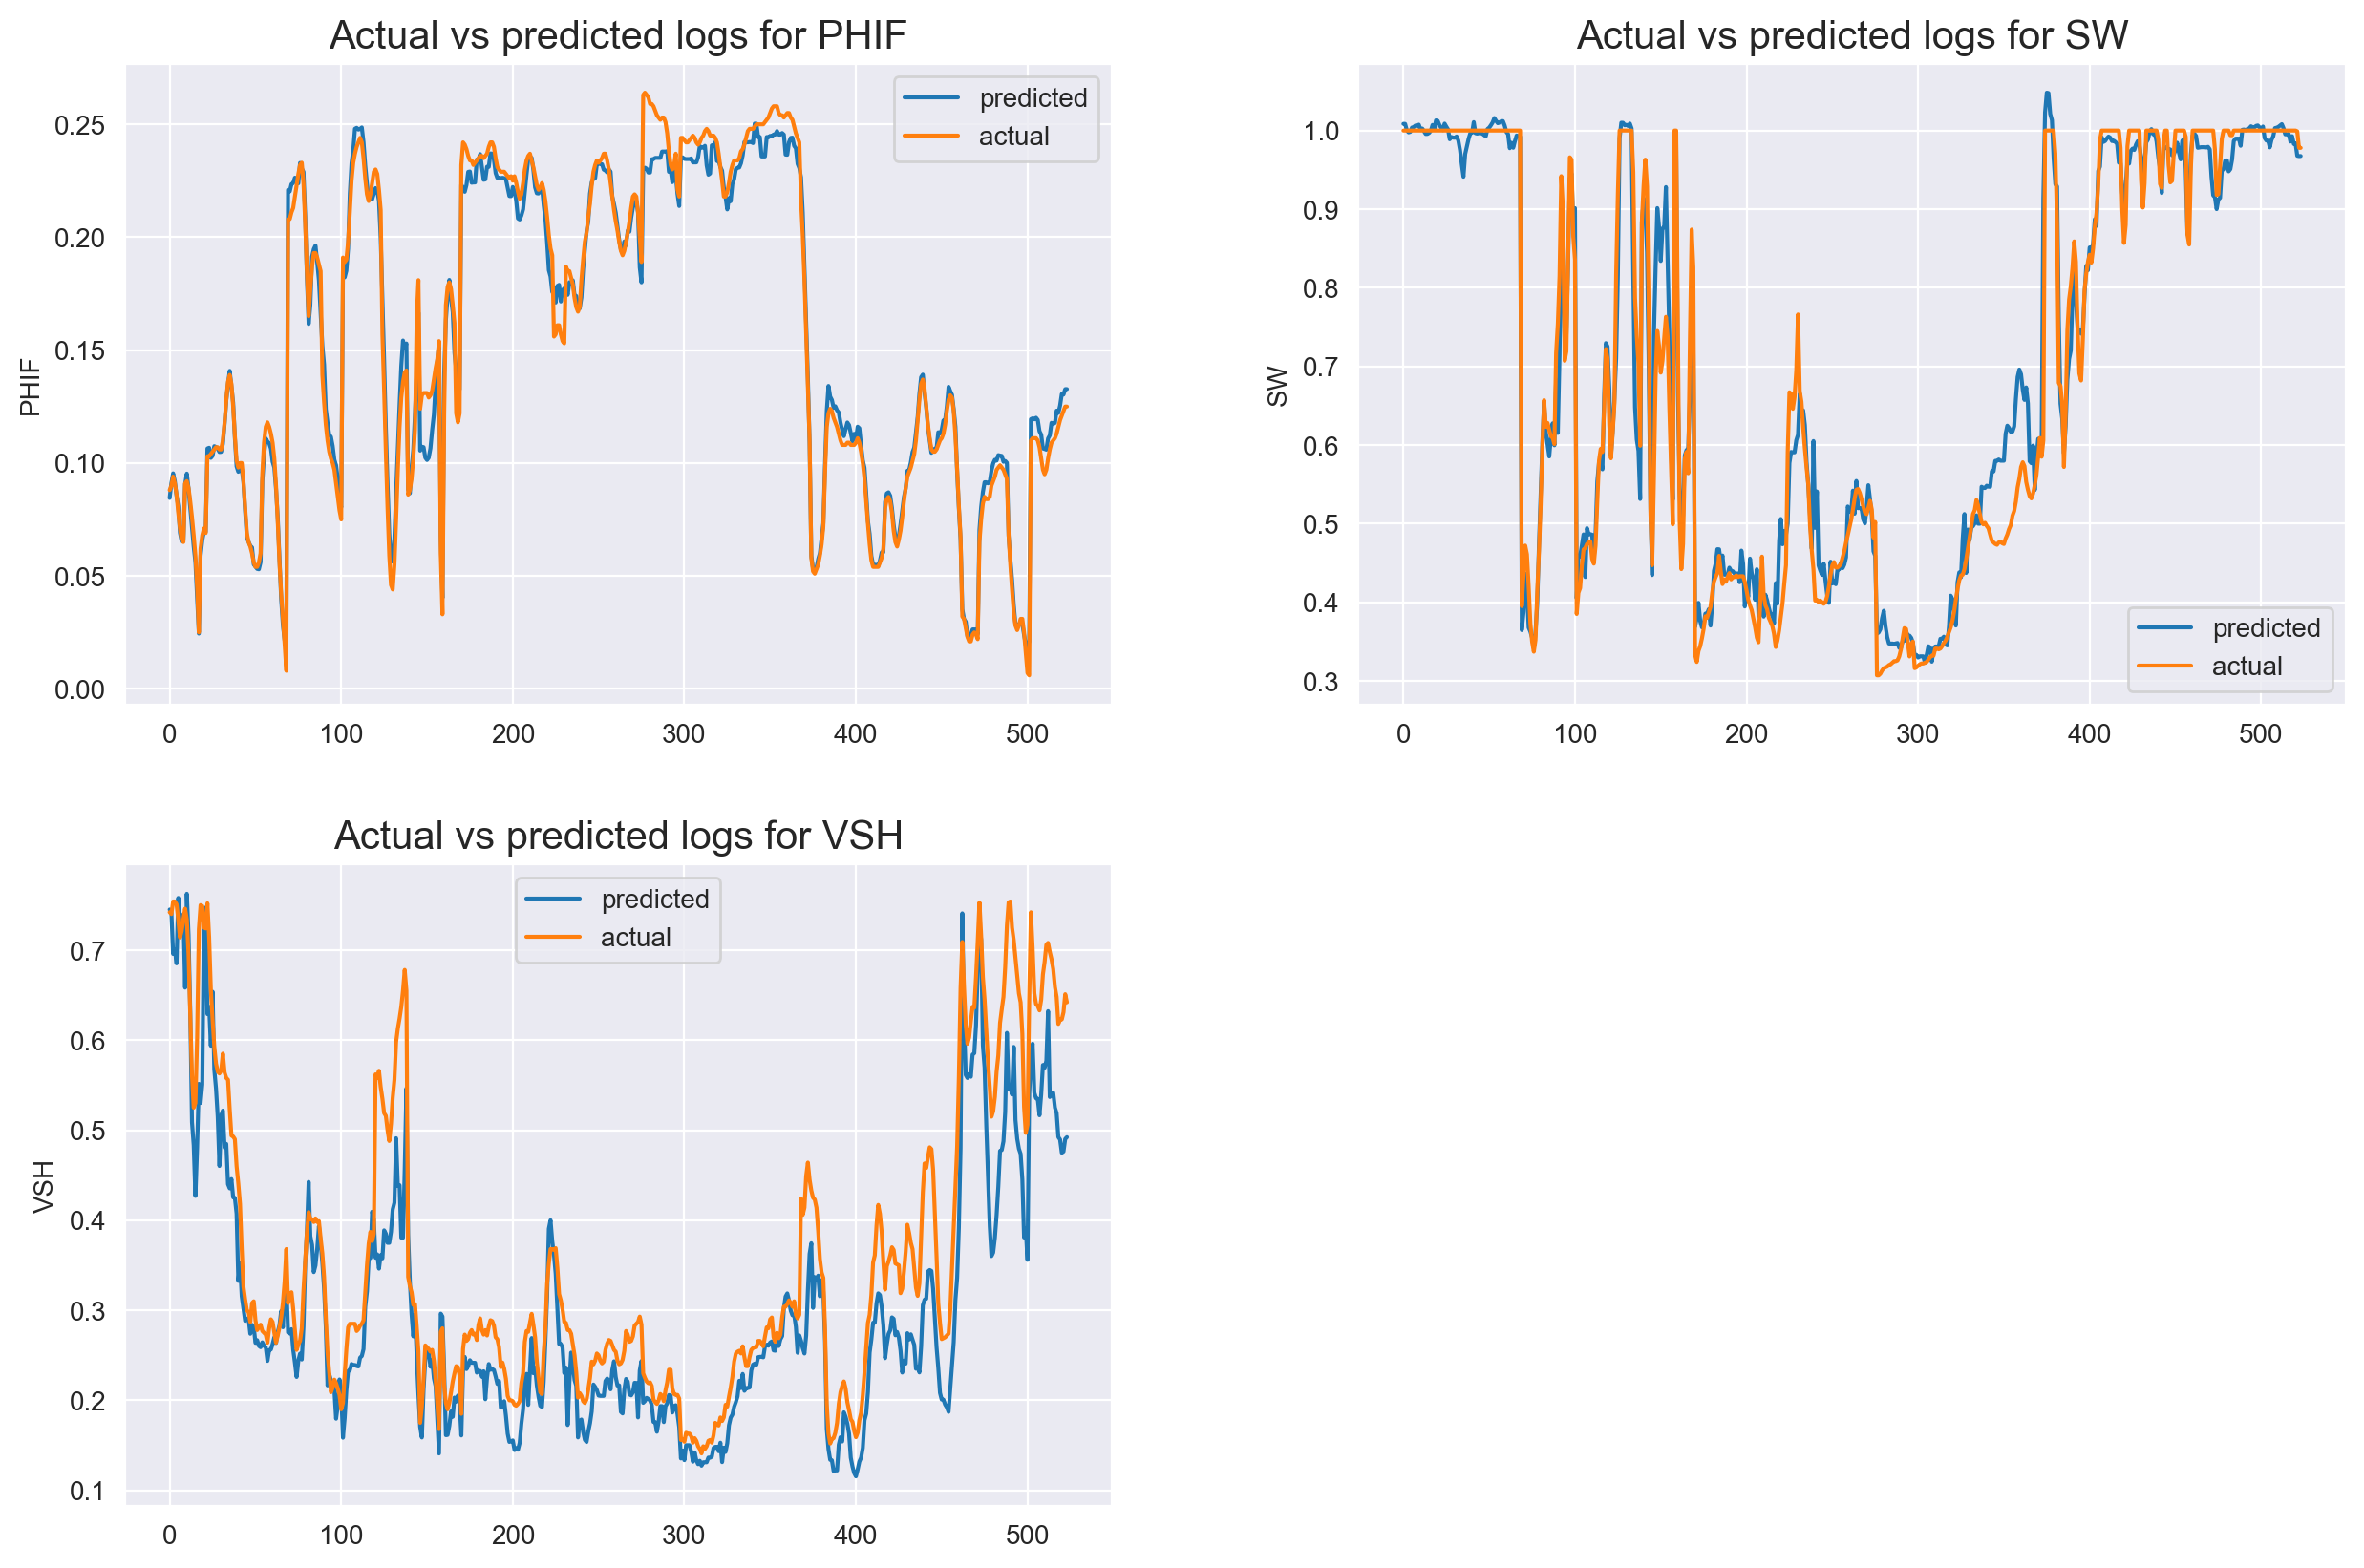

In [79]:
plot_predic_vs_actual(Pred1, TESTY)

## Prediction vs actual considering all logs with dimentionality reduction using PCA  

In [80]:
pca_6components = PCA(6)
pca_6components .fit(xtrain_subset)

PCA(n_components=6)

In [81]:
PCA_features = pd.DataFrame((pca_6components.transform(xtrain_subset)), columns= ['X1','X2','X3','X4','X5','X6'])
PCA_features.head()

X1        X2        X3        X4        X5        X6
0 -0.295738 -4.456052 -1.552118 -1.269523  1.153729  0.020605
1  0.272861 -4.123404 -0.353785 -1.399258 -0.137497 -0.600854
2  0.492147 -3.757277  0.363788 -1.343605 -1.429631 -0.080767
3  0.509446 -3.524911  0.610572 -1.314879 -1.853906  0.095802
4  0.391694 -3.447622  0.319101 -1.273136 -1.267649 -0.104141

In [82]:
catboot_PCA = MultiOutputRegressor(CatBoostRegressor(learning_rate=0.1,    #catboot regression 
                                                       depth=2))
catboot_PCA.fit(PCA_features, ytrain_subset)
pred_PCA_Catboot = catboot_PCA.predict(pca_6components.transform(xtest_subset))

0:	learn: 0.0527786	total: 940us	remaining: 940ms
1:	learn: 0.0497487	total: 1.86ms	remaining: 931ms
2:	learn: 0.0470882	total: 2.64ms	remaining: 877ms
3:	learn: 0.0444678	total: 3.38ms	remaining: 842ms
4:	learn: 0.0422395	total: 4.21ms	remaining: 838ms
5:	learn: 0.0402417	total: 5.06ms	remaining: 838ms
6:	learn: 0.0384285	total: 5.91ms	remaining: 839ms
7:	learn: 0.0367697	total: 6.76ms	remaining: 838ms
8:	learn: 0.0353928	total: 7.63ms	remaining: 840ms
9:	learn: 0.0340753	total: 8.35ms	remaining: 826ms
10:	learn: 0.0331093	total: 9.16ms	remaining: 824ms
11:	learn: 0.0320247	total: 10ms	remaining: 825ms
12:	learn: 0.0310658	total: 10.9ms	remaining: 824ms
13:	learn: 0.0301103	total: 11.8ms	remaining: 831ms
14:	learn: 0.0293754	total: 12.7ms	remaining: 831ms
15:	learn: 0.0285523	total: 13.6ms	remaining: 834ms
16:	learn: 0.0277842	total: 14.5ms	remaining: 841ms
17:	learn: 0.0271293	total: 15.5ms	remaining: 845ms
18:	learn: 0.0266188	total: 16.5ms	remaining: 851ms
19:	learn: 0.0260195	tota

170:	learn: 0.0122163	total: 148ms	remaining: 717ms
171:	learn: 0.0121800	total: 149ms	remaining: 716ms
172:	learn: 0.0121710	total: 150ms	remaining: 715ms
173:	learn: 0.0121588	total: 150ms	remaining: 714ms
174:	learn: 0.0121517	total: 151ms	remaining: 713ms
175:	learn: 0.0121417	total: 152ms	remaining: 712ms
176:	learn: 0.0121352	total: 153ms	remaining: 711ms
177:	learn: 0.0121245	total: 154ms	remaining: 710ms
178:	learn: 0.0121142	total: 154ms	remaining: 708ms
179:	learn: 0.0121047	total: 155ms	remaining: 707ms
180:	learn: 0.0120986	total: 156ms	remaining: 705ms
181:	learn: 0.0120878	total: 157ms	remaining: 704ms
182:	learn: 0.0120794	total: 157ms	remaining: 703ms
183:	learn: 0.0120730	total: 158ms	remaining: 701ms
184:	learn: 0.0120593	total: 159ms	remaining: 700ms
185:	learn: 0.0120533	total: 160ms	remaining: 699ms
186:	learn: 0.0120436	total: 160ms	remaining: 697ms
187:	learn: 0.0120108	total: 161ms	remaining: 696ms
188:	learn: 0.0120057	total: 162ms	remaining: 694ms
189:	learn: 

353:	learn: 0.0107098	total: 292ms	remaining: 534ms
354:	learn: 0.0106995	total: 293ms	remaining: 533ms
355:	learn: 0.0106912	total: 294ms	remaining: 532ms
356:	learn: 0.0106887	total: 295ms	remaining: 531ms
357:	learn: 0.0106814	total: 296ms	remaining: 530ms
358:	learn: 0.0106736	total: 297ms	remaining: 529ms
359:	learn: 0.0106683	total: 297ms	remaining: 529ms
360:	learn: 0.0106628	total: 298ms	remaining: 527ms
361:	learn: 0.0106547	total: 299ms	remaining: 527ms
362:	learn: 0.0106505	total: 300ms	remaining: 526ms
363:	learn: 0.0106458	total: 300ms	remaining: 525ms
364:	learn: 0.0106421	total: 301ms	remaining: 524ms
365:	learn: 0.0106384	total: 302ms	remaining: 523ms
366:	learn: 0.0106338	total: 303ms	remaining: 522ms
367:	learn: 0.0106281	total: 303ms	remaining: 521ms
368:	learn: 0.0106204	total: 304ms	remaining: 521ms
369:	learn: 0.0106162	total: 305ms	remaining: 520ms
370:	learn: 0.0106131	total: 306ms	remaining: 519ms
371:	learn: 0.0106088	total: 307ms	remaining: 518ms
372:	learn: 

546:	learn: 0.0099391	total: 445ms	remaining: 369ms
547:	learn: 0.0099381	total: 446ms	remaining: 368ms
548:	learn: 0.0099352	total: 447ms	remaining: 367ms
549:	learn: 0.0099314	total: 448ms	remaining: 366ms
550:	learn: 0.0099288	total: 448ms	remaining: 365ms
551:	learn: 0.0099240	total: 449ms	remaining: 365ms
552:	learn: 0.0099201	total: 450ms	remaining: 364ms
553:	learn: 0.0099140	total: 451ms	remaining: 363ms
554:	learn: 0.0099126	total: 452ms	remaining: 362ms
555:	learn: 0.0099092	total: 452ms	remaining: 361ms
556:	learn: 0.0099055	total: 453ms	remaining: 360ms
557:	learn: 0.0099029	total: 454ms	remaining: 360ms
558:	learn: 0.0098975	total: 455ms	remaining: 359ms
559:	learn: 0.0098948	total: 456ms	remaining: 358ms
560:	learn: 0.0098909	total: 456ms	remaining: 357ms
561:	learn: 0.0098822	total: 457ms	remaining: 356ms
562:	learn: 0.0098786	total: 458ms	remaining: 356ms
563:	learn: 0.0098761	total: 459ms	remaining: 355ms
564:	learn: 0.0098751	total: 460ms	remaining: 354ms
565:	learn: 

748:	learn: 0.0093916	total: 606ms	remaining: 203ms
749:	learn: 0.0093892	total: 607ms	remaining: 202ms
750:	learn: 0.0093882	total: 607ms	remaining: 201ms
751:	learn: 0.0093858	total: 608ms	remaining: 201ms
752:	learn: 0.0093836	total: 609ms	remaining: 200ms
753:	learn: 0.0093801	total: 610ms	remaining: 199ms
754:	learn: 0.0093767	total: 610ms	remaining: 198ms
755:	learn: 0.0093735	total: 611ms	remaining: 197ms
756:	learn: 0.0093724	total: 612ms	remaining: 196ms
757:	learn: 0.0093706	total: 613ms	remaining: 196ms
758:	learn: 0.0093678	total: 614ms	remaining: 195ms
759:	learn: 0.0093664	total: 614ms	remaining: 194ms
760:	learn: 0.0093607	total: 615ms	remaining: 193ms
761:	learn: 0.0093582	total: 616ms	remaining: 192ms
762:	learn: 0.0093526	total: 617ms	remaining: 192ms
763:	learn: 0.0093518	total: 618ms	remaining: 191ms
764:	learn: 0.0093506	total: 618ms	remaining: 190ms
765:	learn: 0.0093482	total: 619ms	remaining: 189ms
766:	learn: 0.0093471	total: 620ms	remaining: 188ms
767:	learn: 

939:	learn: 0.0090106	total: 758ms	remaining: 48.4ms
940:	learn: 0.0090095	total: 758ms	remaining: 47.6ms
941:	learn: 0.0090088	total: 759ms	remaining: 46.7ms
942:	learn: 0.0090065	total: 760ms	remaining: 45.9ms
943:	learn: 0.0090048	total: 761ms	remaining: 45.1ms
944:	learn: 0.0090038	total: 762ms	remaining: 44.3ms
945:	learn: 0.0090027	total: 762ms	remaining: 43.5ms
946:	learn: 0.0090007	total: 763ms	remaining: 42.7ms
947:	learn: 0.0089998	total: 764ms	remaining: 41.9ms
948:	learn: 0.0089982	total: 765ms	remaining: 41.1ms
949:	learn: 0.0089966	total: 765ms	remaining: 40.3ms
950:	learn: 0.0089956	total: 766ms	remaining: 39.5ms
951:	learn: 0.0089944	total: 767ms	remaining: 38.7ms
952:	learn: 0.0089918	total: 768ms	remaining: 37.9ms
953:	learn: 0.0089891	total: 769ms	remaining: 37.1ms
954:	learn: 0.0089866	total: 770ms	remaining: 36.3ms
955:	learn: 0.0089842	total: 771ms	remaining: 35.5ms
956:	learn: 0.0089820	total: 772ms	remaining: 34.7ms
957:	learn: 0.0089800	total: 773ms	remaining: 

249:	learn: 0.0445985	total: 195ms	remaining: 586ms
250:	learn: 0.0445710	total: 196ms	remaining: 586ms
251:	learn: 0.0445524	total: 197ms	remaining: 585ms
252:	learn: 0.0445339	total: 198ms	remaining: 584ms
253:	learn: 0.0444788	total: 199ms	remaining: 583ms
254:	learn: 0.0444270	total: 199ms	remaining: 582ms
255:	learn: 0.0443639	total: 200ms	remaining: 581ms
256:	learn: 0.0443274	total: 201ms	remaining: 581ms
257:	learn: 0.0442941	total: 202ms	remaining: 580ms
258:	learn: 0.0442733	total: 202ms	remaining: 579ms
259:	learn: 0.0442151	total: 203ms	remaining: 578ms
260:	learn: 0.0441664	total: 204ms	remaining: 577ms
261:	learn: 0.0441353	total: 204ms	remaining: 576ms
262:	learn: 0.0441223	total: 205ms	remaining: 575ms
263:	learn: 0.0440706	total: 206ms	remaining: 574ms
264:	learn: 0.0440266	total: 207ms	remaining: 573ms
265:	learn: 0.0439942	total: 208ms	remaining: 573ms
266:	learn: 0.0439764	total: 208ms	remaining: 572ms
267:	learn: 0.0439281	total: 209ms	remaining: 571ms
268:	learn: 

446:	learn: 0.0380331	total: 353ms	remaining: 437ms
447:	learn: 0.0380205	total: 354ms	remaining: 437ms
448:	learn: 0.0380119	total: 355ms	remaining: 436ms
449:	learn: 0.0379574	total: 356ms	remaining: 435ms
450:	learn: 0.0379360	total: 357ms	remaining: 435ms
451:	learn: 0.0379152	total: 358ms	remaining: 434ms
452:	learn: 0.0378941	total: 359ms	remaining: 434ms
453:	learn: 0.0378858	total: 360ms	remaining: 433ms
454:	learn: 0.0378722	total: 361ms	remaining: 432ms
455:	learn: 0.0378654	total: 362ms	remaining: 432ms
456:	learn: 0.0378488	total: 363ms	remaining: 431ms
457:	learn: 0.0378269	total: 363ms	remaining: 430ms
458:	learn: 0.0377897	total: 364ms	remaining: 429ms
459:	learn: 0.0377787	total: 365ms	remaining: 429ms
460:	learn: 0.0377672	total: 366ms	remaining: 428ms
461:	learn: 0.0377554	total: 367ms	remaining: 427ms
462:	learn: 0.0377195	total: 368ms	remaining: 427ms
463:	learn: 0.0377031	total: 369ms	remaining: 426ms
464:	learn: 0.0376719	total: 369ms	remaining: 425ms
465:	learn: 

628:	learn: 0.0349351	total: 506ms	remaining: 298ms
629:	learn: 0.0349207	total: 507ms	remaining: 298ms
630:	learn: 0.0349131	total: 508ms	remaining: 297ms
631:	learn: 0.0348771	total: 509ms	remaining: 296ms
632:	learn: 0.0348616	total: 510ms	remaining: 295ms
633:	learn: 0.0348440	total: 510ms	remaining: 295ms
634:	learn: 0.0348083	total: 511ms	remaining: 294ms
635:	learn: 0.0347845	total: 512ms	remaining: 293ms
636:	learn: 0.0347811	total: 513ms	remaining: 292ms
637:	learn: 0.0347620	total: 514ms	remaining: 292ms
638:	learn: 0.0347565	total: 515ms	remaining: 291ms
639:	learn: 0.0347476	total: 516ms	remaining: 290ms
640:	learn: 0.0347350	total: 516ms	remaining: 289ms
641:	learn: 0.0347189	total: 517ms	remaining: 288ms
642:	learn: 0.0347111	total: 518ms	remaining: 288ms
643:	learn: 0.0347074	total: 519ms	remaining: 287ms
644:	learn: 0.0346767	total: 520ms	remaining: 286ms
645:	learn: 0.0346733	total: 521ms	remaining: 285ms
646:	learn: 0.0346489	total: 521ms	remaining: 285ms
647:	learn: 

806:	learn: 0.0326947	total: 657ms	remaining: 157ms
807:	learn: 0.0326804	total: 658ms	remaining: 156ms
808:	learn: 0.0326728	total: 659ms	remaining: 156ms
809:	learn: 0.0326495	total: 660ms	remaining: 155ms
810:	learn: 0.0326331	total: 661ms	remaining: 154ms
811:	learn: 0.0326057	total: 662ms	remaining: 153ms
812:	learn: 0.0326031	total: 662ms	remaining: 152ms
813:	learn: 0.0326008	total: 663ms	remaining: 152ms
814:	learn: 0.0325913	total: 664ms	remaining: 151ms
815:	learn: 0.0325730	total: 665ms	remaining: 150ms
816:	learn: 0.0325624	total: 666ms	remaining: 149ms
817:	learn: 0.0325512	total: 667ms	remaining: 148ms
818:	learn: 0.0325400	total: 667ms	remaining: 147ms
819:	learn: 0.0325315	total: 668ms	remaining: 147ms
820:	learn: 0.0325064	total: 669ms	remaining: 146ms
821:	learn: 0.0324961	total: 670ms	remaining: 145ms
822:	learn: 0.0324924	total: 671ms	remaining: 144ms
823:	learn: 0.0324805	total: 672ms	remaining: 143ms
824:	learn: 0.0324628	total: 672ms	remaining: 143ms
825:	learn: 

991:	learn: 0.0308841	total: 810ms	remaining: 6.53ms
992:	learn: 0.0308685	total: 811ms	remaining: 5.71ms
993:	learn: 0.0308602	total: 812ms	remaining: 4.9ms
994:	learn: 0.0308475	total: 812ms	remaining: 4.08ms
995:	learn: 0.0308430	total: 813ms	remaining: 3.27ms
996:	learn: 0.0308347	total: 814ms	remaining: 2.45ms
997:	learn: 0.0308197	total: 815ms	remaining: 1.63ms
998:	learn: 0.0308174	total: 816ms	remaining: 816us
999:	learn: 0.0308056	total: 816ms	remaining: 0us
0:	learn: 0.1487634	total: 864us	remaining: 863ms
1:	learn: 0.1424179	total: 1.73ms	remaining: 865ms
2:	learn: 0.1365122	total: 2.59ms	remaining: 859ms
3:	learn: 0.1313985	total: 3.48ms	remaining: 867ms
4:	learn: 0.1267726	total: 4.36ms	remaining: 867ms
5:	learn: 0.1223138	total: 5.15ms	remaining: 854ms
6:	learn: 0.1185060	total: 6.08ms	remaining: 863ms
7:	learn: 0.1153565	total: 6.94ms	remaining: 860ms
8:	learn: 0.1119031	total: 7.78ms	remaining: 857ms
9:	learn: 0.1088982	total: 8.66ms	remaining: 858ms
10:	learn: 0.105102

288:	learn: 0.0458266	total: 241ms	remaining: 592ms
289:	learn: 0.0458146	total: 242ms	remaining: 591ms
290:	learn: 0.0457917	total: 242ms	remaining: 591ms
291:	learn: 0.0457713	total: 243ms	remaining: 590ms
292:	learn: 0.0457426	total: 244ms	remaining: 589ms
293:	learn: 0.0457113	total: 245ms	remaining: 588ms
294:	learn: 0.0456926	total: 246ms	remaining: 588ms
295:	learn: 0.0456668	total: 247ms	remaining: 588ms
296:	learn: 0.0456334	total: 248ms	remaining: 587ms
297:	learn: 0.0456145	total: 249ms	remaining: 586ms
298:	learn: 0.0455917	total: 250ms	remaining: 586ms
299:	learn: 0.0455437	total: 251ms	remaining: 585ms
300:	learn: 0.0455050	total: 252ms	remaining: 585ms
301:	learn: 0.0454771	total: 253ms	remaining: 584ms
302:	learn: 0.0454493	total: 254ms	remaining: 584ms
303:	learn: 0.0454381	total: 255ms	remaining: 584ms
304:	learn: 0.0454147	total: 256ms	remaining: 583ms
305:	learn: 0.0453983	total: 257ms	remaining: 582ms
306:	learn: 0.0453784	total: 258ms	remaining: 582ms
307:	learn: 

467:	learn: 0.0417496	total: 393ms	remaining: 447ms
468:	learn: 0.0417346	total: 394ms	remaining: 446ms
469:	learn: 0.0417188	total: 395ms	remaining: 446ms
470:	learn: 0.0417016	total: 396ms	remaining: 445ms
471:	learn: 0.0416839	total: 397ms	remaining: 444ms
472:	learn: 0.0416650	total: 398ms	remaining: 443ms
473:	learn: 0.0416500	total: 399ms	remaining: 443ms
474:	learn: 0.0416324	total: 400ms	remaining: 442ms
475:	learn: 0.0416145	total: 401ms	remaining: 441ms
476:	learn: 0.0416081	total: 401ms	remaining: 440ms
477:	learn: 0.0415878	total: 402ms	remaining: 439ms
478:	learn: 0.0415689	total: 403ms	remaining: 439ms
479:	learn: 0.0415149	total: 404ms	remaining: 438ms
480:	learn: 0.0414945	total: 405ms	remaining: 437ms
481:	learn: 0.0414780	total: 406ms	remaining: 436ms
482:	learn: 0.0414709	total: 407ms	remaining: 435ms
483:	learn: 0.0414524	total: 407ms	remaining: 434ms
484:	learn: 0.0414371	total: 408ms	remaining: 434ms
485:	learn: 0.0414208	total: 409ms	remaining: 433ms
486:	learn: 

651:	learn: 0.0391456	total: 547ms	remaining: 292ms
652:	learn: 0.0391322	total: 548ms	remaining: 291ms
653:	learn: 0.0391223	total: 549ms	remaining: 290ms
654:	learn: 0.0391088	total: 550ms	remaining: 290ms
655:	learn: 0.0390968	total: 551ms	remaining: 289ms
656:	learn: 0.0390856	total: 552ms	remaining: 288ms
657:	learn: 0.0390805	total: 553ms	remaining: 287ms
658:	learn: 0.0390613	total: 554ms	remaining: 287ms
659:	learn: 0.0390564	total: 555ms	remaining: 286ms
660:	learn: 0.0390441	total: 556ms	remaining: 285ms
661:	learn: 0.0390359	total: 557ms	remaining: 284ms
662:	learn: 0.0390319	total: 558ms	remaining: 283ms
663:	learn: 0.0390211	total: 559ms	remaining: 283ms
664:	learn: 0.0390048	total: 560ms	remaining: 282ms
665:	learn: 0.0389901	total: 561ms	remaining: 281ms
666:	learn: 0.0389839	total: 562ms	remaining: 281ms
667:	learn: 0.0389731	total: 563ms	remaining: 280ms
668:	learn: 0.0389626	total: 564ms	remaining: 279ms
669:	learn: 0.0389513	total: 565ms	remaining: 278ms
670:	learn: 

827:	learn: 0.0374270	total: 699ms	remaining: 145ms
828:	learn: 0.0374228	total: 700ms	remaining: 144ms
829:	learn: 0.0374161	total: 701ms	remaining: 144ms
830:	learn: 0.0374086	total: 702ms	remaining: 143ms
831:	learn: 0.0374070	total: 702ms	remaining: 142ms
832:	learn: 0.0373979	total: 703ms	remaining: 141ms
833:	learn: 0.0373930	total: 704ms	remaining: 140ms
834:	learn: 0.0373850	total: 705ms	remaining: 139ms
835:	learn: 0.0373692	total: 706ms	remaining: 138ms
836:	learn: 0.0373669	total: 707ms	remaining: 138ms
837:	learn: 0.0373629	total: 707ms	remaining: 137ms
838:	learn: 0.0373521	total: 708ms	remaining: 136ms
839:	learn: 0.0373397	total: 709ms	remaining: 135ms
840:	learn: 0.0373280	total: 710ms	remaining: 134ms
841:	learn: 0.0373192	total: 711ms	remaining: 133ms
842:	learn: 0.0373083	total: 712ms	remaining: 133ms
843:	learn: 0.0373050	total: 713ms	remaining: 132ms
844:	learn: 0.0373020	total: 714ms	remaining: 131ms
845:	learn: 0.0372940	total: 715ms	remaining: 130ms
846:	learn: 

In [83]:
Pred_pca = pd.DataFrame(pred_PCA_Catboot,columns=['PHIF','SW','VSH'])
Pred_pca.head()

PHIF        SW       VSH
0  0.075430  0.959221  0.508150
1  0.076250  0.993137  0.585322
2  0.088148  0.979461  0.559200
3  0.093056  0.967048  0.567040
4  0.088340  0.960747  0.573066

In [84]:
score_pca = np.sqrt(mean_squared_error(TESTY, Pred_pca))
score_pca

0.09536104908845393

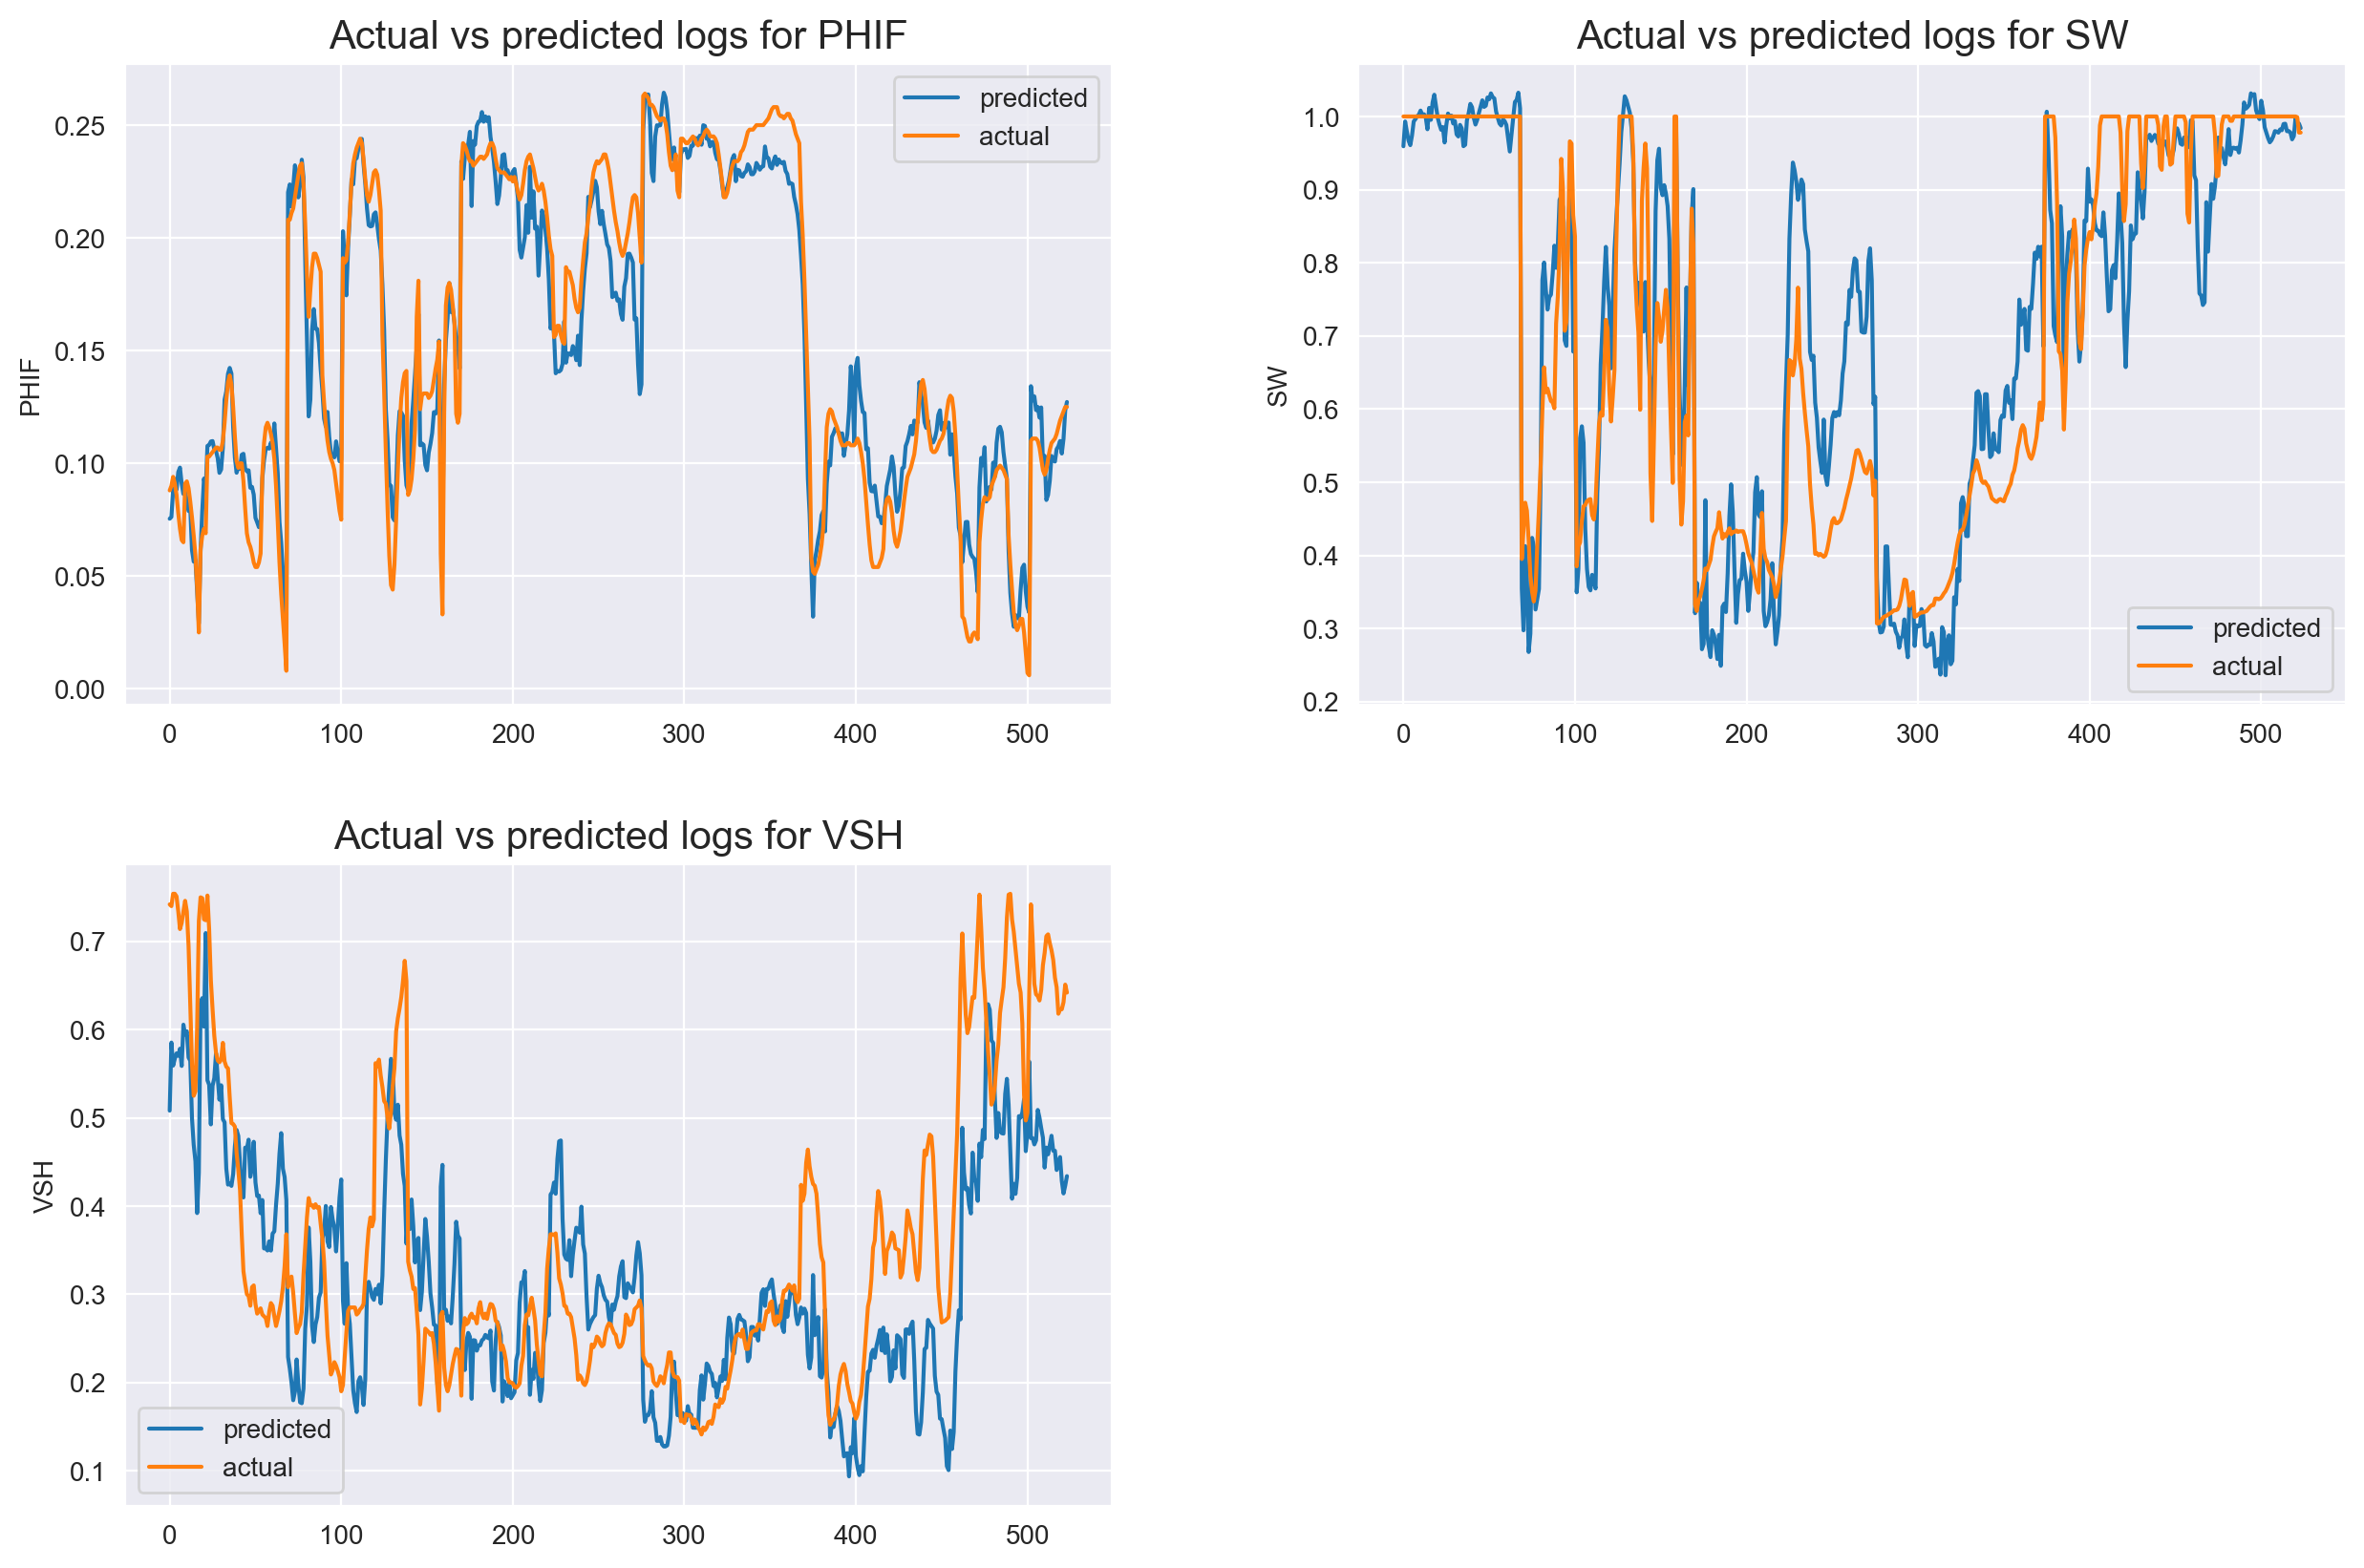

In [85]:
plot_predic_vs_actual(Pred_pca, TESTY)

###### The best model to be saved and carried forward to prediction is the model with only the important feature used

### save trained model to be used for prediction 

In [86]:
import pickle

In [87]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(catboot_imp, open(filename, 'wb'))

## Final Model TO BE USED FOR TESTING 

**This section is a summary of the entire process having gotten the best algorithm**
1. load the test data
2. replace -9999 with NaN
3. Fill missing values using median
5. Selecting features based on the establshied model (feature importance) 
6. Scale features 
7. Build model and fit to training data 
8. Test model 
9. evaluate model 

***The target variables PHIF, SW and VSH should be supplied together (e.g Pandas data frame with PHIF, SW and VSH as columns)

In [88]:
data_test = pd.read_csv('./data/test.csv')

In [89]:
def replace_9999 (df):                                
    '''function to replace -9999.0 with NaN
    Args: df is the data frame for the test data
    '''
    data = df.replace(-9999.0, np.nan)
    return data

In [90]:
data_removed_9999 = replace_9999(data_test)
data_removed_9999

WELLNUM    DEPTH       DTC  DTS   BS      CALI       DEN      DENC  \
0          100  15912.5  65.46309  NaN  8.5  8.275658  2.545791  0.051429   
1          100  15913.0  64.56976  NaN  8.5  8.275658  2.524871  0.043547   
2          100  15913.5  64.43656  NaN  8.5  8.275658  2.507431  0.037683   
3          100  15914.0  65.03485  NaN  8.5  8.275658  2.575224  0.064832   
4          100  15914.5  65.13235  NaN  8.5  8.286819  2.550074  0.017329   
...        ...      ...       ...  ...  ...       ...       ...       ...   
11270      104  12393.5       NaN  NaN  8.5  8.506509  2.420993  0.042955   
11271      104  12394.0       NaN  NaN  8.5  8.486116  2.418174  0.040389   
11272      104  12394.5       NaN  NaN  8.5  8.499702  2.414918  0.044340   
11273      104  12395.0       NaN  NaN  8.5  8.511973  2.403496  0.041928   
11274      104  12395.5       NaN  NaN  8.5  8.511447  2.387621  0.038925   

              GR       NEU       PEF      RDEP      RMED        ROP  
0       9.791040  0.134139  5.858729  2.881351  2.645010  262.28170  
1      11.278870  0.111488  6.021325  2.881351  2.645010  262.03700  
2       9.954506  0.112143  6.060280  3.027379  2.928987  261.98810  
3       8.630137  0.114846  6.202412  3.054653  2.974949  261.71960  
4       7.305769  0.116967  5.179704  3.054653  2.974949  261.52470  
...          ...       ...       ...       ...       ...        ...  
11270  35.404900  0.140171  3.147515  0.823107  0.851536   22.95434  
11271  35.706500  0.138998  3.198371  0.749731  0.792532   22.78389  
11272  33.683400  0.144701  3.269237  0.706435  0.704768   22.67181  
11273  32.255100  0.150501  3.206371  0.715481  0.678997   22.41259  
11274  32.789000  0.156138  3.261575  0.760388  0.768605   23.23316  

[11275 rows x 14 columns]

In [91]:
# The median value shall be used to avoid the impact of skewness 

filled_data = data_removed_9999.fillna(data_removed_9999.median()) ## fill missing values with median
filled_data

WELLNUM    DEPTH       DTC      DTS   BS      CALI       DEN      DENC  \
0          100  15912.5  65.46309  145.531  8.5  8.275658  2.545791  0.051429   
1          100  15913.0  64.56976  145.531  8.5  8.275658  2.524871  0.043547   
2          100  15913.5  64.43656  145.531  8.5  8.275658  2.507431  0.037683   
3          100  15914.0  65.03485  145.531  8.5  8.275658  2.575224  0.064832   
4          100  15914.5  65.13235  145.531  8.5  8.286819  2.550074  0.017329   
...        ...      ...       ...      ...  ...       ...       ...       ...   
11270      104  12393.5  82.69315  145.531  8.5  8.506509  2.420993  0.042955   
11271      104  12394.0  82.69315  145.531  8.5  8.486116  2.418174  0.040389   
11272      104  12394.5  82.69315  145.531  8.5  8.499702  2.414918  0.044340   
11273      104  12395.0  82.69315  145.531  8.5  8.511973  2.403496  0.041928   
11274      104  12395.5  82.69315  145.531  8.5  8.511447  2.387621  0.038925   

              GR       NEU       PEF      RDEP      RMED        ROP  
0       9.791040  0.134139  5.858729  2.881351  2.645010  262.28170  
1      11.278870  0.111488  6.021325  2.881351  2.645010  262.03700  
2       9.954506  0.112143  6.060280  3.027379  2.928987  261.98810  
3       8.630137  0.114846  6.202412  3.054653  2.974949  261.71960  
4       7.305769  0.116967  5.179704  3.054653  2.974949  261.52470  
...          ...       ...       ...       ...       ...        ...  
11270  35.404900  0.140171  3.147515  0.823107  0.851536   22.95434  
11271  35.706500  0.138998  3.198371  0.749731  0.792532   22.78389  
11272  33.683400  0.144701  3.269237  0.706435  0.704768   22.67181  
11273  32.255100  0.150501  3.206371  0.715481  0.678997   22.41259  
11274  32.789000  0.156138  3.261575  0.760388  0.768605   23.23316  

[11275 rows x 14 columns]

In [92]:
def select_features(df):
    '''Select the relevant features based on the established feature importance'''
    important_features_table = df[['DEN','DTC','RDEP','GR','RMED']]
    return important_features_table

In [93]:
important_features = select_features(filled_data)
important_features.head(3)

DEN       DTC      RDEP         GR      RMED
0  2.545791  65.46309  2.881351   9.791040  2.645010
1  2.524871  64.56976  2.881351  11.278870  2.645010
2  2.507431  64.43656  3.027379   9.954506  2.928987

In [94]:
scaled_imp_features = scaler1.transform (important_features) # Scale feature using already fitted scaler 

#### Load saved trained model for use

In [95]:
# load the model from disk
trained_model = pickle.load(open('final_model.sav', 'rb'))
predict_y = trained_model.predict(scaled_imp_features)

In [96]:
## put ptrediction in data frame
Prediction = pd.DataFrame(predict_y,columns=['PHIF','SW','VSH'])
Prediction.head()

PHIF        SW       VSH
0  0.052630  0.958494  0.018365
1  0.067394  0.952698  0.042904
2  0.075686  0.875422  0.018202
3  0.035400  0.967941  0.050627
4  0.049673  0.956608  0.023330

In [97]:
Prediction.shape

(11275, 3)

### Export predicted file and save as submission.csv

In [98]:
Prediction.to_csv('submission.csv')

#### RMSE score 

In [99]:
# from sklearn.metrics import mean_squared_error
# score_ = np.sqrt(mean_squared_error(Y, Prediction)) ## provide Y (ytest should be a data frame with the three targets)
# score_

In [100]:
# def plot_predic_vs_actual(Prediction, yactual): #supply Y to score 
    
#     fig = plt.figure(figsize=[15,10], dpi=200)
#     fig.subplots_adjust(hspace=0.25, wspace=0.25)

#     label = ['PHIF','SW','VSH']
#     j = 1
#     for i in label:
#         ax = fig.add_subplot(2,2,j)
#         sns.lineplot(x=range(ypred.shape[0]), y=ypred[i], ax=ax, legend='auto')
#         sns.lineplot(x=range(yactual.shape[0]), y=yactual[i], ax=ax,legend='auto')
#         plt.title('Actual vs predicted logs for '+str(i), fontsize=15)
#         plt.legend(labels=["predicted","actual"])
#         j = j+1
#         if j>len(label):
#             break
#     plt.show()